# <font color='Green'>**Исследовательский Pet-проект: большой упор на предобработку данных, анализ EDA продаж автомобилей в Казахстане, анализ автоцентра Меркур Авто и рекомендации развития**<br><b>

**Материалы:**
* [Дашборд DataLens]: статус - в разработке.

## **0. Описание**

**Контекст проекта**

Данные о продажах автомобилей всеми компаниями-дилерами в Казахстане за январь-сентябрь 2019 года (данные реальные) собраны статистической компанией-агрегатором VAG путем сбора данных;

Данные из Excel-файлов собраны в один CSV файл; Данные - рекордсмен по ошибкам и не пригодны для анализа, надо будет сделать большой упор на предобработку данных.

**Цели исследования**

1. Очистка и пребобработка данных;
2. Исследовательный анализ данных и анализ рынка автомобилей Казахстана;
3. Отдельно проанализировать позиции диллера "Mercur Auto" и дать им рекомендации для развития.

**Ход исследования**

Моё исследование пройдет в несколько этапов:
1. Загрузить данные
2. Очистить данные
    - привести данные в столбцах к единообразию;
    - избавиться или исправить некорректные значения данных;
    - закодировать данные, где это целесообразно
3. EDA Исследовательский анализ данных рынка авто Казахстана (коммерческий и некоммерческий транспорт):
    - Емкость рынка автомобилей: в денежном и количественном выражении;
    - Марки лидеры на рынке автомобилей;
    - Динамика рынка: общая, по сегментам;
    - RFM-анализ моделей авто (показатели Frequency и Monetary);
    - Продажи автомобилей в разрезе бренд / сегмент;
    - Продажи по маркам;
    - Продажи по регионам;
    - Продажи автоцентров;
    - Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);
4. Анализ положения автоцентра "Меркур Авто" и рекомендации для развития:
    - Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
    - Продажи по регионам: общие, по маркам;
    - Конкурентный анализ;
    - BCG анализ (анализ продаж по моделям);
    - Выводы и рекомендации для развития "Mercur Auto";
5. Общие выводы

### **Описание данных**

**Описание данных**
Датасет auto_kz_2019.csv

- Год – год продажи (2019) - 'year'
- Месяц – месяц продажи (январь - сентябрь) - 'month'
- Компания – название автоцентра  - 'company'
- Бренд – название продаваемой марки автомобиля - 'brand'
- Модель – название модели автомобиля - 'model'
- Модификация – модификация модели автомобиля (удалим) - 'modification'
- Год выпуска – год производства автомобиля - 'release_year'
- Страна-производитель – страна, где произведен автомобиль - 'manufacturing_country'
- Вид топлива  - 'fuel_type'
    - бензин,
    - дизель,
    - электричество,
    - гибрид
- Объём двиг л – объем двигателя автомобиля в литрах - 'engine_volume'
- Коробка передач – тип коробки переключения передач - 'transmission_type'
    - автоматическая
    - механическая
- Тип привода  - 'drive_type'
    - RWD – задний привод,
    - FWD – передний привод,
    - 4WD – полный привод,
    - 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)
- Сегмент – сегмент, к которому относится авто (удалим) - 'segment'
- Регион – регион продажи - 'region'
- Наименование дилерского центра – совпадает с компанией – можно удалить - 'dealer'
- Тип клиента (в рамках анализа не критично – удалим) - 'client_type'
    - юридическое лицо
    - физическое лицо
- Форма расчета  - 'payment_type'
    - наличный
    - безналичный расчет (много пропусков – можно удалять)
- Количество – количество автомобилей в заказе - 'quantity'
- Цена USD – цена автомобиля - 'price_usd'
- Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть) - 'sell_price_usd'
- Область – область продажи - 'state'
- Сегментация 2013 – сегмент автомобиля актуальный - segment_2013'
- Класс 2013 – класс автомобиля актуальный - 'class_2013'
- Сегментация Eng – английская сегментация (удалим) - 'segment_eng'
- Локализация производства – удаляем (совпадает со страной производителем) - 'product_localization'

## **1. Загрузка данных**

### 1.1 Импортируем библиотеки, откроем файл *.csv

In [1]:
# библиотеки для работы с табличными данными
import numpy as np

import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina'

import seaborn as sns
# применяем стиль whitegrid
sns.set_style('whitegrid')

import plotly.express as px
from plotly import graph_objects as go
# (!) для отображения интерактивных графиков plotly как картинок на github:
# для интерактивности лучше смотреть локально без этих параметров
!pip install -U kaleido==0.2.1 #post1
import kaleido
import plotly.io as pio
pio.renderers.default = "png"

import re

# Тепловая карта корреляций PHIK
!pip install phik
import phik

# уберем предупреждения
import warnings
warnings.filterwarnings("ignore")

# настройка опций
# чтобы выводил все столбцы
pd.set_option('display.max_columns', None)
# максимальная ширина колонки
pd.set_option('display.max_colwidth', None)
# количество знаков десятичных разрядов
pd.set_option('display.float_format', '{:.2f}'.format)
# все элементы в списке
#pd.set_option('display.max_seq_items', None)

ERROR: Invalid requirement: '#post1'

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# откроем файл *.csv
try:
    df = pd.read_csv('auto_kz_2019.csv', sep=';', decimal=',')
    print('Загрузили данные с локального хранилища')
except:
    df = pd.read_csv('https://github.com/kolmakovwork/auto_kz/blob/main/auto_kz_2019.csv?raw=true', sep=';', decimal=',')
    print('Загрузили данные с github')

Загрузили данные с локального хранилища


### 1.2 Исследуем дф

In [3]:
# распечатаем рандомные строки, размер дф и посмотрим его инфо
display(df.sample(3))
print('Размер датасета (строк, столбцов):', df.shape)
df.info()

Год   Месяц                 Компания    Бренд   Модель  Модификация  \
16035  2019    Июнь               БИПЭК АВТО      Kia   Cerato          NaN   
35572  2019  Август  Toyota Motor Kazakhstan   Toyota    LC200           ML   
25101  2019    Март           Renault Россия  Renault  Sandero  CXPA16MV5RB   

      Год выпуска  Страна-производитель Вид топлива Объём двиг, л,  \
16035        2019  Республика Казахстан      Бензин          1,598   
35572        2019                Япония      Бензин            4,6   
25101        2019  Российская Федерация         NaN            NaN   

      Коробка передач Тип привода              Сегмент    Регион  \
16035             6АТ    Передний             C класс     Алматы   
35572              AT         4WD  Полноразмерные SUV   Костанай   
25101             NaN         NaN                  NaN   Уральск   

      Наименование дилерского центра Тип клиента Форма расчета  Количество  \
16035              БИПЭК АВТО Алматы         NaN           NaN        7.00   
35572          Тойота Центр Костанай   Физ. Лицо           NaN        1.00   
25101                 Урал-Кров Авто   Физ. Лицо           NaN        1.00   

       Цена, USD  Продажа, USD                        Область  \
16035   17500.00     122500.00                       г.Алматы   
35572   70286.69      70286.69           Костанайская область   
25101   12836.38      12836.38  Западно-Казахстанская область   

          Сегментация 2013          Класс 2013 Сегментация Eng  \
16035  Легковые автомобили             C класс               C   
35572         Внедорожники  Полноразмерные SUV              K3   
25101  Легковые автомобили             B класс               B   

      Локализация производства  
16035   Локальное производство  
35572                   Импорт  
25101                   Импорт

Размер датасета (строк, столбцов): (39966, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null

**Краткий план:**
* Переименовать столбцы по snake case
* Изучить пропуски и постараться их заполнить
* Числовые типы перевести в int/float
* Удалить неиспользуемые столбцы
* Добавить новые столцы, например дата продажи (год, месяц)

## **2. Очистка и подготовка данных**

### 2.1 Меняем названия столбцов, удаляем неиспользуемые, добавляем новые

In [4]:
# создадим копию исходного дф и поработаем с ним
df2 = df.copy()

In [5]:
# создаем текущий список столбцов
columns_start = df2.columns.tolist()

# создаем конечный нужный списко столбцов по латински
columns_end = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year',
               'manufacturing_country', 'fuel_type', 'engine_volume', 'transmission_type',
               'drive_type', 'segment', 'region', 'dealer', 'client_type', 'payment_type',
               'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013',
               'segment_eng', 'product_localization']

# сохраним в словарь новые и старые значения, проверим соответствие ключ:значение
change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}
print(change_col_dict)

{'Год': 'year', 'Месяц': 'month', 'Компания': 'company', 'Бренд': 'brand', 'Модель': 'model', 'Модификация': 'modification', 'Год выпуска': 'release_year', 'Страна-производитель': 'manufacturing_country', 'Вид топлива': 'fuel_type', 'Объём двиг, л,': 'engine_volume', 'Коробка передач': 'transmission_type', 'Тип привода': 'drive_type', 'Сегмент': 'segment', 'Регион': 'region', 'Наименование дилерского центра': 'dealer', 'Тип клиента': 'client_type', 'Форма расчета': 'payment_type', 'Количество': 'quantity', 'Цена, USD': 'price_usd', 'Продажа, USD': 'sell_price_usd', 'Область': 'state', 'Сегментация 2013': 'segment_2013', 'Класс 2013': 'class_2013', 'Сегментация Eng': 'segment_eng', 'Локализация производства': 'product_localization'}


In [6]:
# Переименовываем столбцы по словарю
df2 = df2.rename(columns=change_col_dict)

In [7]:
# удаляем неиспользуемые столбцы
df2 = df2.drop(columns=['dealer', 'payment_type', 'segment', 'segment_eng',
                      'product_localization', 'client_type', 'modification'])

In [8]:
# посмотрим уникальные значения
df2['year'].unique()

array([2019], dtype=int64)

In [9]:
# создадим столбец с датой продажи
# словарь соответствия месяца
month = {'январь': '01',
         'февраль': '02',
         'март': '03',
         'апрель': '04',
         'май': '05',
         'июнь': '06',
         'июль': '07',
         'август': '08',
         'сентябрь': '09',
         'октябрь': '10',
         'ноябрь': '11',
         'декабрь': '12'}

# уменьшим регистр
df2['month'] = df2['month'].str.lower()
# заменим названия на цифры
df2['month'] = df2['month'].map(month)
# создадим столбец с датой продажи
df2['sale_date'] = df2['year'].astype(str) + '-' + df2['month']
df2['sale_date'] = pd.to_datetime(df2['sale_date'], format='%Y-%m').dt.date
df2['sale_date'].value_counts(dropna=False)

2019-07-01    5930
2019-09-01    5312
2019-08-01    4812
2019-05-01    4798
2019-06-01    4754
2019-04-01    4177
2019-03-01    3662
2019-01-01    3384
2019-02-01    3137
Name: sale_date, dtype: int64

In [10]:
# можно удалить месяц и год
df2 = df2.drop(columns=['year', 'month'])

### 2.2 Оценка столбцов с пропусками: заполнение, обработка категориальных и кол-ых значений

In [11]:
# проверим кол-во пропусков по столбцам
df2_nans = ((pd.concat([df2.isna().sum(),
                        df2.isna().mean()],
                        axis=1,
                        keys=['nan_before_cnt', 'nan_before_%']))
            .sort_values(by='nan_before_cnt', ascending=False)
           )
df2_nans.style.background_gradient('Oranges').format({'nan_before_%':'{:.2%}'})

**Обработаем столбцы с пропусками:**

**Количество:**

In [12]:
# количество автомобилей в заказе
df2.quantity.unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

In [13]:
# количество не может быть -1, либо это ошибка, либо возврат авто, лучше удалим
df2 = df2.query('quantity != -1')

# посмотрим кол-во пропусков
df2.quantity.isna().sum()

6

In [14]:
# пропусков очень мало, удалим их
df2 = df2.dropna(subset=['quantity']).reset_index(drop=True)
# поменяем тип столбца
df2['quantity'] = df2['quantity'].astype('int')

**Год производства автомобиля:**

In [15]:
# год производства автомобиля
df2['release_year'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

In [16]:
# заменим 2\xa0018 > 2018, 2\xa0019>2019
df2.loc[df2['release_year'] == '2\xa0018', 'release_year'] = '2018'
df2.loc[df2['release_year'] == '2\xa0019', 'release_year'] = '2019'

print(df2['release_year'].value_counts(dropna=False))

# пропуски оставим, чтобы можно было наиболее полно оценить рынок
# поменяем тип столбца
df2['release_year'] = df2['release_year'].astype('float')
# 'Int64' позволяет использовать значения None (NaN) в данных
df2['release_year'] = df2['release_year'].astype('Int64')

2019    30022
2018     9078
NaN       501
2017      324
2016       30
2014        2
2011        1
2013        1
Name: release_year, dtype: int64


**Вид топлива:**

In [17]:
# Вид топлива – бензин, дизель, электричество, гибрид
df2['fuel_type'].value_counts(dropna=False)

Бензин           34794
NaN               3140
Дизель            1762
бензин             159
дизель              41
2                   23
1,6                 14
гибрид              10
Электричество       10
0                    3
Электро              3
Name: fuel_type, dtype: int64

In [18]:
# Поднимем геристр первых букв
df2['fuel_type'] = df2['fuel_type'].str.title()
# явная замена
df2['fuel_type'] = df2['fuel_type'].replace({'Бензин ': 'Бензин',
                                             'Дизель ': 'Дизель',
                                            'Электро': 'Электричество'
                                            })

In [19]:
# тут нам встретились значения 0, 1,6, 2, скорее всего это объем двигателя, может смещены строки
# посмотрим на эти строки
df2[df2['fuel_type'].isin(['2', '1,6', '0'])].sample(3) # вывел часть для экономии

company    brand    model  release_year manufacturing_country  \
23720  Renault Россия  Renault   Duster          2019  Российская Федерация   
25020  Renault Россия  Renault  Sandero          2018  Российская Федерация   
23748  Renault Россия  Renault   Duster          2018  Российская Федерация   

      fuel_type engine_volume transmission_type drive_type            region  \
23720         2            MT               4WD        4WD           Уральск   
25020       1,6             0                 0          0        Нур-Султан   
23748       1,6            AT          Передний   Передний  Усть-Каменогорск   

       quantity  price_usd  sell_price_usd                           state  \
23720         1   12249.61        12249.61   Западно-Казахстанская область   
25020         1   12476.90        12476.90                    г.Нур-Султан   
23748         1   12249.61        12249.61  Восточно-Казахстанская область   

              segment_2013         class_2013   sale_date  
23720         Внедорожники  Субкомпактные SUV  2019-01-01  
25020  Легковые автомобили            B класс  2019-01-01  
23748         Внедорожники  Субкомпактные SUV  2019-01-01

In [20]:
df2.sample(1)

company    brand  model  release_year manufacturing_country  \
4908  Astana Motors  Hyundai  Creta          2018  Республика Казахстан   

     fuel_type engine_volume transmission_type drive_type       region  \
4908    Бензин           1,6              6 AT       2 WD  Талдыкорган   

      quantity  price_usd  sell_price_usd                state  segment_2013  \
4908         1   19530.66        19530.66  Алматинская область  Внедорожники   

             class_2013   sale_date  
4908  Субкомпактные SUV  2019-01-01

In [21]:
# выявлено смещение в этих строках, кроме '0' где UAZ,
# нужно сместить fuel_type -> engine_volume, engine_volume -> transmission_type
# заменим 0 на пропуски
df2['fuel_type'] = df2['fuel_type'].replace({'0': np.nan})

# отберем индексы
index_sh = df2[df2['fuel_type'].isin(['2', '1,6'])].index

# сдвиг по индексам, хотим сместить 2 столбца и указываем диапазон в 3 столбца (до куда).
df2.loc[index_sh, ['fuel_type', 'engine_volume', 'transmission_type']] = df2.loc[index_sh, ['fuel_type', 'engine_volume', 'transmission_type']].shift(1, axis=1)
# проверяем
df2.loc[index_sh].sample(1)

company    brand   model  release_year manufacturing_country  \
23745  Renault Россия  Renault  Duster          2018  Российская Федерация   

      fuel_type engine_volume transmission_type drive_type   region  quantity  \
23745       NaN             2                AT        4WD  Шымкент         1   

       price_usd  sell_price_usd                       state  segment_2013  \
23745   12249.61        12249.61  Южно-Казахстанская область  Внедорожники   

              class_2013   sale_date  
23745  Субкомпактные SUV  2019-01-01

все получилось, отлично

In [22]:
# посмотрим на модели где больше всего пропусков
top_nan_model = df2[df2['fuel_type'].isna()]['model'].value_counts().head(10)
print(top_nan_model)

Duster      682
Sandero     440
S3          379
Logan       320
Kaptur      230
S5          158
3302        127
HFF6850G     73
Next         71
Arkana       55
Name: model, dtype: int64


In [23]:
# посмотрим виды топлива у моделей где есть пропуски
df2.query('model in @top_nan_model.index').groupby('model')['fuel_type'].value_counts()

model     fuel_type
3302      Бензин       870
          Дизель         1
Duster    Бензин        25
HFF6850G  Дизель       167
Next      Бензин       303
          Дизель        43
S3        Бензин       907
S5        Бензин       285
          Дизель         4
Sandero   Бензин         1
Name: fuel_type, dtype: int64

In [24]:
# заполним модой все модели, берем первую моду из списка мод, если не пусто
df2['fuel_type'] = df2.groupby('model')['fuel_type'].transform(lambda x: x.mode().iloc[0]\
                                                               if not x.mode().empty\
                                                               else np.nan)
# проверка
df2['fuel_type'].value_counts(dropna=False)

Бензин           37019
Дизель            2024
NaN                899
Электричество       14
Гибрид               3
Name: fuel_type, dtype: int64

Заполнили 2/3 пропусков, остальные пропуски оставляем как есть, чтобы можно было наиболее полно оценить рынок

**Коробка передач:**

In [25]:
# Коробка передач
df2.transmission_type.unique()
print(df2.transmission_type.isna().sum())
print(len(df2.query('transmission_type == "0" | transmission_type == "#Н/Д"')))

3255
7


In [26]:
# посмотрим пропуски
# Фильтрация строк, где значение столбца 'transmission_type' является NaN
(df2[df2['transmission_type'].isna()]
 .groupby('model').size().reset_index(name='missing_transmission_count')
).sort_values(by='missing_transmission_count', ascending=False).head(4)

model  missing_transmission_count
23    Duster                         650
62   Sandero                         435
48  Nexia R3                         361
38     Logan                         320

In [27]:
# роботизированные коробки передач, редукторы, DSG и различные вариации tronic
# -будем считать для удобства автоматической коробкой передач. АТ / АККП – это автоматы,
# МТ / МККП – механика
АТ = ['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '6АТ', '8AT', 'Powershift S6',
       '6AT', '6 AT', '5 AT', '5AT',
       '7 DCT', '7DCT', '8 AT', 'CVT', 'DCT', '4 АТ',
       '4АТ', '4AT', '8АТ', '8 АТ', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', '4WD', 'Передний', '7 DSG',
       '7DSG', '6 DSG', '6DSG', 'DSG', '6A', '6А', 'A/T',
       ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI',
       '9AT', 'РЕДУКТОР']

МТ = ['5 МТ', 'MT', '6 MT', '6MT', 'Мех.', 'МТ', 'МT', '6 МТ', '6МТ',
      '6M/T',  '5МТ', '5MT', '5M','5М','МКПП', 'M/T', 'М/T', 'МКП']


# функция замены коробки передач
def transmission_type_f(row):
    if row in АТ:
        return 'АТ'
    elif row in МТ:
        return 'МТ'
    else:
        return np.nan

# изменим столбец функцией
df2['transmission_type'] = df2['transmission_type'].apply(transmission_type_f)
# проверка
print(df2['transmission_type'].value_counts(dropna=False))
# проверим заполнение модели с самым большим кол-вом пропусков
print(df2.query('model == "Nexia R3"')['transmission_type'].value_counts(dropna=False))

АТ     28277
МТ      8420
NaN     3262
Name: transmission_type, dtype: int64
АТ     925
МТ     413
NaN    361
Name: transmission_type, dtype: int64


Тут модой не заполнить, потому что на ту же нексию что и автомата и механики нормально по количеству. Остальные пропуски оставляем как есть, чтобы можно было наиболее полно оценить рынок

**Объем двигателя, л.:**

In [28]:
# Объем двигателя, л.
#display(df2.query('engine_volume == "88 KWH"'))
df2.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

In [29]:
# сделаем явную замену на пропуск
df2['engine_volume'] = df2['engine_volume'].replace({'88 KWH': np.nan,
                                            '400 Л.С.': np.nan,
                                            'MT': np.nan,
                                            'AT': np.nan,
                                            '0':np.nan
                                            })

In [30]:
# очистка от букв и специальных символов
# Заменяю '#Н/Д' на NaN чтобы можно было преобразовать в типа float и проанализировать
def clean_engine_volume(value):
    # проверка на nan и буквы/символы
    if pd.isna(value) or not re.search(r'\d', str(value)):
        return np.nan  # Заменяем '#Н/Д' на NaN
    # удаляем все символы, кроме цифр, точек и запятых
    value = re.sub(r'[^0-9,.]', '', str(value))
    # заменяем запятые на точки
    value = value.replace(',', '.')
    # удаляем повторяющиеся точки
    value = re.sub(r'\.{2,}', '.', value)
    # удаляем точки в конце строки
    value = re.sub(r'\.$', '', value)
    return value
# применяем
df2['engine_volume'] = df2['engine_volume'].apply(clean_engine_volume)
# в тип float
df2['engine_volume'] = df2['engine_volume'].astype(float)

print(df2['engine_volume'].unique())

[ 1.4    2.     3.     4.4    6.6    1.5    1.596  2.4    1.7   26.7
 25.7   24.7   23.7   22.7   21.7   20.7   19.7   18.7   17.7   16.7
 15.7   14.7   13.7   12.7   11.7   10.7    9.7    8.7    7.7    6.7
  5.7    4.7    3.7    2.7    6.2    2.5    1.6      nan  2.8    4.3
  3.9    7.5   12.3    3.5    5.6    5.2    5.     1.598  1.248  1.998
  2.359  1.999  3.342  1.591  3.47   1.69   1.774  4.6    1.8   10.5
  4.     5.5   12.    12.8   11.     2.2    1.2    1.485 13.     1.33
  2.693  3.8    3.6    7.6    4.9    2.9    4.98   8.4    6.5  ]


In [31]:
# добавим столбец Категория Объема двигателя
# мне кажется когда больше Категорий, то можно более точно анализировать
# 1_(<=1.5)
# 2_(>1.5:<=2.0)
# 3_(>2.0:<=2.5)
# 4_(>2.5:<=3.0)
# 5_(>3:<=4)
# 6_(>4:<=10)
# 7_(>10)

def engine_volume_c(row):
    if row['engine_volume'] <= 1.5:
        return '1_(<=1.5)'
    elif (row['engine_volume'] > 1.5) & (row['engine_volume'] <=2.0):
        return '2_(>1.5:<=2.0)'
    elif (row['engine_volume'] > 2.0) & (row['engine_volume'] <=2.5):
        return '3_(>2.0:<=2.5)'
    elif (row['engine_volume'] > 2.5) & (row['engine_volume'] <=3.0):
        return '4_(>2.5:<=3.0)'
    elif (row['engine_volume'] > 3) & (row['engine_volume'] <=4):
        return '5_(>3:<=4)'
    elif (row['engine_volume'] > 4) & (row['engine_volume'] <=10):
        return '6_(>4:<=10)'
    elif row['engine_volume'] >10:
        return '7_(>10)'
    else:
        return '#Н/Д'

# изменим столбец функцией
df2['engine_volume_cat'] = df2.apply(engine_volume_c, axis=1)
# проверка
print(df2['engine_volume_cat'].value_counts())

2_(>1.5:<=2.0)    18718
3_(>2.0:<=2.5)     6290
4_(>2.5:<=3.0)     5528
#Н/Д               4275
1_(<=1.5)          1830
6_(>4:<=10)        1681
5_(>3:<=4)         1591
7_(>10)              46
Name: engine_volume_cat, dtype: int64


In [32]:
# посмотрим на значения > 10
# df2[df2['engine_volume'] > 10]
#  - > в основном это большой автобус или грузовик

# поделим на 10 в случае если это не большой автобус и не грузовик
df2.loc[(df2['engine_volume'] > 10) &
        (~df2['class_2013'].isin(['Большие автобусы', 'Крупнотоннажные грузовики'])),
        'engine_volume'] /= 10
# округлим
df2['engine_volume'] = df2['engine_volume'].round(2)
df2['engine_volume'].value_counts(dropna=False)

1.60    9059
2.00    8130
2.50    5034
2.70    4669
NaN     4275
        ... 
1.17       1
2.07       1
1.27       1
2.17       1
3.70       1
Name: engine_volume, Length: 74, dtype: int64

**Тип привода:**

In [33]:
# Тип привода
df2.drive_type.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

In [34]:
# Передний привод (FF или FWD): передний, FF, FWD
# Задний привод (RWD): задний, RWD
# Полный привод (4WD): Quattro, полный, AWD, 4WD, 4X4
# Для остальных 2WD: привод на два колеса, но не известно передний это привод или задний

# nan,  'Астана', '0', , '#Н/Д'

FF_FWD = ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF']
RWD = ['Задний', 'RWD']
dt_4WD = ['quattro', 'Полный', 'AWD', '4WD', '4 WD', '4X4', '4х4', '4x4', 'полный', '4Motion']
dt_2WD = ['2 WD', '2WD', '4х2.2', '4x2', '4х2', '4X2']

# функция замены коробки передач
def drive_type_f(row):
    if row in FF_FWD:
        return 'FF_FWD'
    elif row in RWD:
        return 'RWD'
    elif row in dt_4WD:
        return '4WD'
    elif row in dt_2WD:
        return '2WD'
    else:
        return np.nan

# изменим столбец функцией
df2['drive_type'] = df2['drive_type'].apply(drive_type_f)
# проверка
print(df2['drive_type'].value_counts(dropna=False))

# проверим заполнение модели с самым большим кол-вом пропусков
# df2[df2['drive_type'].isna()].groupby('brand')['model'].value_counts() #brand	model

# аналог .mode() с фильтрацией по доле в %
# посчитаем долю значений по моделям
drive_type_counts = df2.groupby(['model', 'drive_type']).size().reset_index(name='count')
total_counts = drive_type_counts.groupby('model')['count'].sum().reset_index(name='total_count')
drive_type_mode = pd.merge(drive_type_counts,
                             total_counts,
                             on='model')
drive_type_mode['ratio'] = drive_type_mode['count'] / drive_type_mode['total_count']

# фильтрация значений по условию доли в 70%
drive_type_mode = drive_type_mode[drive_type_mode['ratio'] >= 0.7]
# если Мода занимает определенную долю среди модели
# то заполняем этой модой пропущенные значения

nan_drive_types = df2[df2['drive_type'].isna()]
# проверяем модель из фильтрованных данных
for index, row in nan_drive_types.iterrows():
    # проверяем, существует ли модель в режимах модах
    if row['model'] in drive_type_mode['model'].values:
        # заменяем пропуск на моду
        df2.loc[index, 'drive_type'] = drive_type_mode.loc[drive_type_mode['model'] == row['model'], 'drive_type'].iloc[0]
    else:
        df2.loc[index, 'drive_type'] = '#Н/Д'
# проверка
print(df2['drive_type'].value_counts(dropna=False))

4WD       15017
2WD        9824
FF_FWD     9033
NaN        4411
RWD        1674
Name: drive_type, dtype: int64
4WD       15774
2WD       10497
FF_FWD     9471
#Н/Д       2542
RWD        1675
Name: drive_type, dtype: int64


Примерно 300 значений из 650 заполнили.

### 2.3 Оценка столбцов без пропусков: обработка категориальных и кол-ые значений

In [35]:
# Сегментация 2013 – сегмент автомобиля актуальный
df2.segment_2013.unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [36]:
# посмотрим классы коммерческих автомобилей
df2.query('segment_2013 == "Коммерческие автомобили"')['class_2013'].value_counts()

Малотоннажные грузовики      1940
Крупнотоннажные грузовики    1034
Микроавтобусы                 433
Развозные автомобили          351
Большие автобусы              321
Среднетоннажные грузовики     192
Средние автобусы               57
Name: class_2013, dtype: int64

In [37]:
# Класс 2013 – класс автомобиля актуальный
df2.class_2013.unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

In [38]:
# Компания – название автоцентра
sorted(df2.company.unique())

['Allur Auto',
 'Almaty Motors Premium',
 'Astana Motors',
 'Astana Motors ',
 'Autokapital',
 'Caspian Motors',
 'Daewoo Bus Kazakhstan',
 'Eurasia Motor Premium',
 'Hino Motors ',
 'Hyundai Com Trans Kazakhstan ',
 'MAN Truck & Bus Kazakhstan',
 'MMC RUS',
 'Mercur Auto',
 'Mercur Autos',
 'Nissan Manufacturing RUS',
 'Ravon Motors Kazakstan',
 'Renault Россия',
 'Scandinavian Motors',
 'Scania Central Asia',
 'Subaru Kazakhstan',
 'TERRA MOTORS',
 'Toyota Motor Kazakhstan',
 'Volkswagen Group Rus',
 'Автодом Motors KST',
 'Автокапитал',
 'Автомир ГК',
 'Автомир-Центр',
 'Автоцентр-Бавария',
 'БИПЭК АВТО',
 'Вираж',
 'Каспиан Моторс',
 'Лифан Моторс Рус',
 'ММС Рус',
 'Равон Моторс Казахстан',
 'СВС-ТРАНС',
 'СемАЗ',
 'ТК КАМАЗ',
 'ТОО "Eurasia Motor Zhaik"',
 'УзАвто-Казахстан',
 'Хино Моторс Казахстан']

In [39]:
# тут поработаем с заменой
df2['company'] = df2['company'].replace({'Astana Motors ': 'Astana Motors',
                                             'Autokapital': 'Автокапитал',
                                             'Каспиан Моторс': 'Caspian Motors',
                                             'Хино Моторс Казахстан': 'Hino Motors',
                                             'Hino Motors ': 'Hino Motors',
                                             'Mercur Autos': 'Mercur Auto',
                                             'Ravon Motors Kazakstan': 'Равон Моторс Казахстан',
                                             'MMC RUS':'ММС Рус',
                                             'Hyundai Com Trans Kazakhstan ': 'Hyundai Com Trans Kazakhstan'
                                             })
# не гуглиться 'ТОО "Eurasia Motor Zhaik"': Eurasia Motor Premium'.

In [40]:
# Страна-производитель – страна, где произведен автомобиль
df2.manufacturing_country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [41]:
# 1 название записано на англ, поменяем на русский
df2['manufacturing_country'] = df2['manufacturing_country'].replace({'UK': 'Великобритания'})
# проверка
df2.manufacturing_country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'Великобритания', 'Узбекистан', 'Венгрия', 'Турция', 'Испания',
       'Нидерланды', 'Польша', 'Швеция', 'Белоруссия', 'Бельгия'],
      dtype=object)

In [42]:
# Область
sorted(df2.state.unique())
# 'Экспорт область' - то что куплено в казахстане и уехало за его пределы

['Акмолинская область',
 'Актюбинская область',
 'Алматинская область',
 'Атырауская область',
 'Восточно-Казахстанская область',
 'Жамбылская область',
 'Западно-Казахстанская область',
 'Карагандинская область',
 'Костанайская область',
 'Кызылординская область',
 'Мангистауская область',
 'Павлодарская область',
 'Северо-Казахстанская область',
 'Туркестанская область',
 'Экспорт область',
 'Южно-Казахстанская область',
 'г.Алматы',
 'г.Нур-Султан']

In [43]:
# можно добавить доп столбец
# среднемесячная ЗП в тыс.тенге за III квартал 2019 года
# https://www.zakon.kz/finansy/4993404-srednemesyachnaya-zarabotnaya-plata-za.html
salary_dict = {
    'г.Алматы': 224158,
    'г.Нур-Султан': 226796,
    'Восточно-Казахстанская область': 162182,
    'Западно-Казахстанская область': 183914,
    'Костанайская область': 145890,
    'Павлодарская область': 160670,
    'Южно-Казахстанская область': 110254,
    'Мангистауская область': 294099,
    'Атырауская область': 351103,
    'Актюбинская область': 156595,
    'Карагандинская область': 172239,
    'Северо-Казахстанская область': 130233,
    'Акмолинская область': 140272,
    'Кызылординская область': 152085,
    'Жамбылская область': 127043,
    'Туркестанская область': 123853,
    'Алматинская область': 136212,
    'Экспорт область': 0 ### 'Экспорт область'
}

# давайте добавим новый столбец pg
df2['avg_month_salary_kzt'] = df2['state'].map(salary_dict)

In [44]:
# Регион – регион продажи
sorted(df2.region.unique())
# 'ЭКСПОРТ' - то что куплено в казахстане и уехало за его пределы

['Актау',
 'Актобе',
 'Алматы',
 'Атырау',
 'Зыряновск',
 'Караганда',
 'Каскелен',
 'Кокшетау',
 'Костанай',
 'Кульсары',
 'Кызылорда',
 'Нур-Султан',
 'Павлодар',
 'Петропавловск',
 'Риддер',
 'Рудный',
 'Сарыагаш',
 'Семей',
 'Талдыкорган',
 'Тараз',
 'Туркестан',
 'Уральск',
 'Усть-Каменогорск',
 'Шымкент',
 'ЭКСПОРТ',
 'Экибастуз']

In [45]:
# Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)
# напечатаем первые и последние строки
print(sorted(df2.sell_price_usd.unique())[:5])
print(sorted(df2.sell_price_usd.unique())[-5:])
print(df2.sell_price_usd.describe())

# посмотрим на дорогие заказы
display(df2.query('sell_price_usd > 1200000'))

[7100.0, 7300.0, 7362.995171, 7425.918613, 7460.23875]
[1870000.0, 2004332.626, 2277367.677, 3157811.637, 3778206.264]
count     39959.00
mean      33764.47
std       50704.02
min        7100.00
25%       16623.53
50%       26248.96
75%       35000.00
max     3778206.26
Name: sell_price_usd, dtype: float64


company       brand      model  release_year  \
20211  MAN Truck & Bus Kazakhstan         MAN         TG          2018   
20215                   СВС-ТРАНС         MAN         TG          2019   
20219                   СВС-ТРАНС         MAN         TG          2018   
25552                  БИПЭК АВТО       Skoda    Octavia          2019   
38402        Volkswagen Group Rus  Volkswagen       Polo          <NA>   
39546       Daewoo Bus Kazakhstan      Daewoo  BC 211 MA          2019   
39553       Daewoo Bus Kazakhstan      Daewoo     BC 095          2019   
39554       Daewoo Bus Kazakhstan      Daewoo     BC 095          2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
20211              Германия    Дизель          10.50               NaN   
20215              Германия    Дизель            NaN               NaN   
20219            Узбекистан    Дизель          10.50               NaN   
25552  Республика Казахстан    Бензин           1.40                МТ   
38402  Российская Федерация    Бензин            NaN               NaN   
39546  Республика Казахстан    Дизель           2.50                МТ   
39553  Республика Казахстан    Дизель           2.50                МТ   
39554  Республика Казахстан    Дизель           2.50                МТ   

      drive_type  region  quantity  price_usd  sell_price_usd  \
20211       #Н/Д  Алматы        10  147701.64      1477016.35   
20215       #Н/Д  Алматы        20  100216.63      2004332.63   
20219       #Н/Д  Алматы        14  100056.48      1400790.77   
25552     FF_FWD   Тараз       100   18700.00      1870000.00   
38402       #Н/Д  Алматы        79   15967.85      1261459.99   
39546        2WD   Семей        30  105260.39      3157811.64   
39553        2WD   Семей        30   75912.26      2277367.68   
39554        2WD   Семей        50   75564.13      3778206.26   

                                state             segment_2013  \
20211                        г.Алматы  Коммерческие автомобили   
20215                        г.Алматы  Коммерческие автомобили   
20219                        г.Алматы  Коммерческие автомобили   
25552              Жамбылская область      Легковые автомобили   
38402                        г.Алматы      Легковые автомобили   
39546  Восточно-Казахстанская область  Коммерческие автомобили   
39553  Восточно-Казахстанская область  Коммерческие автомобили   
39554  Восточно-Казахстанская область  Коммерческие автомобили   

                      class_2013   sale_date engine_volume_cat  \
20211  Крупнотоннажные грузовики  2019-02-01           7_(>10)   
20215  Крупнотоннажные грузовики  2019-05-01              #Н/Д   
20219  Крупнотоннажные грузовики  2019-07-01           7_(>10)   
25552                    C класс  2019-07-01         1_(<=1.5)   
38402                    B класс  2019-06-01              #Н/Д   
39546           Большие автобусы  2019-05-01    3_(>2.0:<=2.5)   
39553           Большие автобусы  2019-06-01    3_(>2.0:<=2.5)   
39554           Большие автобусы  2019-07-01    3_(>2.0:<=2.5)   

       avg_month_salary_kzt  
20211                224158  
20215                224158  
20219                224158  
25552                127043  
38402                224158  
39546                162182  
39553                162182  
39554                162182

Средняя стоимость заказа 34054 USD, медианное 26946 USD. Дорогие заказы в отсновном большое кол-во авто как правило коммерческих, также есть автобусы/грузовики.

In [46]:
# Цена USD – цена автомобиля
print(sorted(df2.price_usd.unique())[:5])
print(sorted(df2.price_usd.unique())[-5:])
print(df2.price_usd.describe())

# посмотрим на дорогие авто - в основном это большие автобусы / автомобили
display(df2.query('price_usd > 300000').sample(3))

[7100.0, 7300.0, 7362.995171, 7425.918613, 7460.23875]
[243388.7358, 303650.8783, 305252.0154, 307986.3633, 328510.9706]
count    39959.00
mean     28251.55
std      20006.63
min       7100.00
25%      15518.50
50%      24282.27
75%      32505.66
max     328510.97
Name: price_usd, dtype: float64


company                 brand          model  release_year  \
39841  Автокапитал  Mercedes-Benz Trucks          Setra          2019   
39811   Allur Auto                 ANKAI  HFF6124G03EV3          2019   
20399  Автокапитал  Mercedes-Benz Trucks       Tourismo          2019   

      manufacturing_country      fuel_type  engine_volume transmission_type  \
39841              Германия         Дизель            NaN               NaN   
39811  Республика Казахстан  Электричество            NaN               NaN   
20399                Турция         Дизель          12.00                АТ   

      drive_type    region  quantity  price_usd  sell_price_usd  \
39841       #Н/Д    Алматы         1  328510.97       328510.97   
39811        2WD  Костанай         1  307986.36       307986.36   
20399        RWD    Атырау         1  305252.02       305252.02   

                      state             segment_2013        class_2013  \
39841              г.Алматы  Коммерческие автомобили  Большие автобусы   
39811  Костанайская область  Коммерческие автомобили  Большие автобусы   
20399    Атырауская область  Коммерческие автомобили  Большие автобусы   

        sale_date engine_volume_cat  avg_month_salary_kzt  
39841  2019-07-01              #Н/Д                224158  
39811  2019-07-01              #Н/Д                145890  
20399  2019-05-01           7_(>10)                351103

Средняя стоимость авто 28941 USD, медианное 25235 USD.

Дорогие авто - в основном это большие автобусы / автомобили

In [47]:
# Модель – название модели автомобиля
# sorted(df2.model.unique())
# Проблем в моделях нет, печатать не будем для экономии места

In [48]:
# Бренд – название продаваемой марки автомобиля
#sorted(df2.brand.unique())
# Проблем в брендах нет, печатать не будем для экономии места

### 2.4 Финальная оценка обработки

In [49]:
# еще раз посмотрим типы и пропуски
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39959 entries, 0 to 39958
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                39959 non-null  object 
 1   brand                  39959 non-null  object 
 2   model                  39959 non-null  object 
 3   release_year           39458 non-null  Int64  
 4   manufacturing_country  39959 non-null  object 
 5   fuel_type              39060 non-null  object 
 6   engine_volume          35684 non-null  float64
 7   transmission_type      36697 non-null  object 
 8   drive_type             39959 non-null  object 
 9   region                 39959 non-null  object 
 10  quantity               39959 non-null  int32  
 11  price_usd              39959 non-null  float64
 12  sell_price_usd         39959 non-null  float64
 13  state                  39959 non-null  object 
 14  segment_2013           39959 non-null  object 
 15  cl

In [50]:
# Оценка удаления пропусков и некоторых значений которых не удалось заполнить
print(f'''Кол-во строчек было: {len(df)}
Кол-во строчек стало: {len(df2)}
Удалено: {len(df) - len(df2)}
Оставшаяся доля размера дф после обработки / от исходного: {round(len(df2) / len(df) *100, 2)}%

Доля пропусков в дф до обработки: {round(df.isna().sum().sum() / df.size *100, 2)}%
Доля пропусков в дф после обработки: {round(df2.isna().sum().sum() / df2.size *100, 2)}%
''')

Кол-во строчек было: 39966
Кол-во строчек стало: 39959
Удалено: 7
Оставшаяся доля размера дф после обработки / от исходного: 99.98%

Доля пропусков в дф до обработки: 5.88%
Доля пропусков в дф после обработки: 1.18%



Почти всё оставил, только в количестве машин удалил пропуски.

In [51]:
# проверим кол-во пропусков по столбцам
df2_nans_after = ((pd.concat([df2.isna().sum(),
                              df2.isna().mean()],
                              axis=1,
                              keys=['nan_after_cnt', 'nan_after_%']))
                  .sort_values(by='nan_after_cnt', ascending=False)
                 )
# объединим до и после
df2_nans = pd.merge(df2_nans, df2_nans_after, left_index=True, right_index=True)

df2_nans.style.background_gradient('Oranges').format({'nan_before_%':'{:.2%}', 'nan_after_%':'{:.2%}'})

Пропуски оставил, чтобы можно было наиболее полно оценить рынок для Анализа проадаж. Что не получилось заполнить - заполнено '#Н/Д'/ Nan.

In [52]:
# проверим на дубликаты столбцы
dub = df2.duplicated().sum()
print(f'Дубликатов {dub} шт, {round(dub / len(df2) *100, 1)}%')

Дубликатов 23505 шт, 58.8%


Не смотря на явные дубликаты они возникли из-за деперсонализации как заявлено от сборщика данных, поэтому для правильного анализа мы их оставляем.

Какие бы мы дополнительные дубликаты не смотрели, всегда будут всплывать дубли из полных дублей, поэтому дополнительные нет смысла смотреть.

### 2.5 Выводы Предобработки данных:

- Количество пропусков сокращено с 6% до 1%
- Поменены названия столбцов на snake_case, удалены ненужные столбцы
- Заполнены где это возможно пропуски, где невозможно заполнено '#Н/Д'/ Nan.
- Строки с пропусками не удалены, чтобы можно было наиболее полно оценить рынок для Анализа проадаж.
- Унифицированы типы по столбцам: Вид топлива, Коробка передач, Тип привода.
- Предобработаны: объем двигателя, Год выпуска, Компания, Год производства автомобиля, Месяц продажи, Цена заказа
- Изменены типы столбцов: quantity-int32, engine_volume-float64, release_year-int32,
- Добавлены столбцы: дата продажи(год-месяц), среднемесячная ЗП в тыс.тенге, категория Объема двигателя

## **3. EDA Исследовательский анализ данных датасета**

### 3.1 Базовая информация о датафрейме

In [53]:
# посмотрим одной таблицей хар-ки выборки количественных значений: среднее, медианное, разброс
round(df2.describe(), 2)

release_year  engine_volume  quantity  price_usd  sell_price_usd  \
count      39458.00       35684.00  39959.00   39959.00        39959.00   
mean        2018.75           2.29      1.35   28251.55        33764.47   
std            0.46           0.89      2.37   20006.63        50704.02   
min         2011.00           1.07      1.00    7100.00         7100.00   
25%         2019.00           1.60      1.00   15518.50        16623.53   
50%         2019.00           2.00      1.00   24282.27        26248.96   
75%         2019.00           2.50      1.00   32505.66        35000.00   
max         2019.00          13.00    115.00  328510.97      3778206.26   

       avg_month_salary_kzt  
count              39959.00  
mean              195827.10  
std                69610.63  
min                    0.00  
25%               156595.00  
50%               224158.00  
75%               226796.00  
max               351103.00

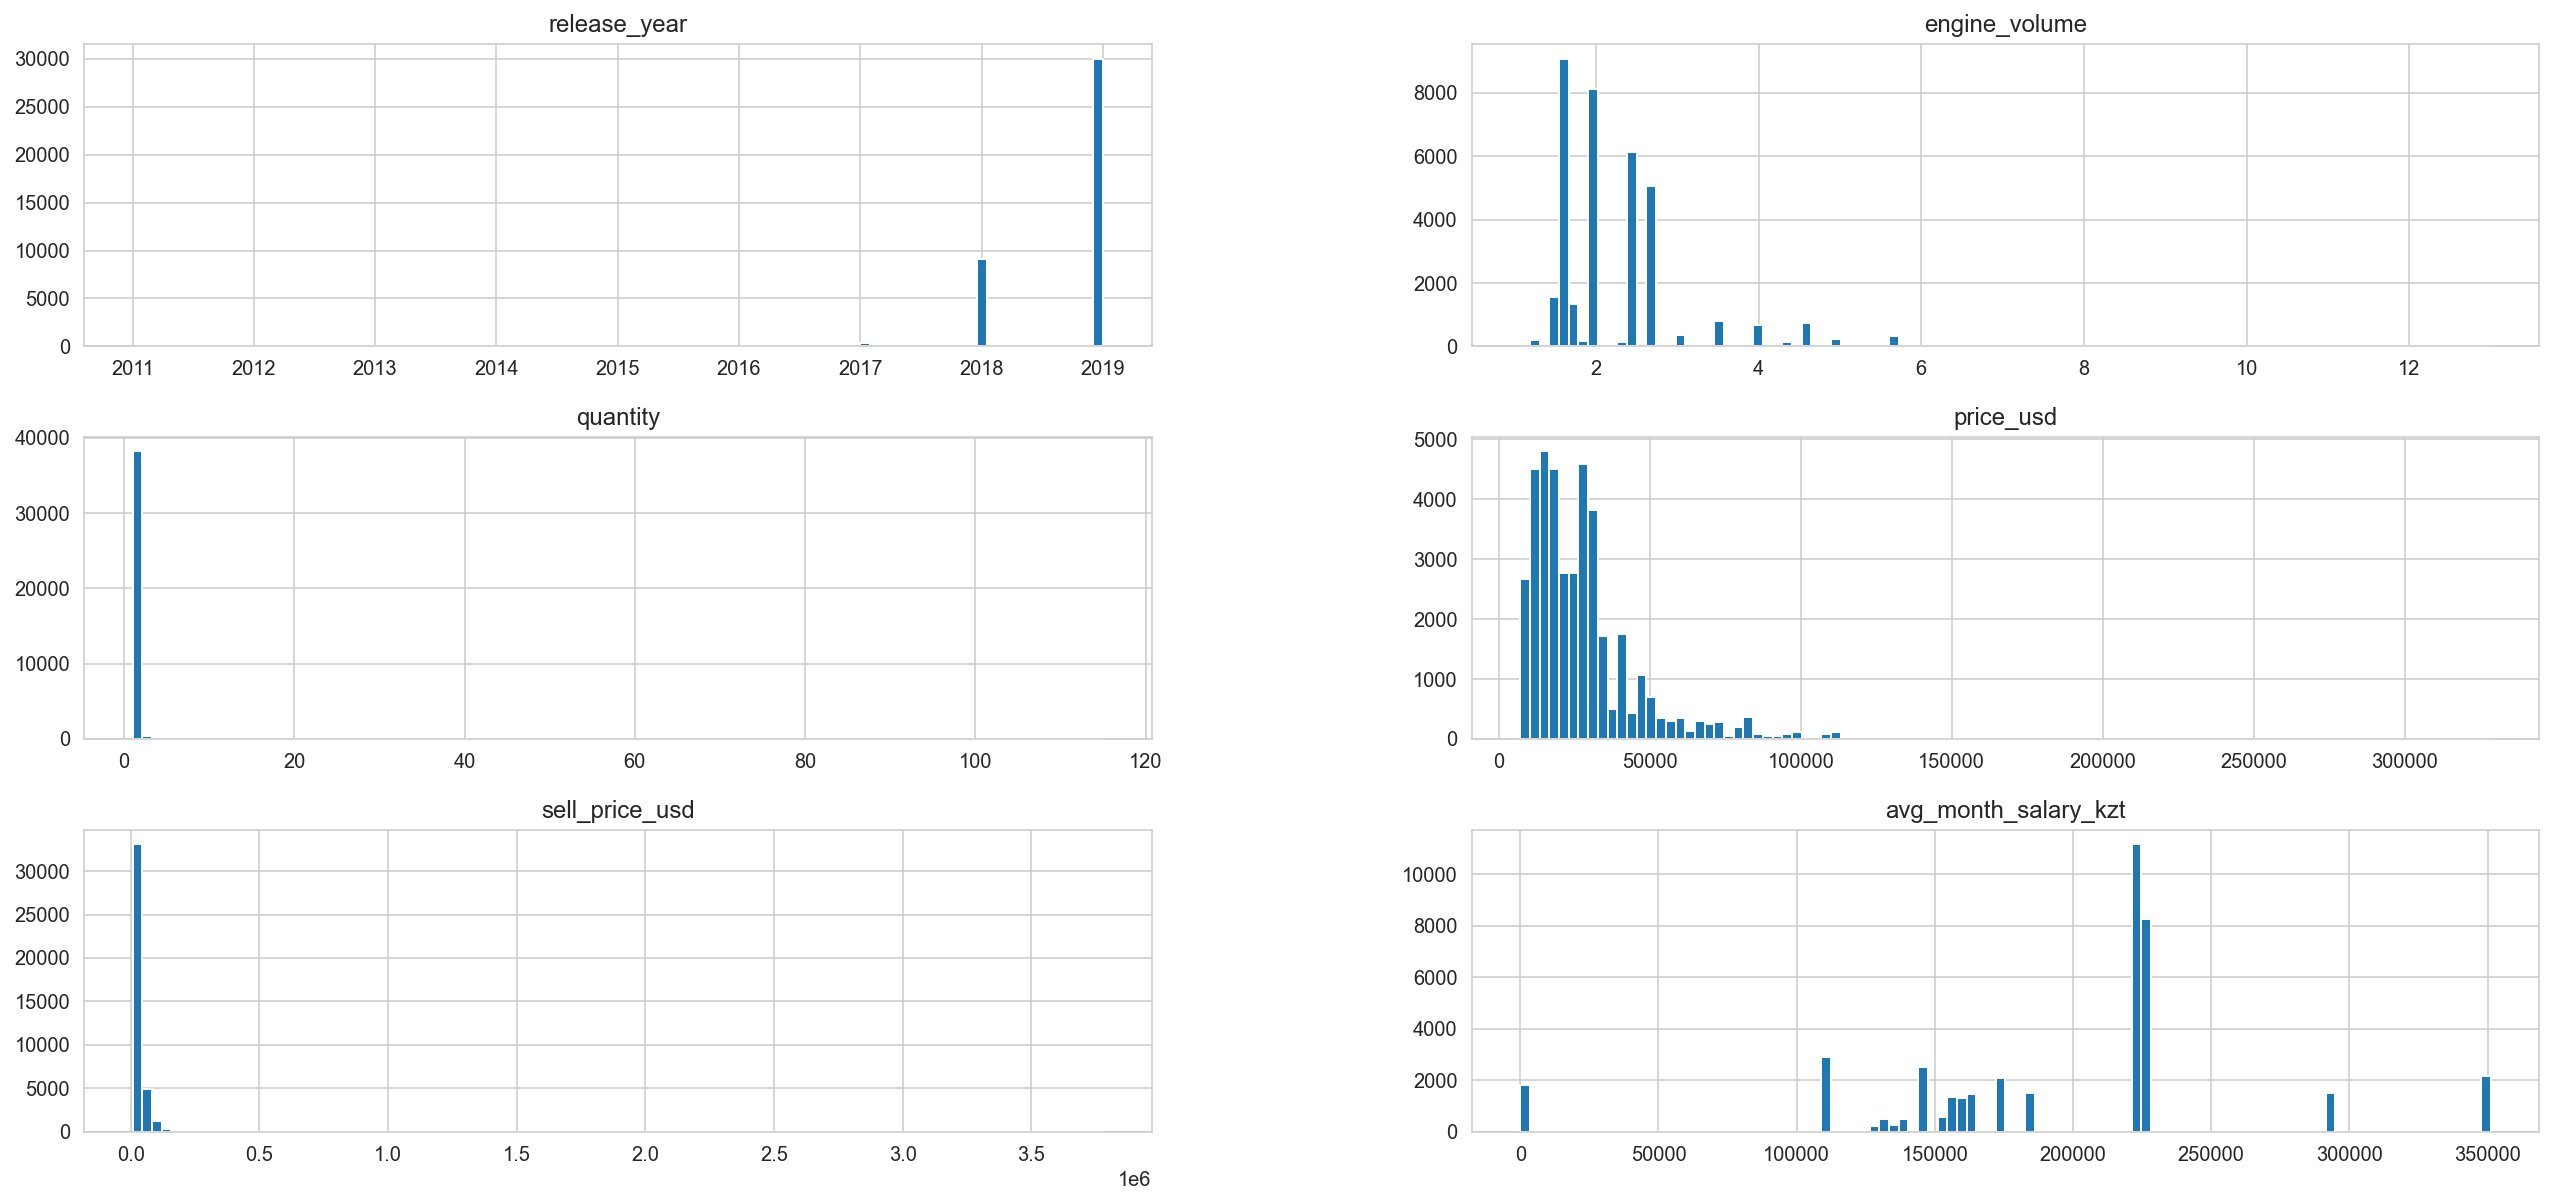

In [54]:
# построим гистограммы по всем числовым столбцам бегло, чтобы сразу посмостеть выбросы
df2.hist(bins=100, figsize=(22,10));

* В основном продавались авто производсва 2019 года, немного 2018, машин других годов единицы
* Среднее количество машин в заказе: 1.4шт.
* Средняя цена 1 авто 28_475 USD.

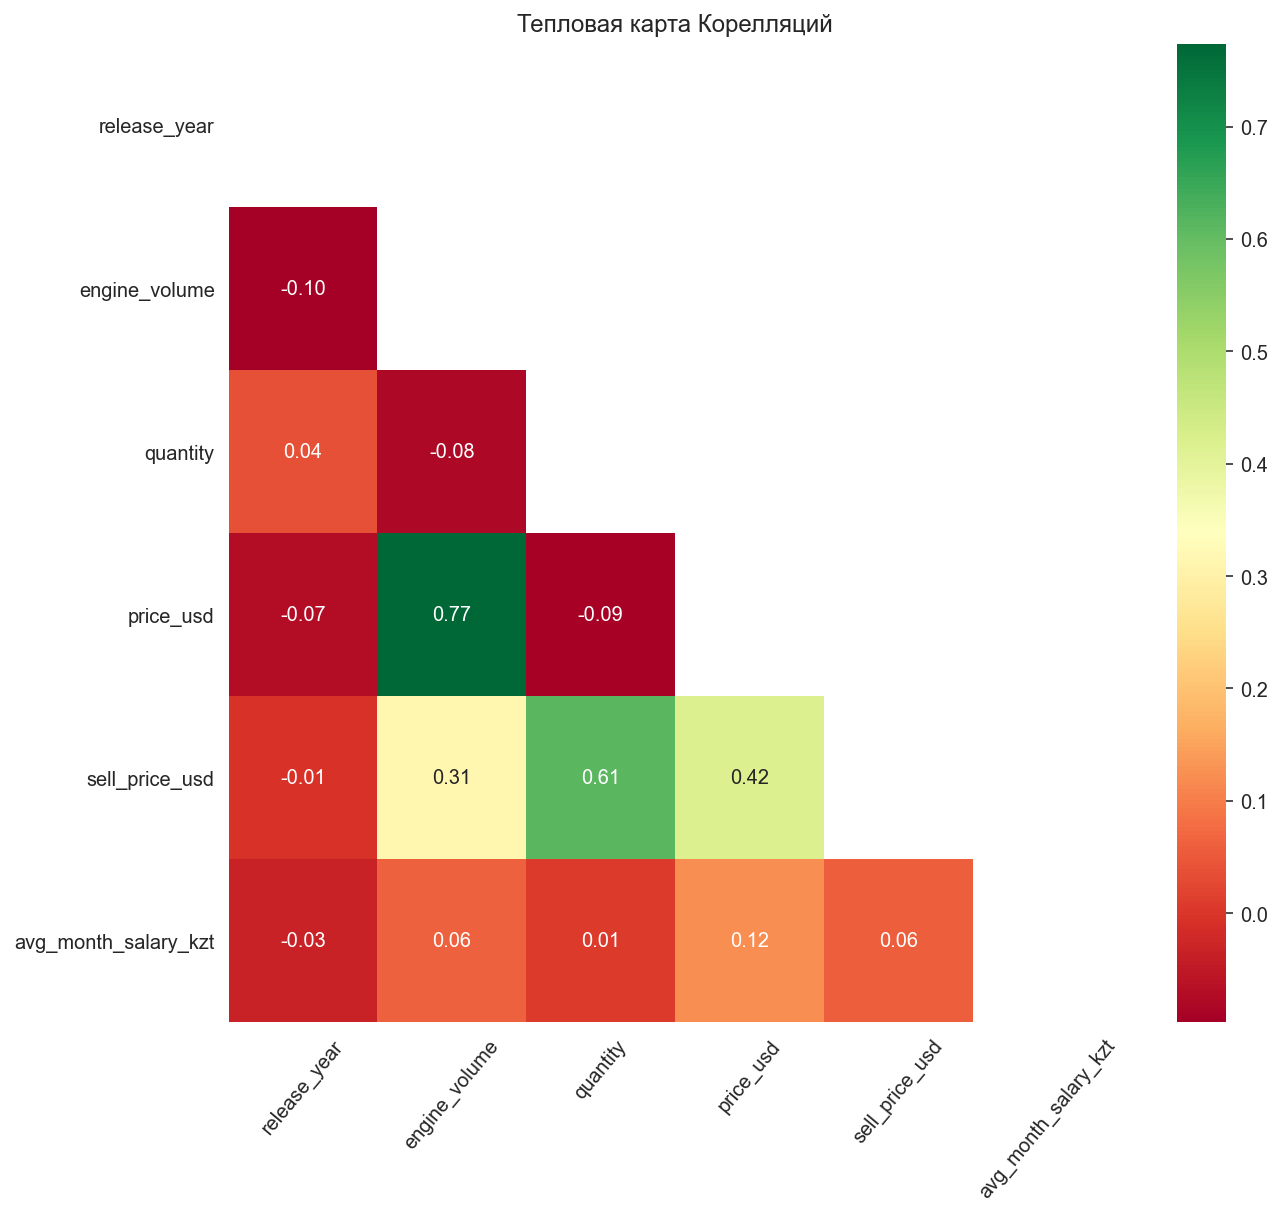

In [55]:
# посмотрим корелляции тепловой картой всего дф числовых значений,
# это поможет нам понять что нужно визуализировать
plt.figure(figsize=(10,9))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn', fmt='.2f',
            mask=np.triu(df2.corr())) # .2f-2цифры
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.title('Тепловая карта Корелляций')
plt.show()

- Есть Высокая корелляция Цена 1 авто - Объём двигателя л.
- Остальное не сильно интересно: созависимые корелляции: Заметная корелляция Цена заказа - Количество авто в заказе; Умеренная корелляция Цена заказа - Цена 1 авто, Цена заказа - Объём двиг л. (созависимо)

In [56]:
df2.sample(1)

company brand model  release_year manufacturing_country fuel_type  \
37205   Вираж   UAZ  3909          2018  Российская Федерация    Бензин   

       engine_volume transmission_type drive_type  region  quantity  \
37205           2.70                МТ        4WD  Актобе         1   

       price_usd  sell_price_usd                state  \
37205   14033.54        14033.54  Актюбинская область   

                  segment_2013            class_2013   sale_date  \
37205  Коммерческие автомобили  Развозные автомобили  2019-01-01   

      engine_volume_cat  avg_month_salary_kzt  
37205    4_(>2.5:<=3.0)                156595

In [57]:
# У меня еще вопрос, так как я сделал через PHIK это корректно?
# или надо переводить нужные признаки из строк в цифры? и делать обычную матрицу корелляций?

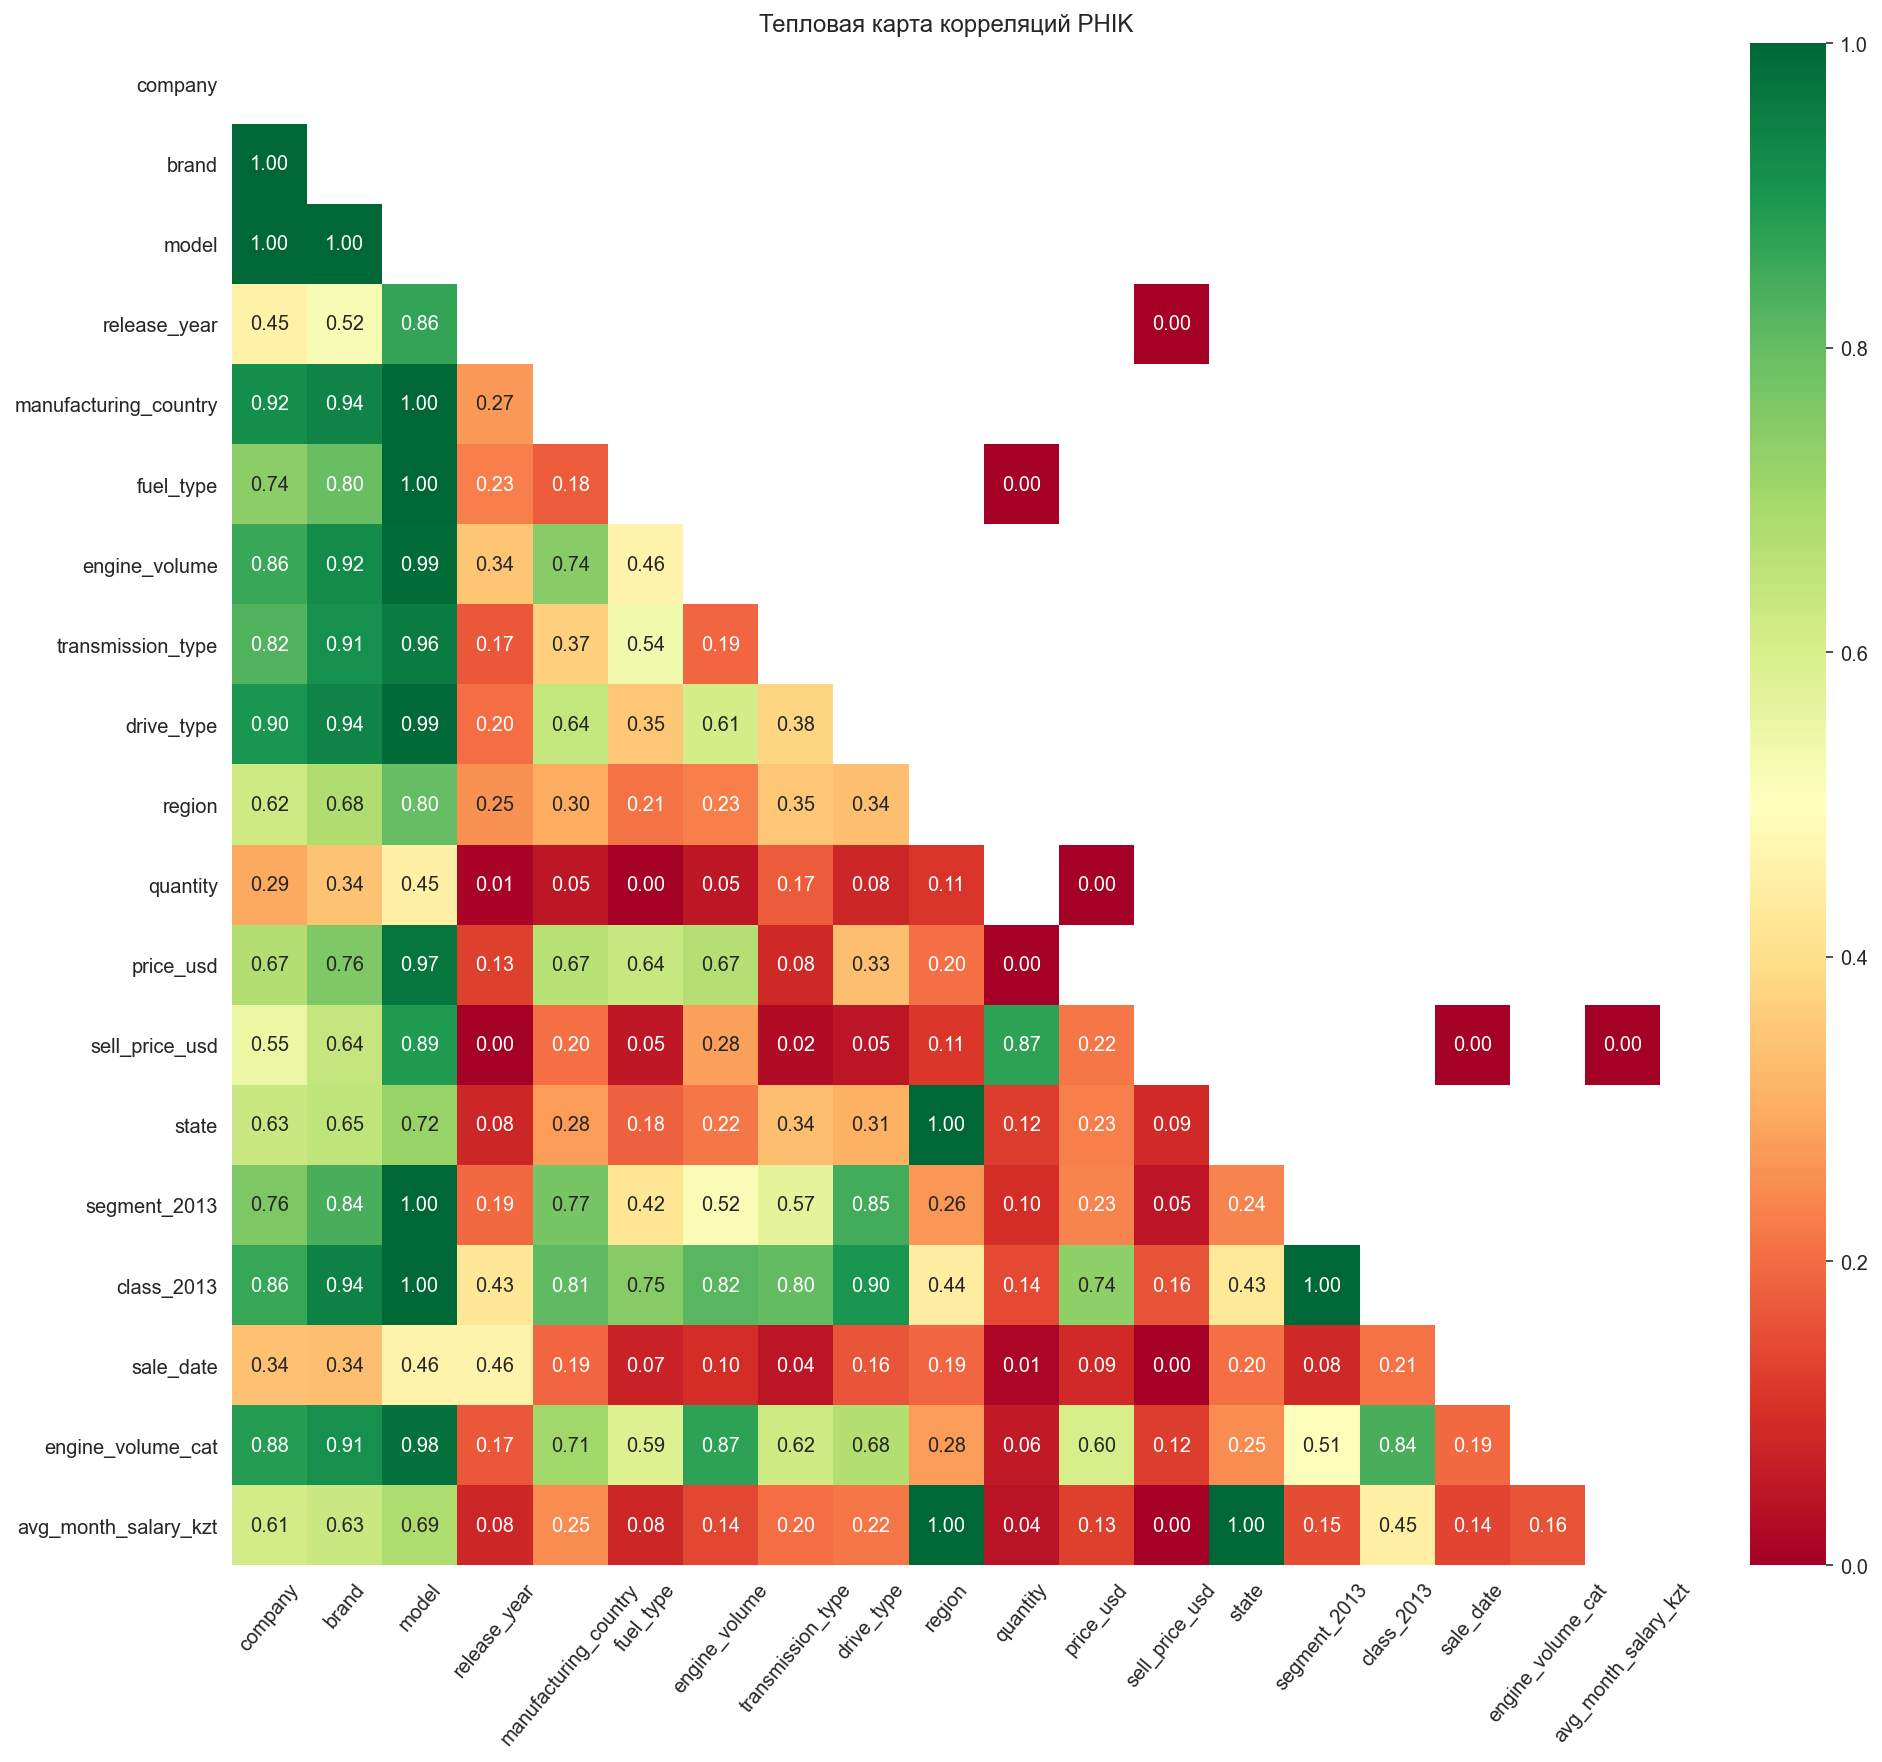

In [58]:
# Тепловая карта корреляций PHIK
phik = df2.phik_matrix(interval_cols=df2.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist())

plt.figure(figsize=(16,14))
sns.heatmap(phik, annot=True, cmap='RdYlGn', fmt='.2f',
           mask=np.triu(phik))
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.title('Тепловая карта корреляций PHIK')
plt.show()

Тепловая карта корреляций PHIK позволяет визуализировать степень взаимосвязи между всеми парами переменных в данных. Он основан на кросс-таблицах (таблицы сопряженности) между категориальными переменными и измеряет степень их взаимосвязи или взаимозависимости.

Она нам говорит о том что в анализе скорее всего можно выявить, из интересного:
* У 1 компании может быть определенный солобренд, от которого есть своя ниша: ~ одинаковые характеристики (объем двигателя, тип привода, класс и т.д.).
* Кол-во Умеренно зависит от модели
* От страны-производителя зависит сегмент и класс.

### 3.2 Функции для графиков

In [59]:
def count_plot(column,
              title,
              ylabel,
              palette='Wistia_r', # 'Blues_r'
              figsize=(15, 8),
              top_n=10):
    '''Функция для визуализации countplot-
    подсчет кол-ва категориальных значений.
    По умолчанию palette='Wistia_r', figsize=(15, 8), top_n=10
    '''
    plt.figure(figsize=figsize)
    sns.countplot(y=column,
                  palette=palette,
                  order=column.value_counts().nlargest(top_n).index)
    # Надписи числовые
    for y, x in enumerate(column.value_counts().nlargest(top_n)):
        plt.text(x, y, f'{x:.0f}', fontsize=10)
    plt.title(title)
    plt.xlabel('Количество')
    plt.ylabel(ylabel)
    plt.show()

In [60]:
def box_plot(column,
              title,
              #xlabel,
              #color='Blue', # 'Blues_r'
              figsize=(14, 5),
              xlim=(None,None)
            ):
    '''Функция для визуализации boxplot
    По умолчанию figsize=(14, 5), xlim=(None,None)
    '''
    plt.figure(figsize=figsize)

    ax1 = plt.subplot(2, 1, 1)
    sns.boxplot(data=column, orient='h', notch=True, ax=ax1)
    plt.title(title, fontsize=15)
# точки показывают скопление около значений, но тут они не подходят
#     # добавим точки
#     sns.stripplot(x=column, y=None, data=column, color='Orange', size=3, alpha=0.1, jitter=0.2, ax=ax1)
#     plt.xlabel(None)

    ax2 = plt.subplot(2, 1, 2)
    sns.boxplot(data=column, orient='h', notch=True, ax=ax2)
# точки показывают скопление около значений, но тут они не подходят
#     # добавим точки
#     sns.stripplot(x=column, y=None, data=column, color='Orange', size=3, alpha=0.1, jitter=0.2, ax=ax2)
#     plt.xlabel(None)

    # определяем зазор между графиками
    plt.subplots_adjust(hspace=0.8)
    # отсечение по квантилям
    q1, q3 = column.quantile(0.25), column.quantile(0.75)
    #q1, q3 = np.quantile(column, [0.25, 0.75])
    iqr = q3 - q1
    xlim = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
    # печатаем
    plt.xlim(xlim) # ограничим ось X
    plt.title(title + ' без выбросов', fontsize=15)
    plt.show()
    print(f'''
    Основная масса значений(50%) лежит в диапазоне от q1-{q1} до q3-{q3},
    Минимум: {column.min()},
    Среднее: {column.mean():.2f},
    Медиана: {column.median():.2f}
    Максимум: {column.max()}''')

In [61]:
def bar_plot(data, x, y,
             title,
             xlabel,
             ylabel,
             palette='summer',
             figsize=(15, 8)):
    '''Функция для построения barplot.
    '''
    plt.figure(figsize=figsize)
    sns.barplot(data=data, x=x, y=y, palette=palette)
    for y_val, x_val in enumerate(data[x]):
        plt.text(x_val, y_val, f'{x_val:,.0f}', fontsize=12)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [62]:
def pie_plot(data,
             title,
             figsize = (8,8),
             text_num = 1
            ):
    '''Функция для построения pie chart.
    '''
    plt.figure(figsize=figsize)
    cat_cnt = data.value_counts()
   # Создаем круговую диаграмму с процентами
    _, _, autotexts = plt.pie(cat_cnt,
                              labels=cat_cnt.index,
                              autopct='%1.1f%%', # формат процентов
                              #startangle=140,
                              textprops={'fontsize': 14},
                              pctdistance=0.85, # расстояние между центром и процентами
                              labeldistance=1.1) # расстояние между центром и метками labels
    if text_num == 1:
        # Добавляем числа - под процентами
        for i, label in enumerate(cat_cnt.index):
            plt.text(autotexts[i].get_position()[0],
                     autotexts[i].get_position()[1] - 0.1,
                     '{:,.0f}'.format(cat_cnt.iloc[i]),
                     fontsize=14,
                     ha='center')
    elif text_num == 2:
        # Добавляем числа - слева от процентов
        for i, label in enumerate(cat_cnt.index):
            plt.text(autotexts[i].get_position()[0] - 0.3,
                     autotexts[i].get_position()[1] - 0.02,
                     '{:,.0f}'.format(cat_cnt.iloc[i]),
                     fontsize=14,
                     ha='center')
    else:
        pass

    plt.title(title, fontsize=15)
    plt.show()

### 3.3 Автоцентры - Бренды

In [63]:
# Компания – название автоцентра - 'company'
# Бренд – название продаваемой марки автомобиля - 'brand'
print(f'Количество уникальных компаний(название автоцентра): {df2.company.nunique()}')
print(f'Количество уникальных Брендов (название продаваемой марки автомобиля): {df2.brand.nunique()}')

Количество уникальных компаний(название автоцентра): 33
Количество уникальных Брендов (название продаваемой марки автомобиля): 46


In [64]:
company_brand = df2.groupby('company')['brand'].nunique().sort_values(ascending=False).reset_index()
company_brand.head()

company  brand
0   Allur Auto      7
1   БИПЭК АВТО      5
2        СемАЗ      4
3        Вираж      3
4  Mercur Auto      3

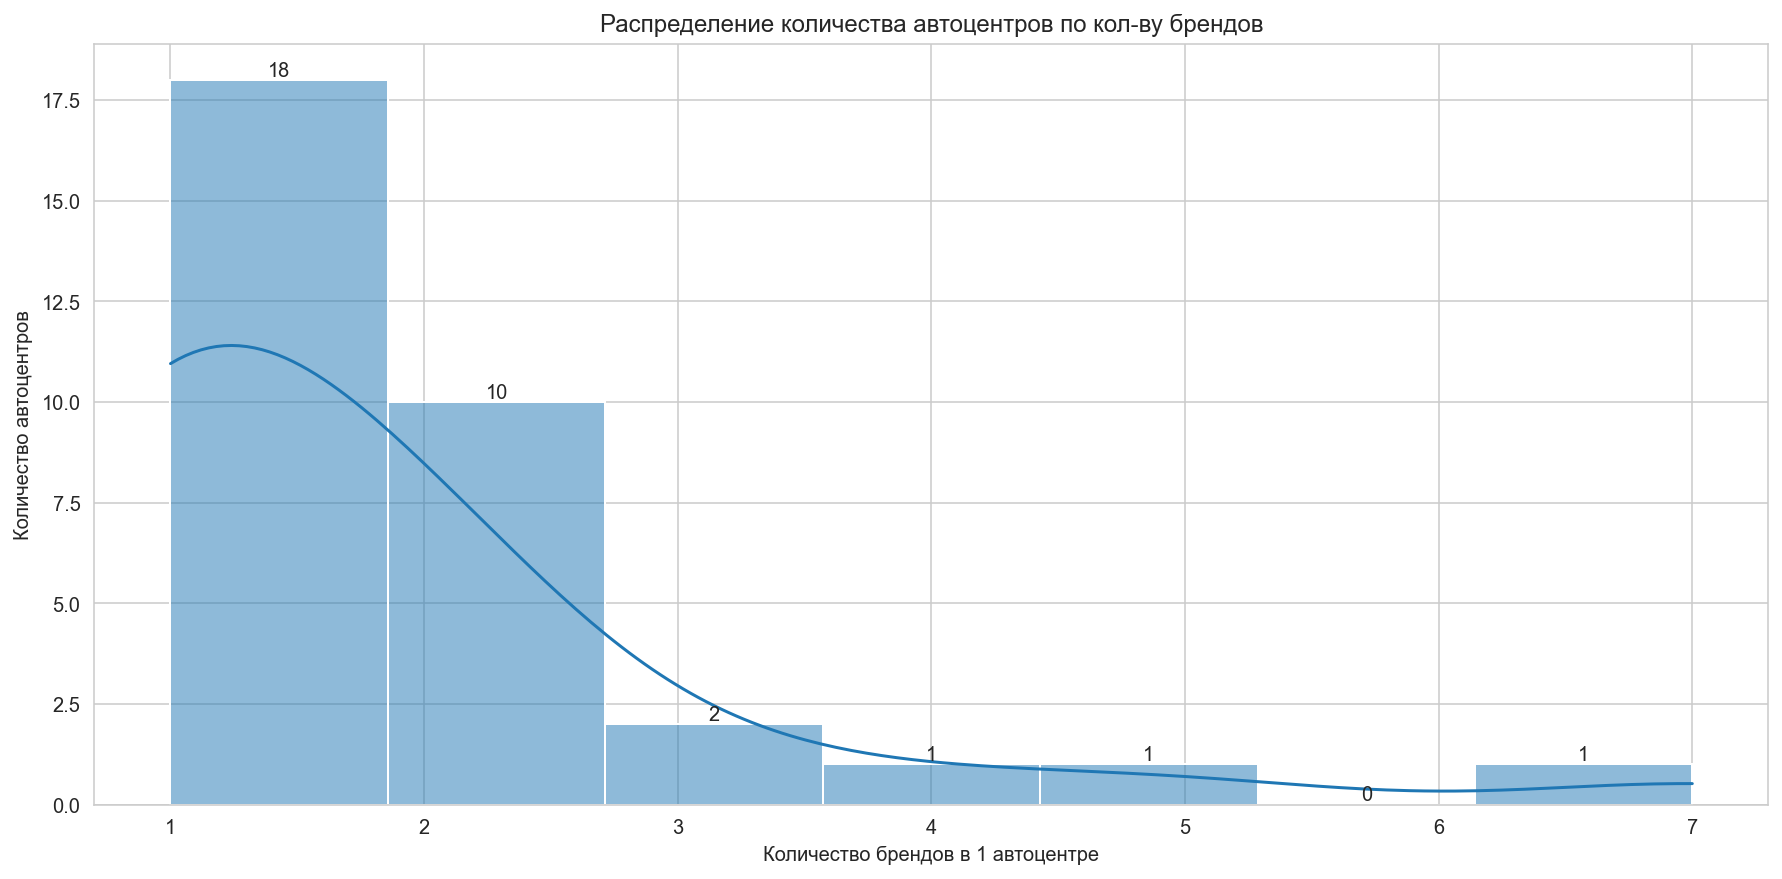

In [65]:
# распределение
plt.figure(figsize=(15, 7))
sns.histplot(x=company_brand['brand'],
             stat='count',
             bins=max(company_brand['brand']),
             kde=True)
# gолучаем контейнеры гистограммы
containers = plt.gca().containers[0]
# добавляем числовые надписи
for container in containers:
    height = container.get_height()
    plt.text(container.get_x() + container.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Распределение количества автоцентров по кол-ву брендов')
plt.xlabel('Количество брендов в 1 автоцентре')
plt.ylabel('Количество автоцентров')
plt.show()

In [66]:
print(f'Всего автоцентров {len(company_brand)}шт., \
из них моно-брендовых {len(company_brand.query("brand == 1"))}шт., \
мульти-брендовых {len(company_brand.query("brand > 1"))}шт.')

Всего автоцентров 33шт., из них моно-брендовых 18шт., мульти-брендовых 15шт.


Основная масса автоцентров моно-брендовые. Максимальное кол-во брендов 7шт. у Allur Auto.

### 3.3 Бренд(марка) - Модели

In [67]:
print(f'Количество уникальных моделей в датасете: {df2.model.nunique()}')

Количество уникальных моделей в датасете: 273


In [68]:
brand_model = df2.groupby('brand')['model'].nunique().reset_index(name='model_cnt')
brand_model.nlargest(10, 'model_cnt')

brand  model_cnt
18                KAMAZ         24
2                   BMW         14
26        Mercedes-Benz         14
42           Volkswagen         13
12  Hyundai Truck & Bus         10
41                  UAZ         10
1                  Audi          9
9                   GAZ          9
16                  Jac          9
19                  Kia          9

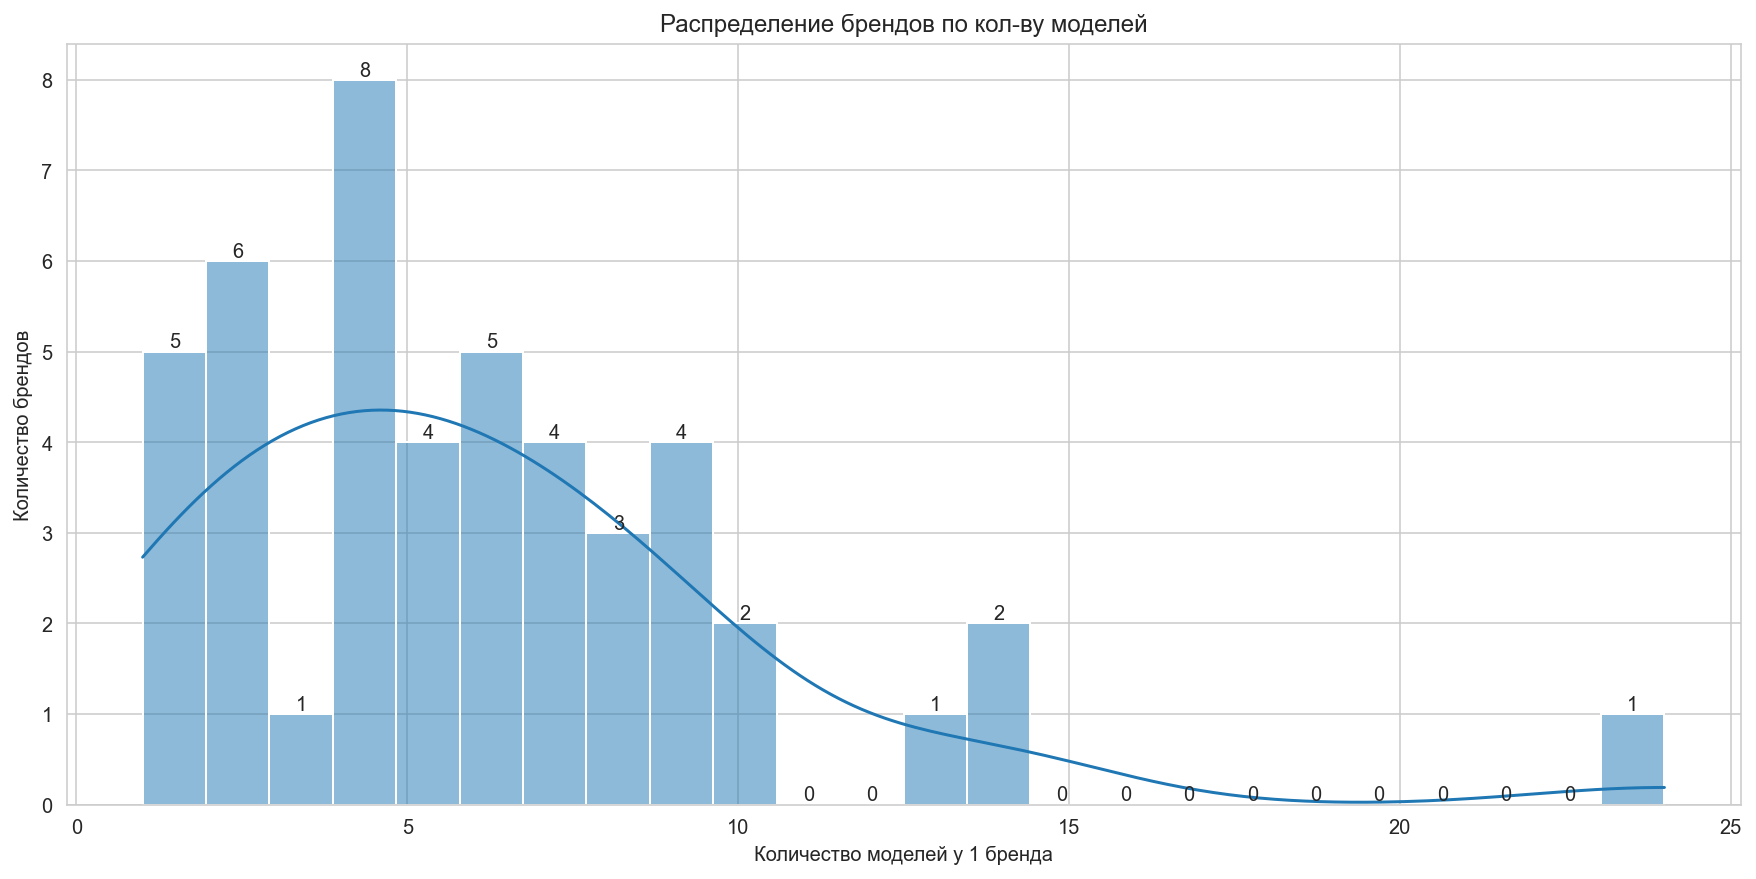

In [69]:
plt.figure(figsize=(15, 7))
sns.histplot(x=brand_model['model_cnt'],
             stat='count',
             bins = max(brand_model['model_cnt']),
             kde=True)
# Получаем контейнеры гистограммы
containers = plt.gca().containers[0]
# Добавляем числовые надписи
for container in containers:
    height = container.get_height()
    plt.text(container.get_x() + container.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Распределение брендов по кол-ву моделей')
plt.xlabel('Количество моделей у 1 бренда')
plt.ylabel('Количество брендов')
plt.show()

Обычно у бренда 5 моделей. Больше всего моделей у бренда KAMAZ-24шт. с отрывом почти в 2 раза, затем идут BMW-14, Mercedes-Benz-14, Volkswagen-13.
Количество уникальных моделей в датасете за 2019 год: 273.

### 3.4 Страна-производитель – страна, где произведен автомобиль - 'manufacturing_country'

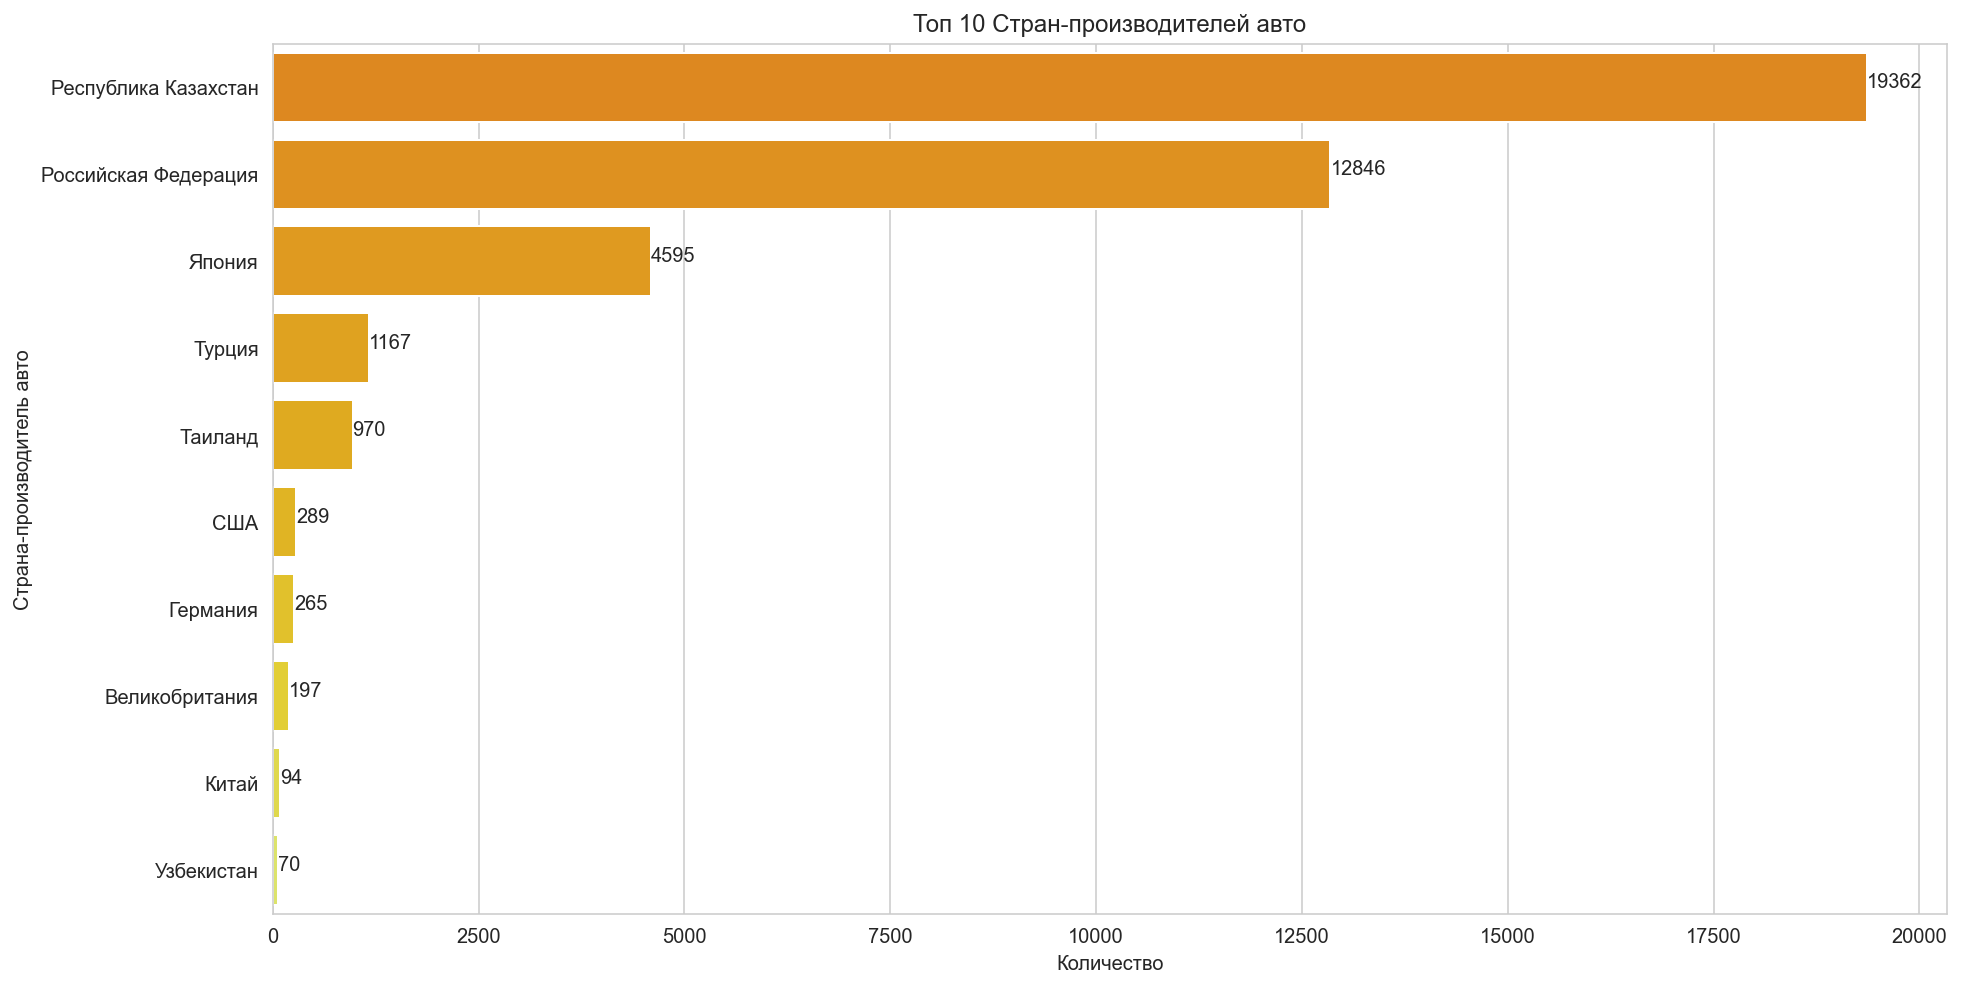

In [70]:
count_plot(df2['manufacturing_country'],
           'Топ 10 Стран-производителей авто',
           'Страна-производитель авто'
          )

Топ-3 стран-производителей авто: Казахстан -19,4тыс., РФ-12,8тыс., Япония-4,6тыс

### 3.5 Вид топлива - 'fuel_type'

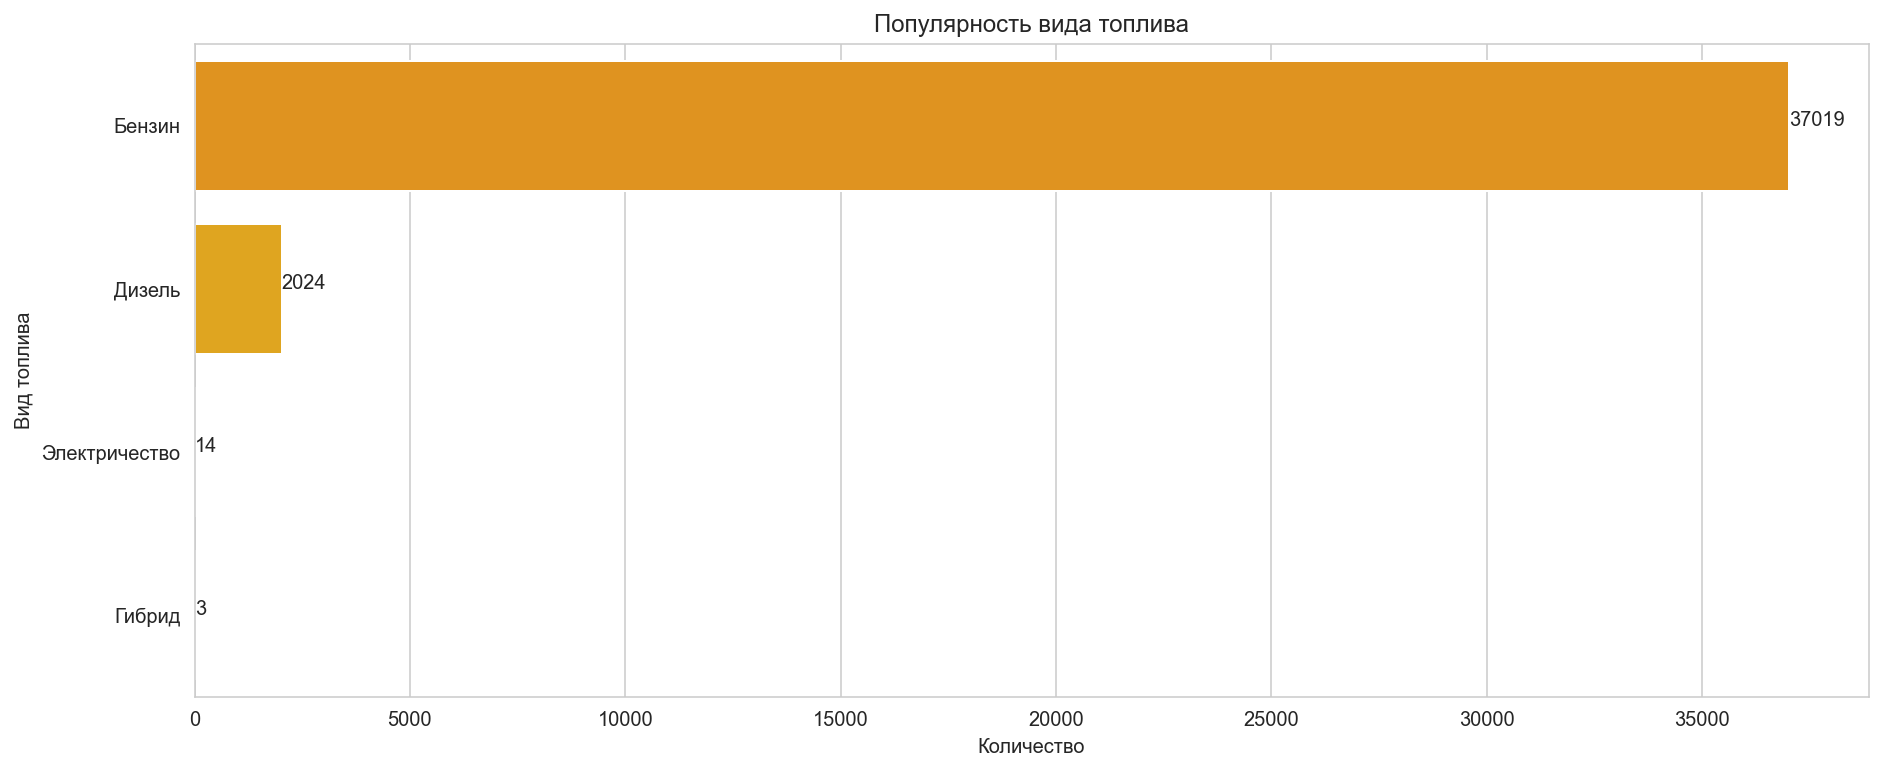

In [71]:
count_plot(df2['fuel_type'],
           'Популярность вида топлива',
           'Вид топлива',
           figsize=(15, 6)
          )

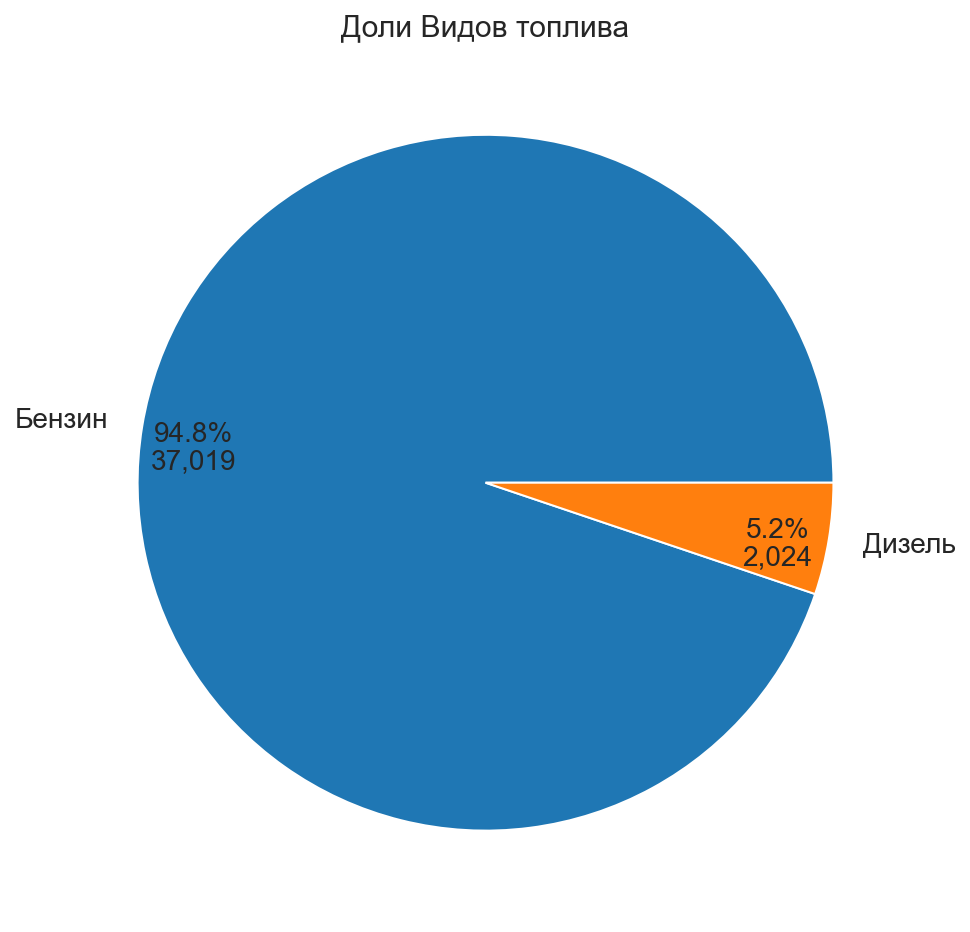

In [72]:
pie_plot(df2.query('fuel_type == "Дизель" | fuel_type == "Бензин"')['fuel_type'],
         'Доли Видов топлива'
        )

Бензин популярнее в 20 раз всех видов топлива вместе взятых 35тыс. Дизель на втором месте 1,8тыс. Есть достаточное кол-во пропусков 3тыс., возможно часть из них на электричестве или гибриде, но на известных данных их мизерно мало.

### 3.6 Объём двиг л – объем двигателя автомобиля в литрах - 'engine_volume'

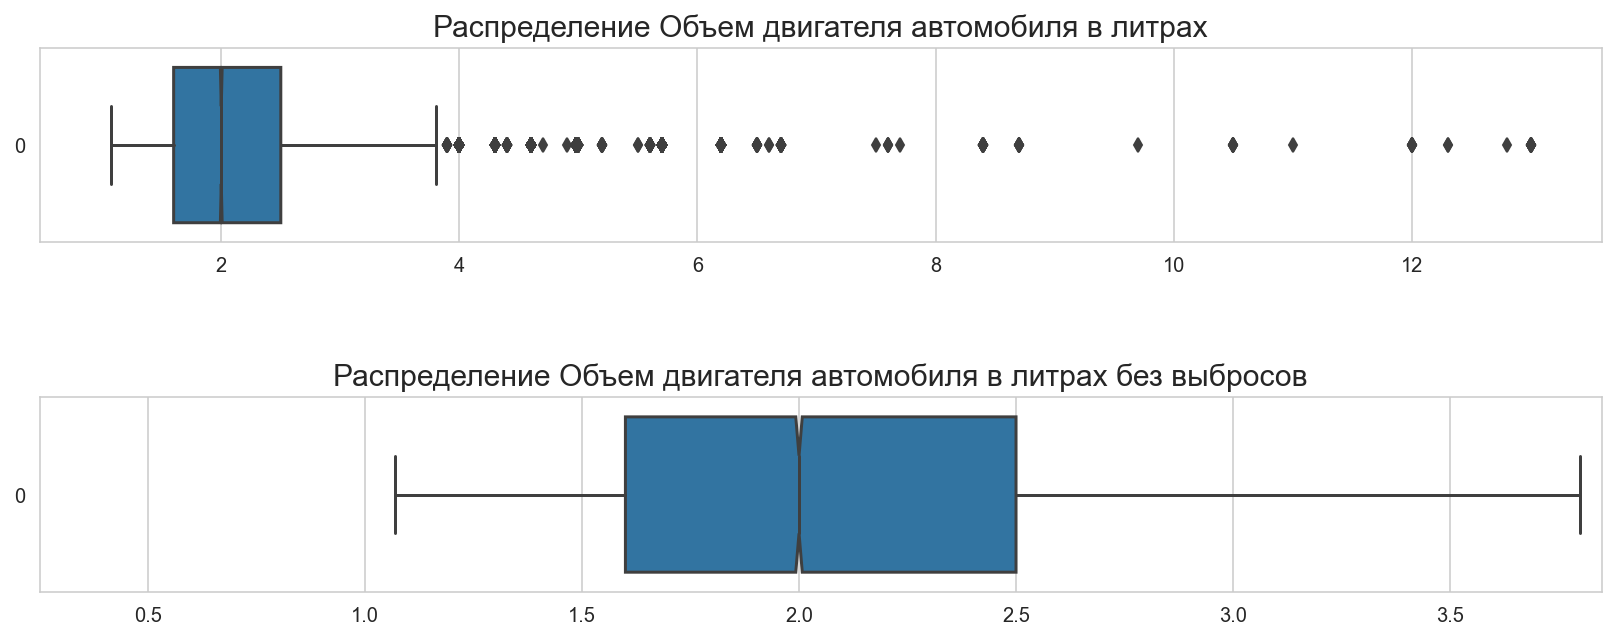


    Основная масса значений(50%) лежит в диапазоне от q1-1.6 до q3-2.5,
    Минимум: 1.07,
    Среднее: 2.29,
    Медиана: 2.00
    Максимум: 13.0


In [73]:
box_plot(df2['engine_volume'],
        'Распределение Объем двигателя автомобиля в литрах'
        )

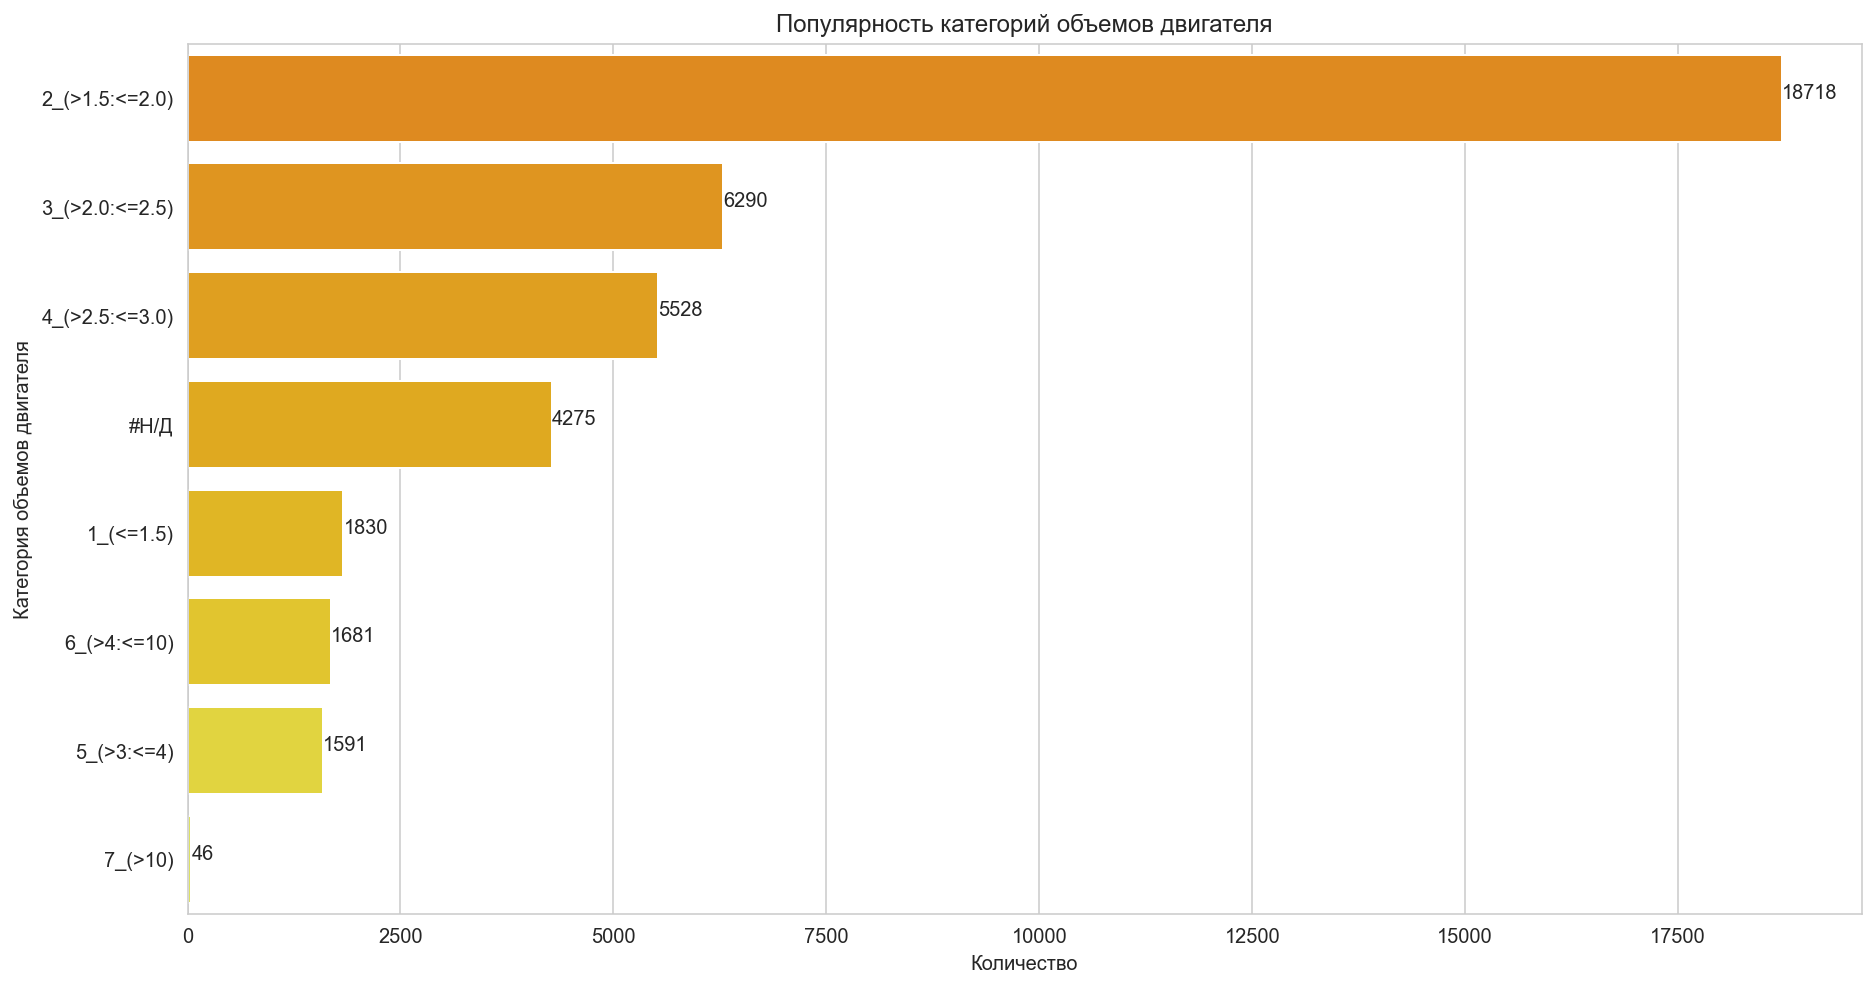

In [74]:
count_plot(df2['engine_volume_cat'],
           'Популярность категорий объемов двигателя',
           'Категория объемов двигателя'
          )

* Основная масса значений(50%) объемов двигателя лежит в диапазоне от 1.6 до 2.5л. Подавляющее большинство 1.6:2л -18тыс, дальше идут 2:2,5л -6тыс, 2,5:3-5.5тыс. Авто с объемом > 10л можно по пальцам пересчитать -46шт. это в основном это большой автобус или грузовик.(как мы выясняли из предобработки).

### 3.7 Коробка передач – тип коробки переключения передач 'transmission_type'

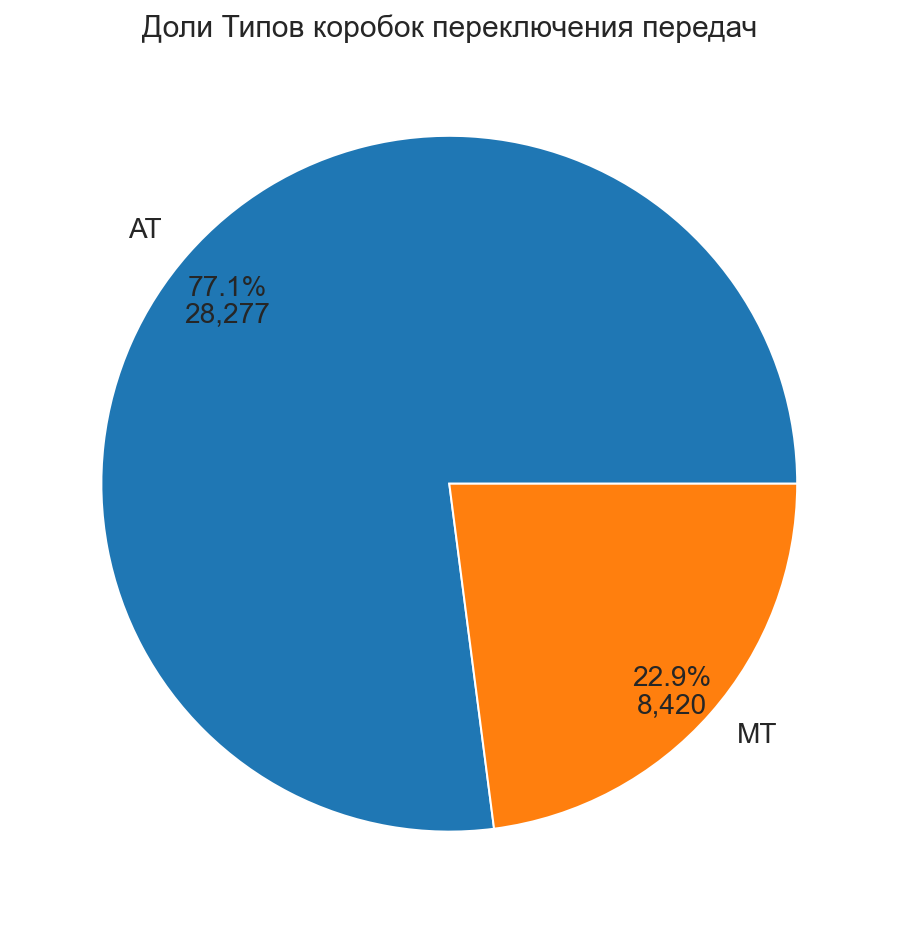

In [75]:
pie_plot(df2['transmission_type'],
         'Доли Типов коробок переключения передач'
        )

* Среди новых авто доминирует тип коробки - Автоматическая примерно в 3раза над механической.

### 3.8 Регион – регион продажи - 'region', Область – область продажи - 'state'

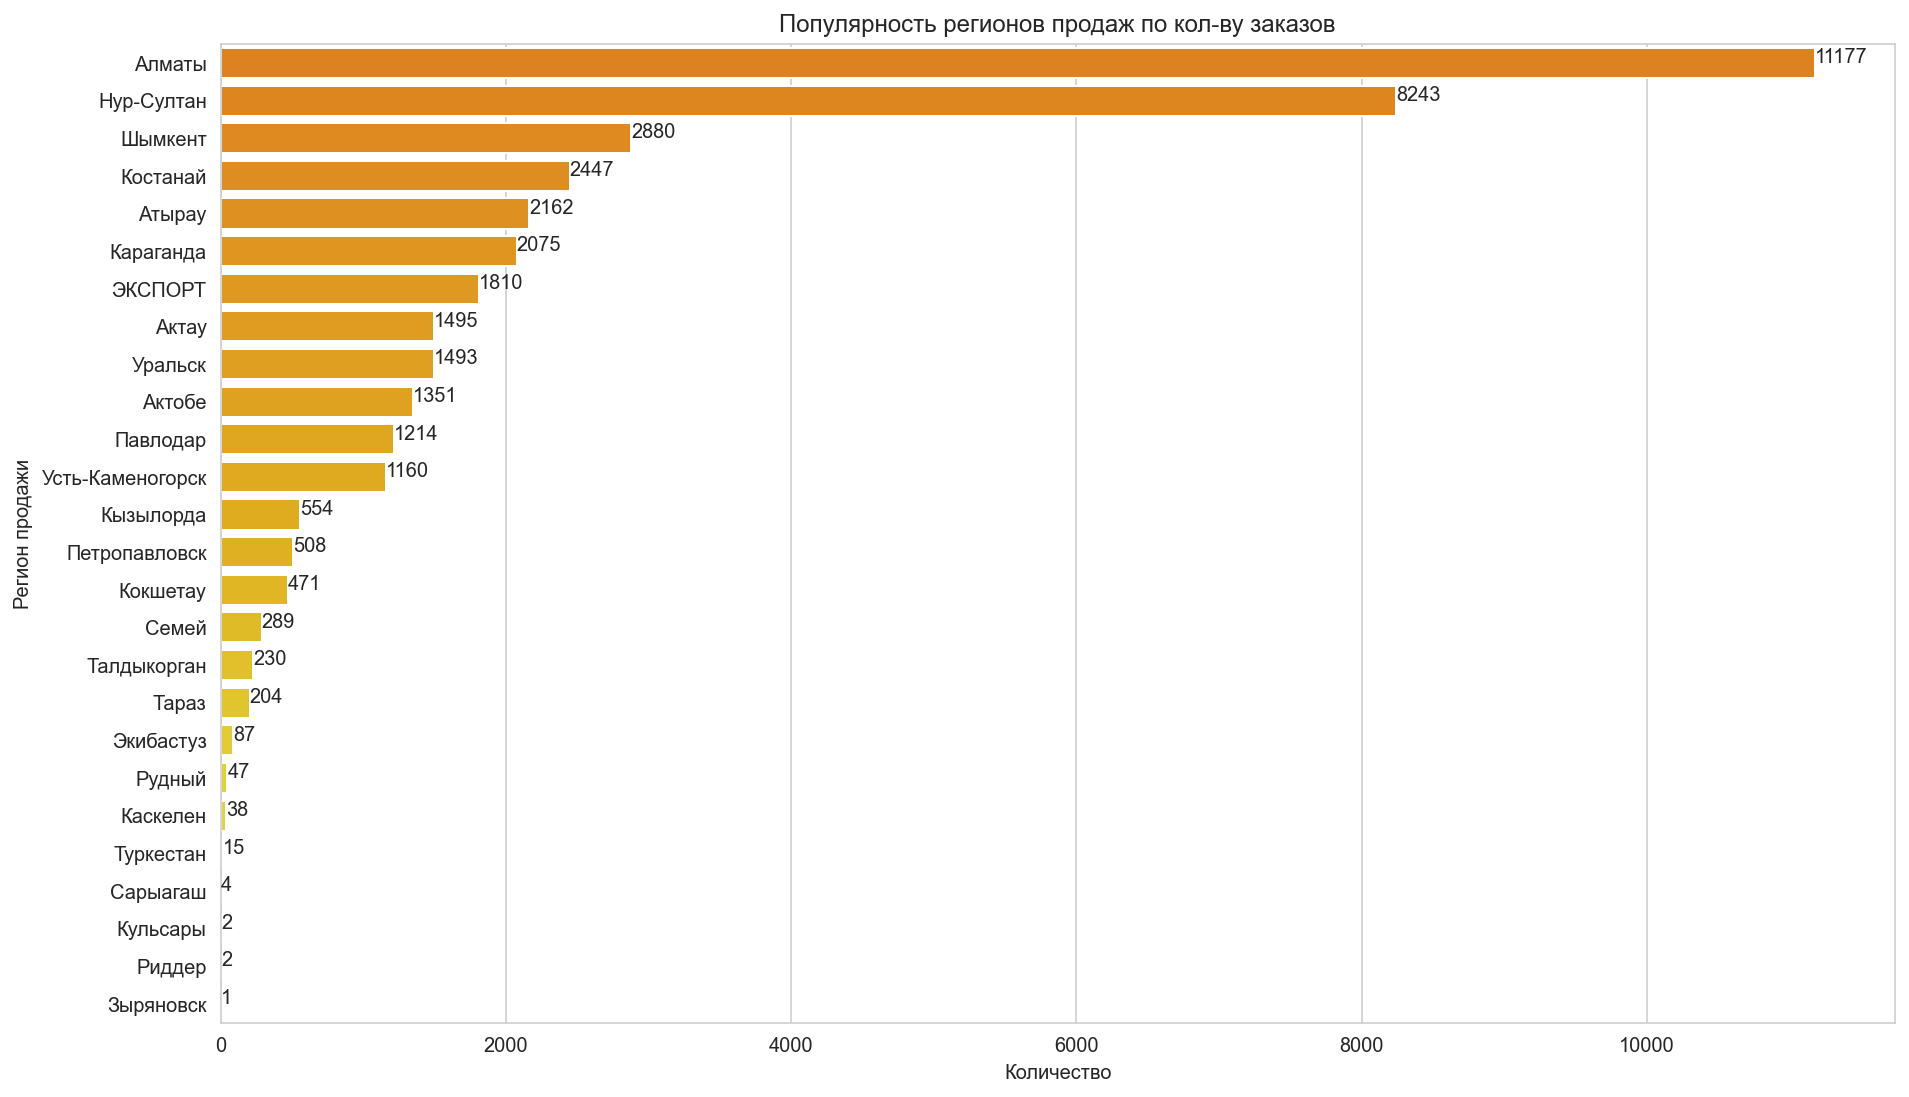

In [76]:
count_plot(df2['region'],
           'Популярность регионов продаж по кол-ву заказов',
           'Регион продажи',
           figsize=(15, 9),
           top_n=30
          )

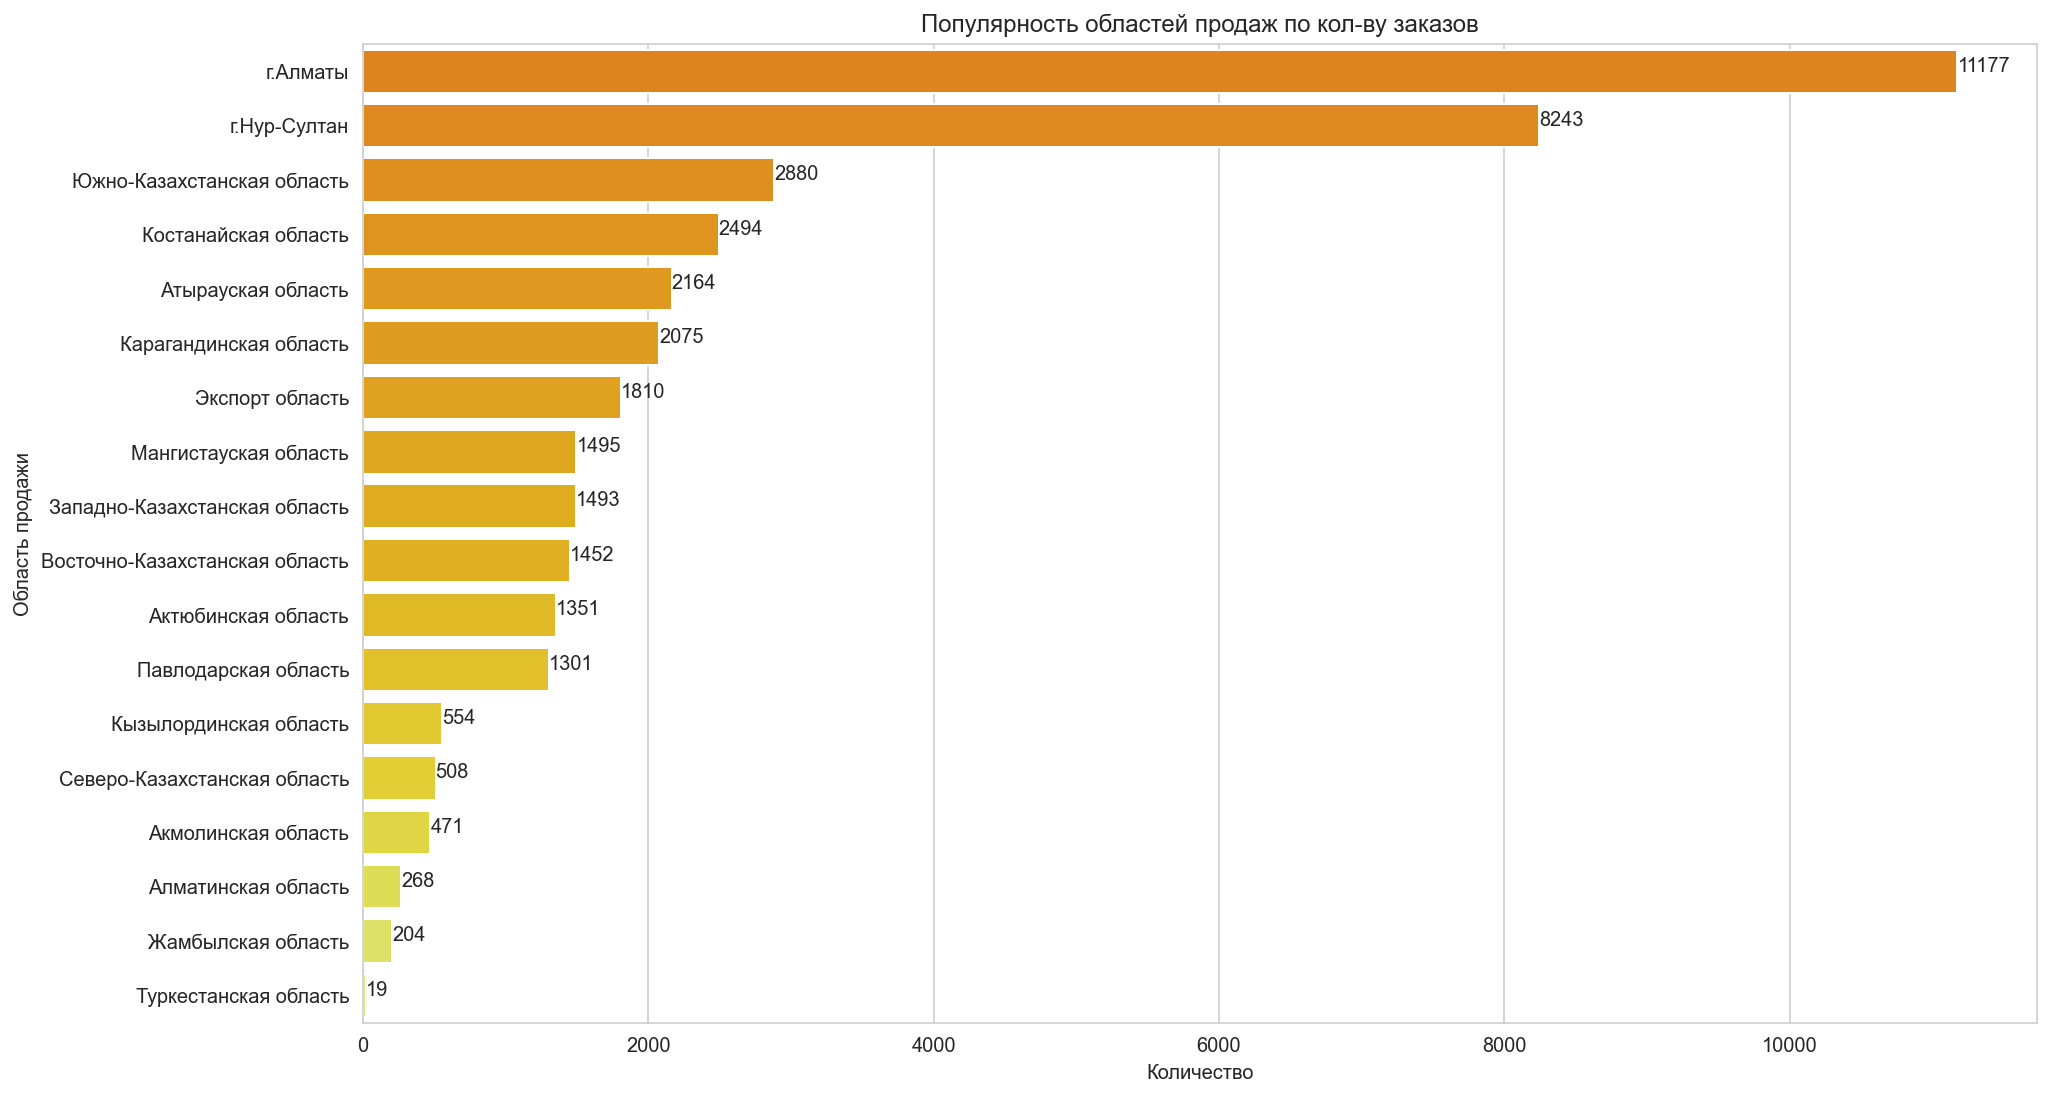

In [77]:
count_plot(df2['state'],
           'Популярность областей продаж по кол-ву заказов',
           'Область продажи',
           figsize=(15, 9),
           top_n=30
          )

Лидеры по продажам авто регионам города: г.Алматы 11тыс, г.Нур-Султан -8тыс., остальные менее 3тыс.

### 3.9 Год производства - release_year

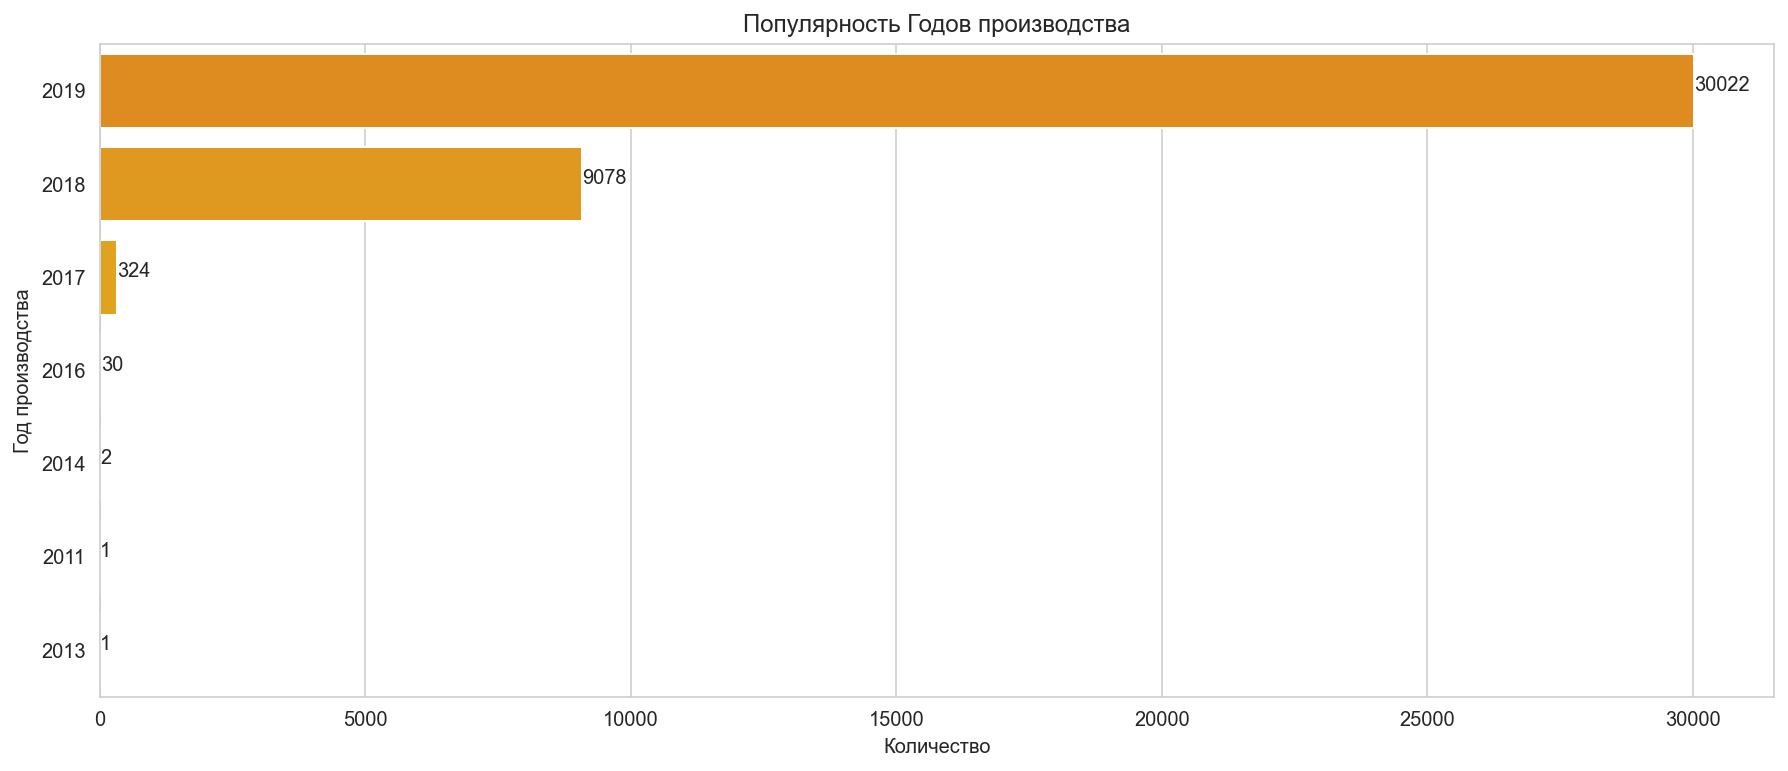

In [78]:
count_plot(df2['release_year'],
           'Популярность Годов производства',
           'Год производства',
           figsize=(15, 6)
          )

* Подавляющее большинство машин по Году производства это конечно 2019, и 1/4 2018 остатки видимо.

### 3.10 Тип привода - 'drive_type'
* Передний привод (FF или FWD): передний, FF, FWD
* Задний привод (RWD): задний, RWD
* Полный привод (4WD): Quattro, полный, AWD, 4WD, 4X4
* Для остальных 2WD: привод на два колеса, но не известно передний это привод или задний

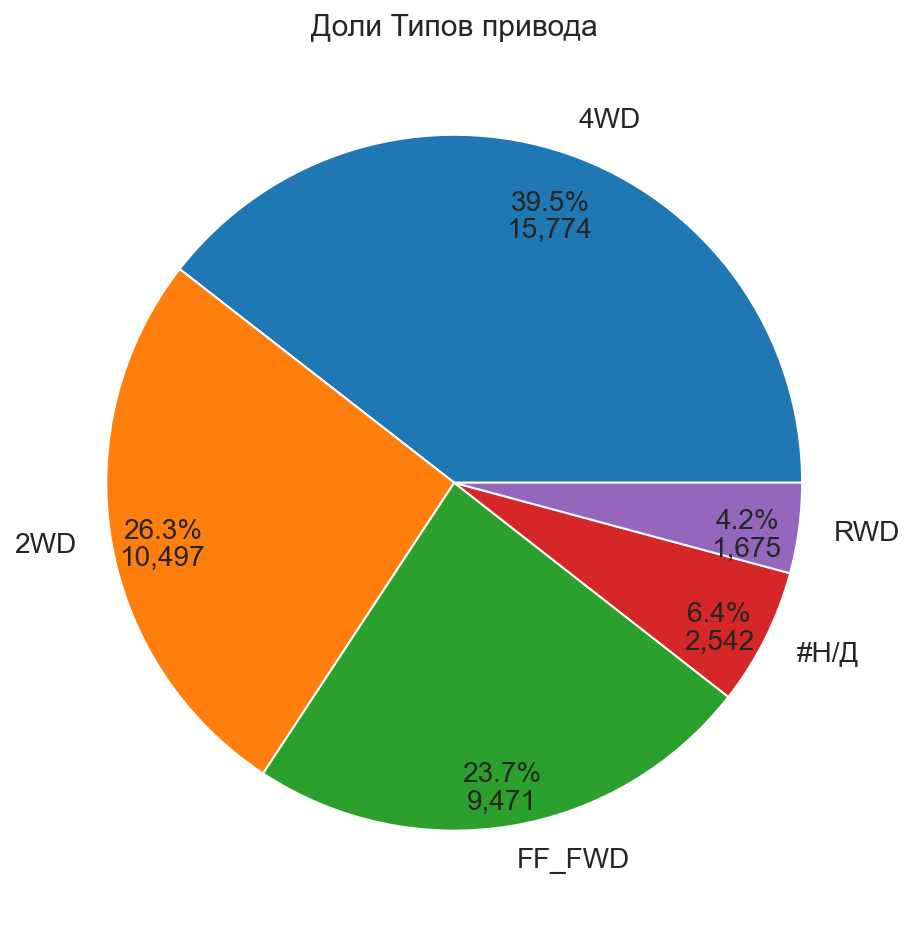

In [79]:
pie_plot(df2['drive_type'],
         'Доли Типов привода'
        )

* Топ по типам привода: Полный привод (4WD) -40%, 2WD(задний или передний) - 26%, остальная часть неизвестна, очень мало заднего привода.

### 3.11 Количество – количество автомобилей в заказе - 'quantity'

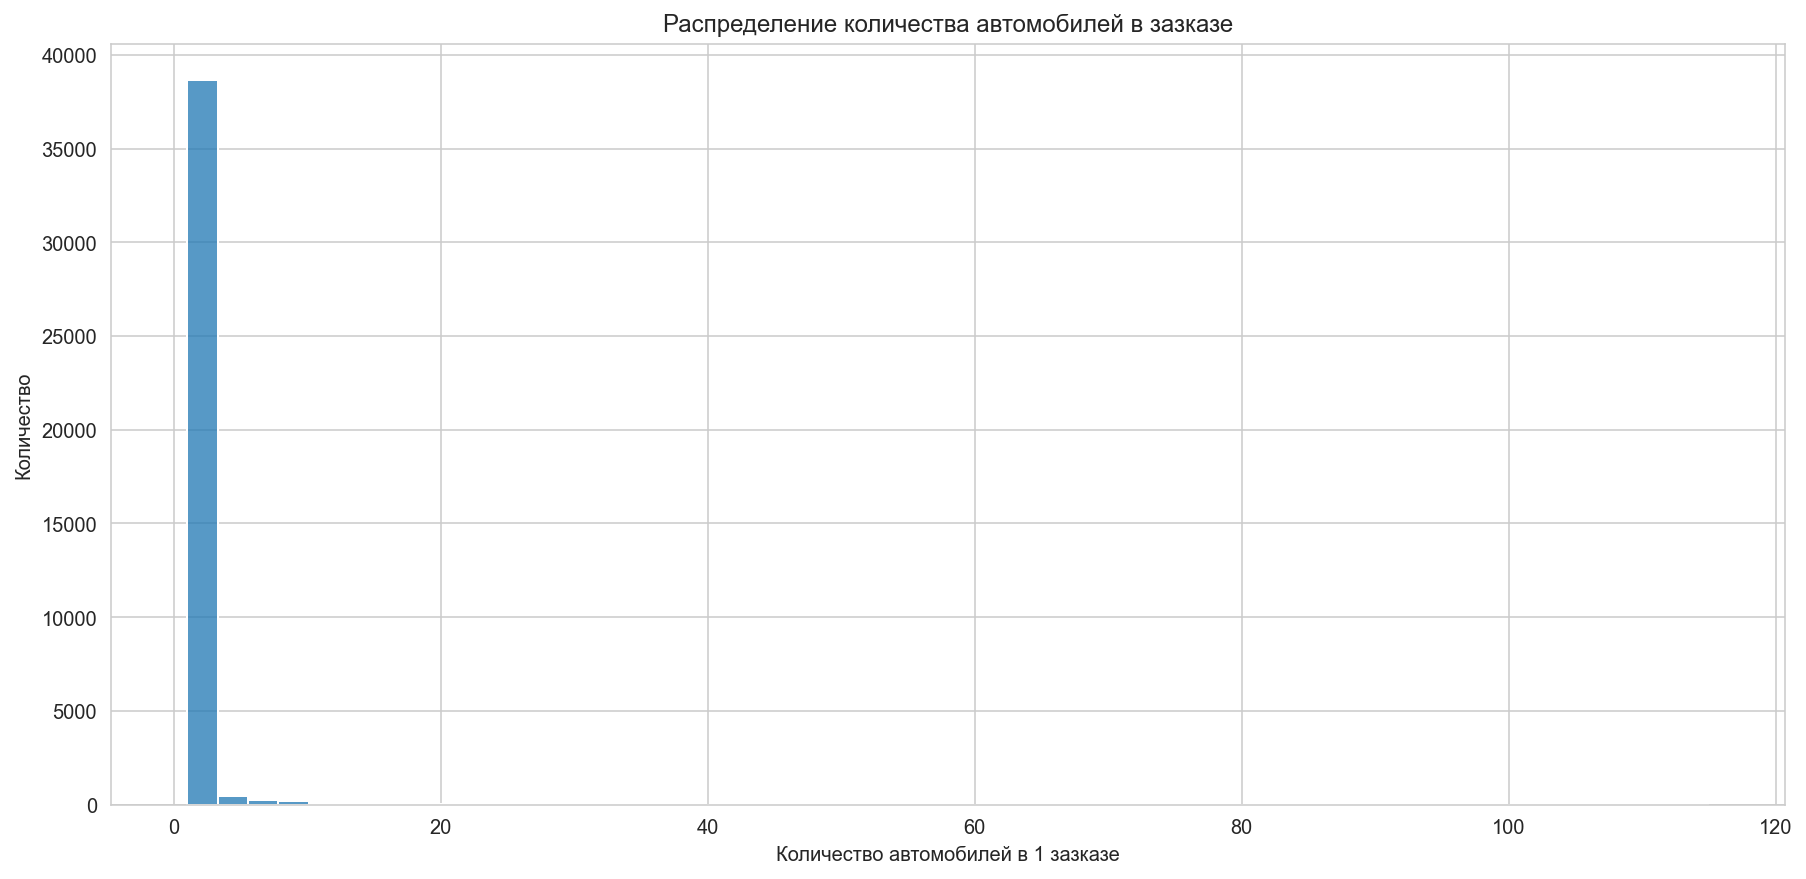

In [80]:
# распределение
plt.figure(figsize=(15, 7))
sns.histplot(x=df2['quantity'],
             stat='count',
             bins=50
             #kde=True
            )
plt.title('Распределение количества автомобилей в зазказе')
plt.xlabel('Количество автомобилей в 1 зазказе')
plt.ylabel('Количество')
plt.show()

In [81]:
df2.query('quantity > 50')['company'].unique()

array(['Allur Auto', 'БИПЭК АВТО', 'Volkswagen Group Rus'], dtype=object)

* Подавляющее большинство в заказе кол-во авто -1шт, среднее 1.35шт. Компании у которых есть очень крупные заказы от 50шт машин: 'Allur Auto', 'БИПЭК АВТО', 'Volkswagen Group Rus'

### 3.12 Цена USD – цена автомобиля - 'price_usd'

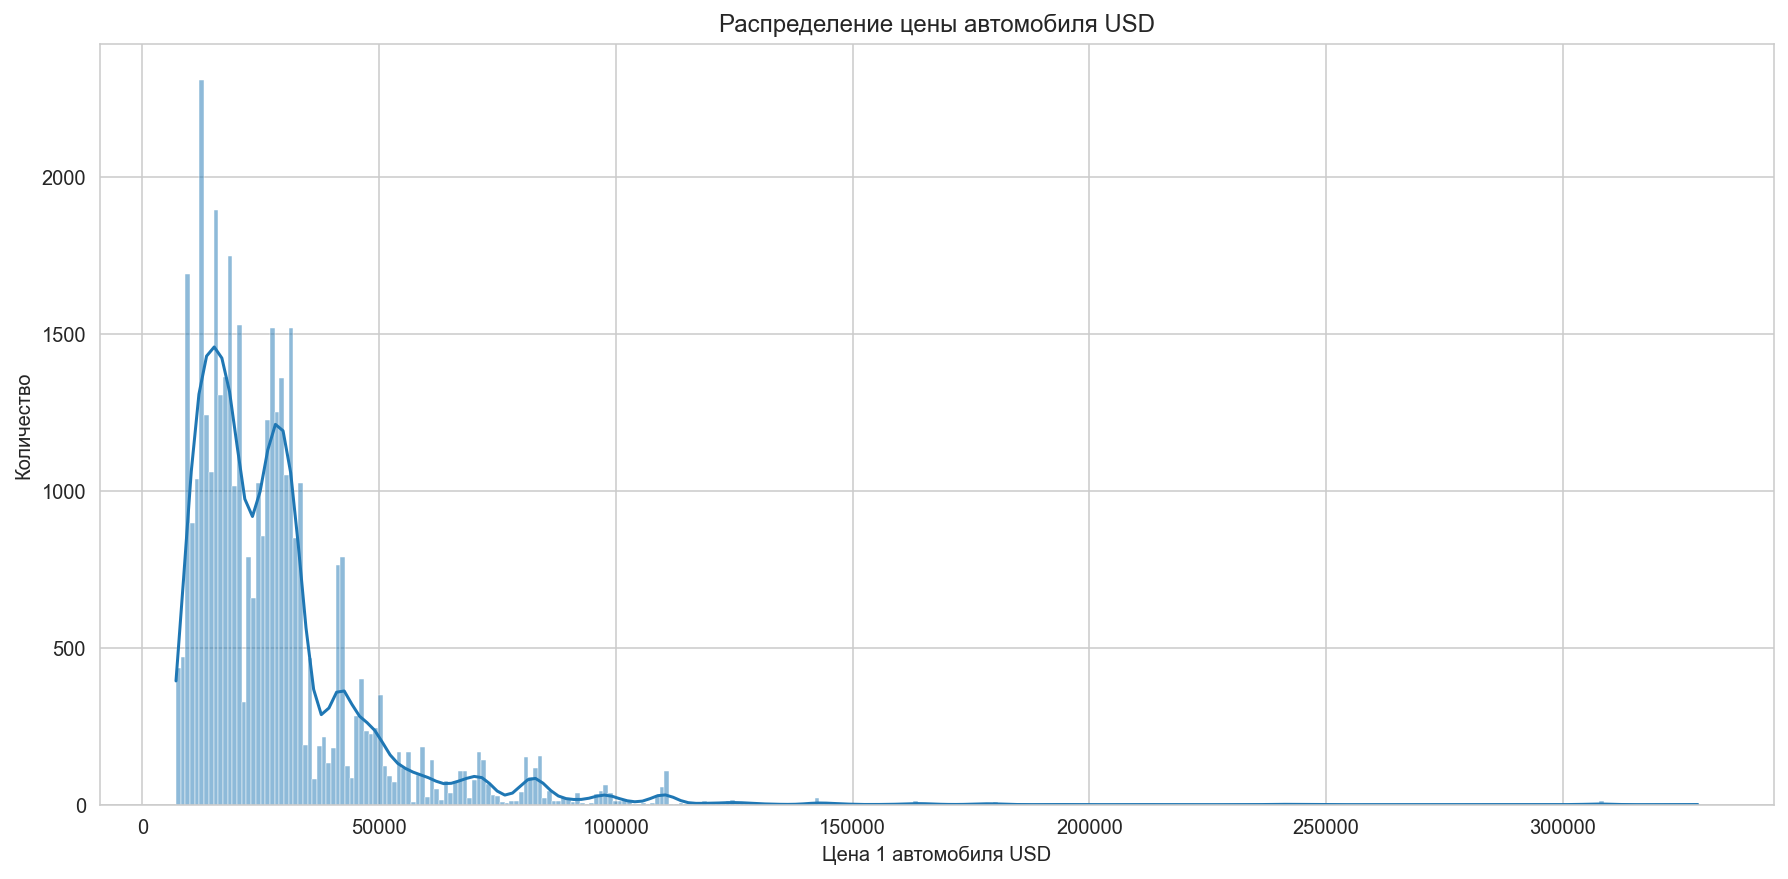

In [82]:
# распределение
plt.figure(figsize=(15, 7))
sns.histplot(x=df2['price_usd'],
             stat='count',
             kde=True
            )
plt.title('Распределение цены автомобиля USD')
plt.xlabel('Цена 1 автомобиля USD')
plt.ylabel('Количество')
plt.show()

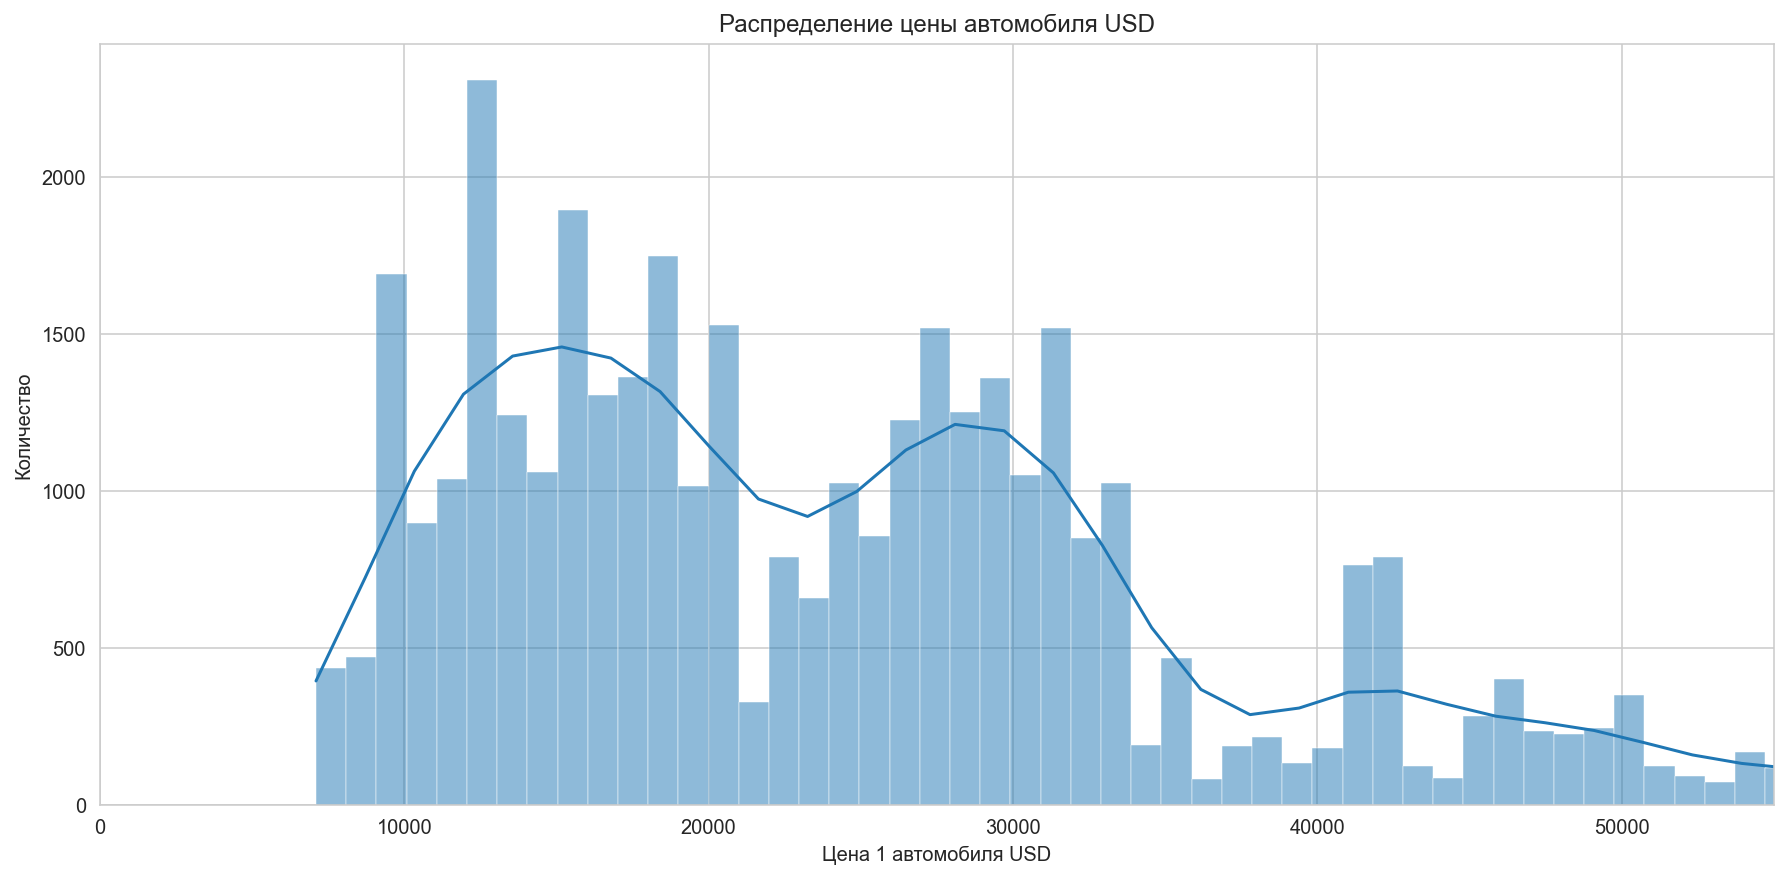

In [83]:
# распределение ограничим
plt.figure(figsize=(15, 7))
sns.histplot(x=df2['price_usd'],
             stat='count',
             kde=True
            )
plt.xlim(0, 55000)
plt.title('Распределение цены автомобиля USD')
plt.xlabel('Цена 1 автомобиля USD')
plt.ylabel('Количество')
plt.show()

In [84]:
print(f'''
    Минимум: {df2['price_usd'].min()},
    Среднее: {df2['price_usd'].mean():.2f},
    Медиана: {df2['price_usd'].median():.2f}
    Максимум: {df2['price_usd'].max()}''')


    Минимум: 7100.0,
    Среднее: 28251.55,
    Медиана: 24282.27
    Максимум: 328510.9706


In [85]:
# посмотрим на самые дорогие авто
df2.query('price_usd > 300000').groupby(['brand', 'class_2013'])['quantity'].sum().to_frame().reset_index()

brand        class_2013  quantity
0                 ANKAI  Большие автобусы        10
1  Mercedes-Benz Trucks  Большие автобусы         3

* Распределение цены автомобиля USD похоже на затухающий синус, имеет 2 пика ~16тыс. и 28тыс. и хвост.
* Самые дорогие авто это большие автобусы ANKAI, Mercedes-Benz Trucks.

### 3.13 Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть) - 'sell_price_usd'

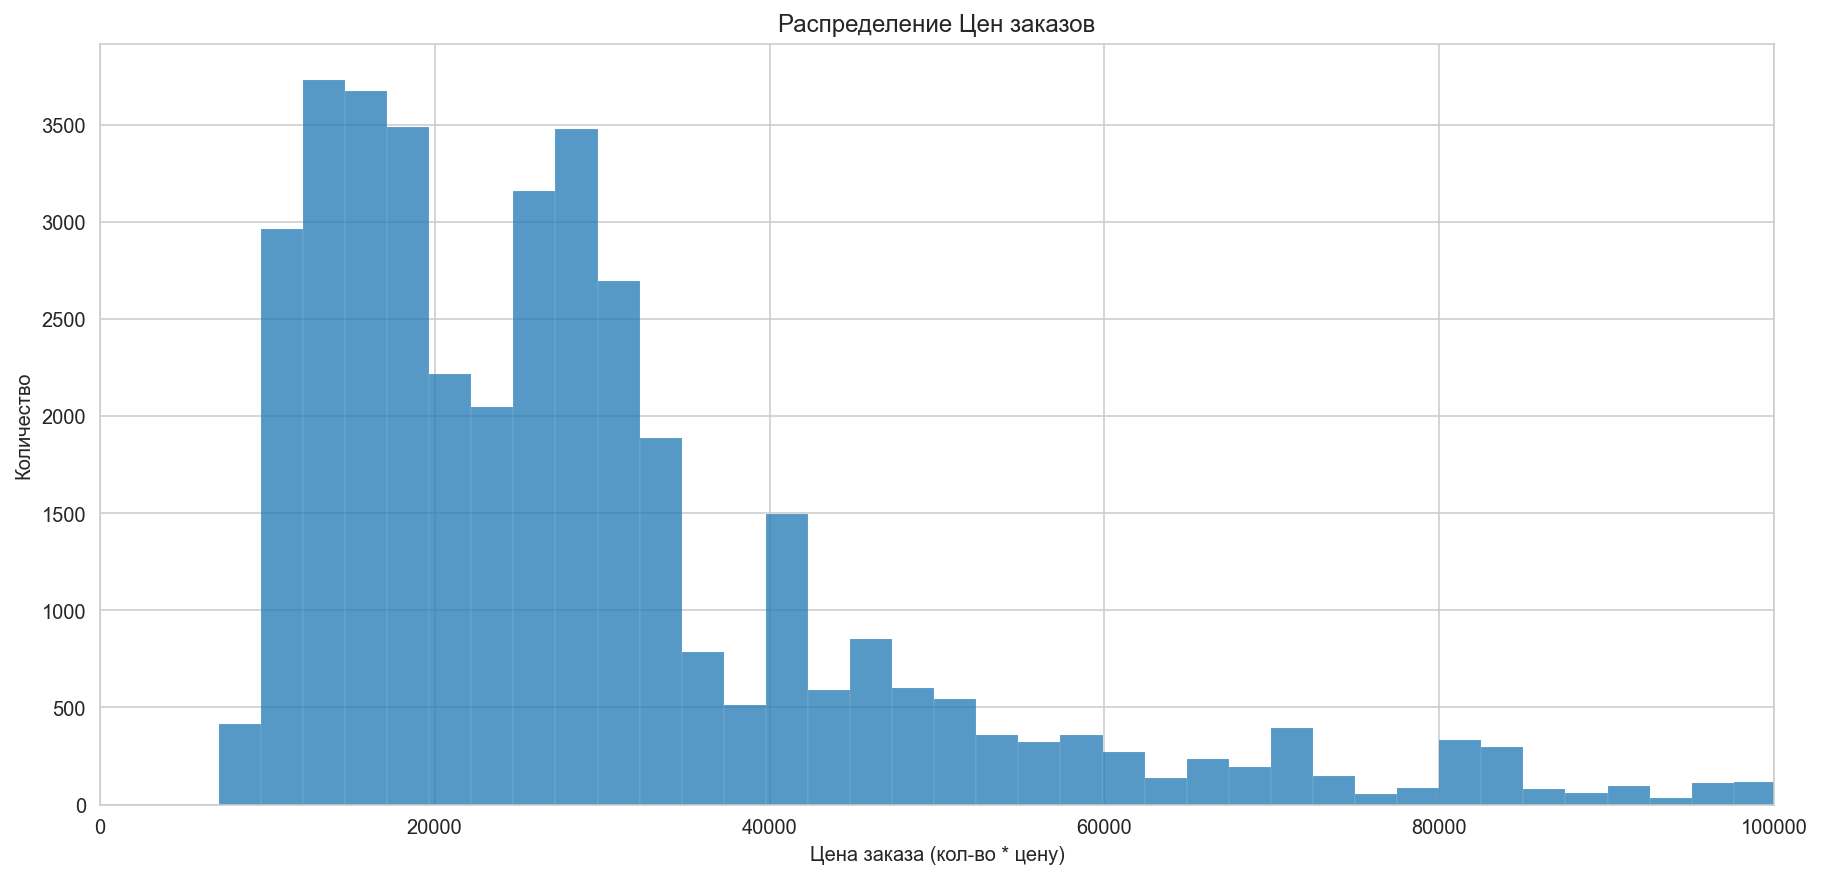

In [86]:
# распределение
plt.figure(figsize=(15, 7))
sns.histplot(x=df2['sell_price_usd'],
             stat='count',
             #kde=True,
             bins=1500
            )
plt.xlim(0, 100000)
plt.title('Распределение Цен заказов')
plt.xlabel('Цена заказа (кол-во * цену)')
plt.ylabel('Количество')
plt.show()

Распределение Цен заказов похоже на распределение цены 1 автомобиля, есть пики ~16тыс. и 28тыс. и хвост.

### 3.14 Сегментация 2013 – сегмент автомобиля актуальный - segment_2013'

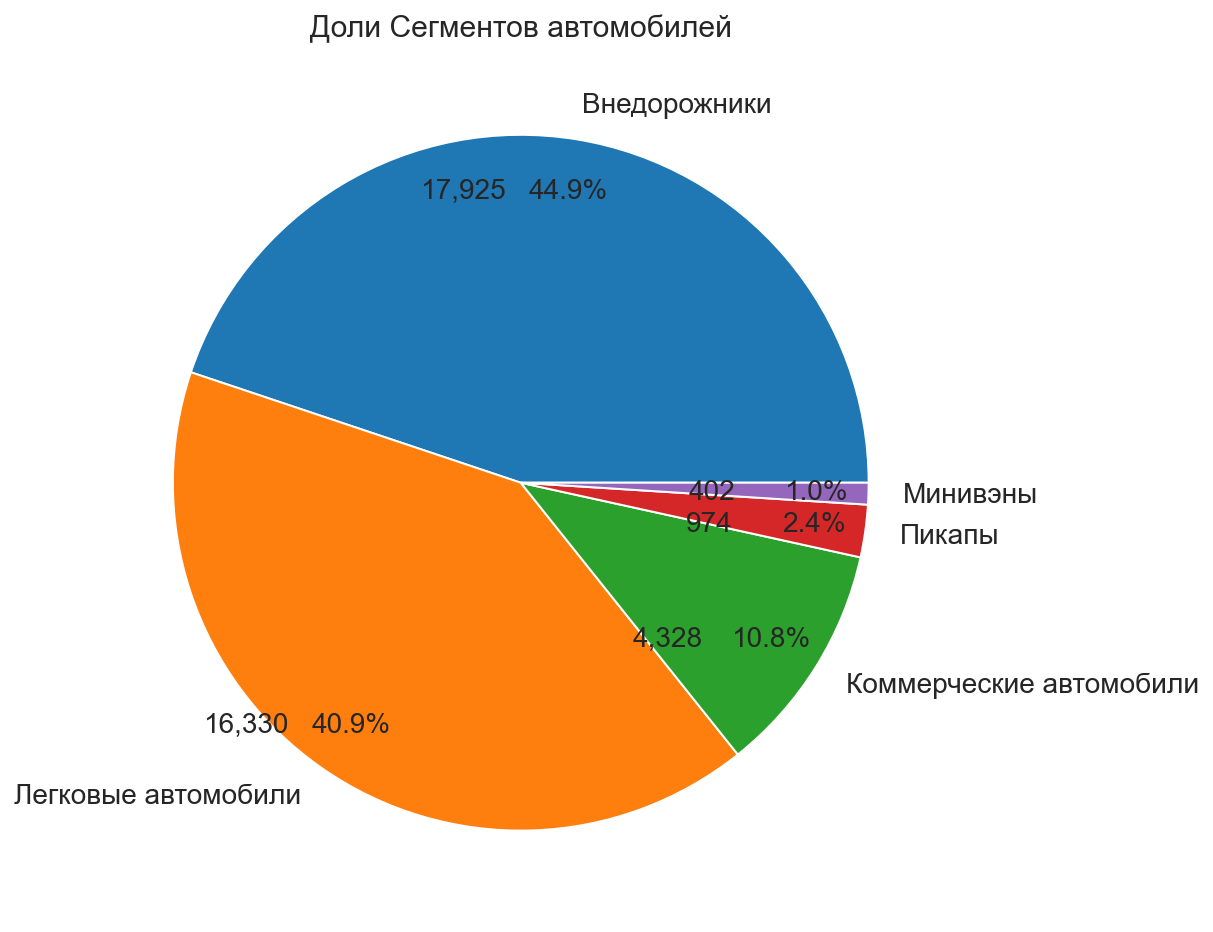

In [87]:
pie_plot(df2['segment_2013'],
         'Доли Сегментов автомобилей',
         text_num = 2
        )

* В топе Сегментов автомобилей: Внедорожники 18тыс, Легковые авто 16тыс., Коммерческие авто 4тыс.

### 3.15 Класс 2013 – класс автомобиля актуальный - 'class_2013'

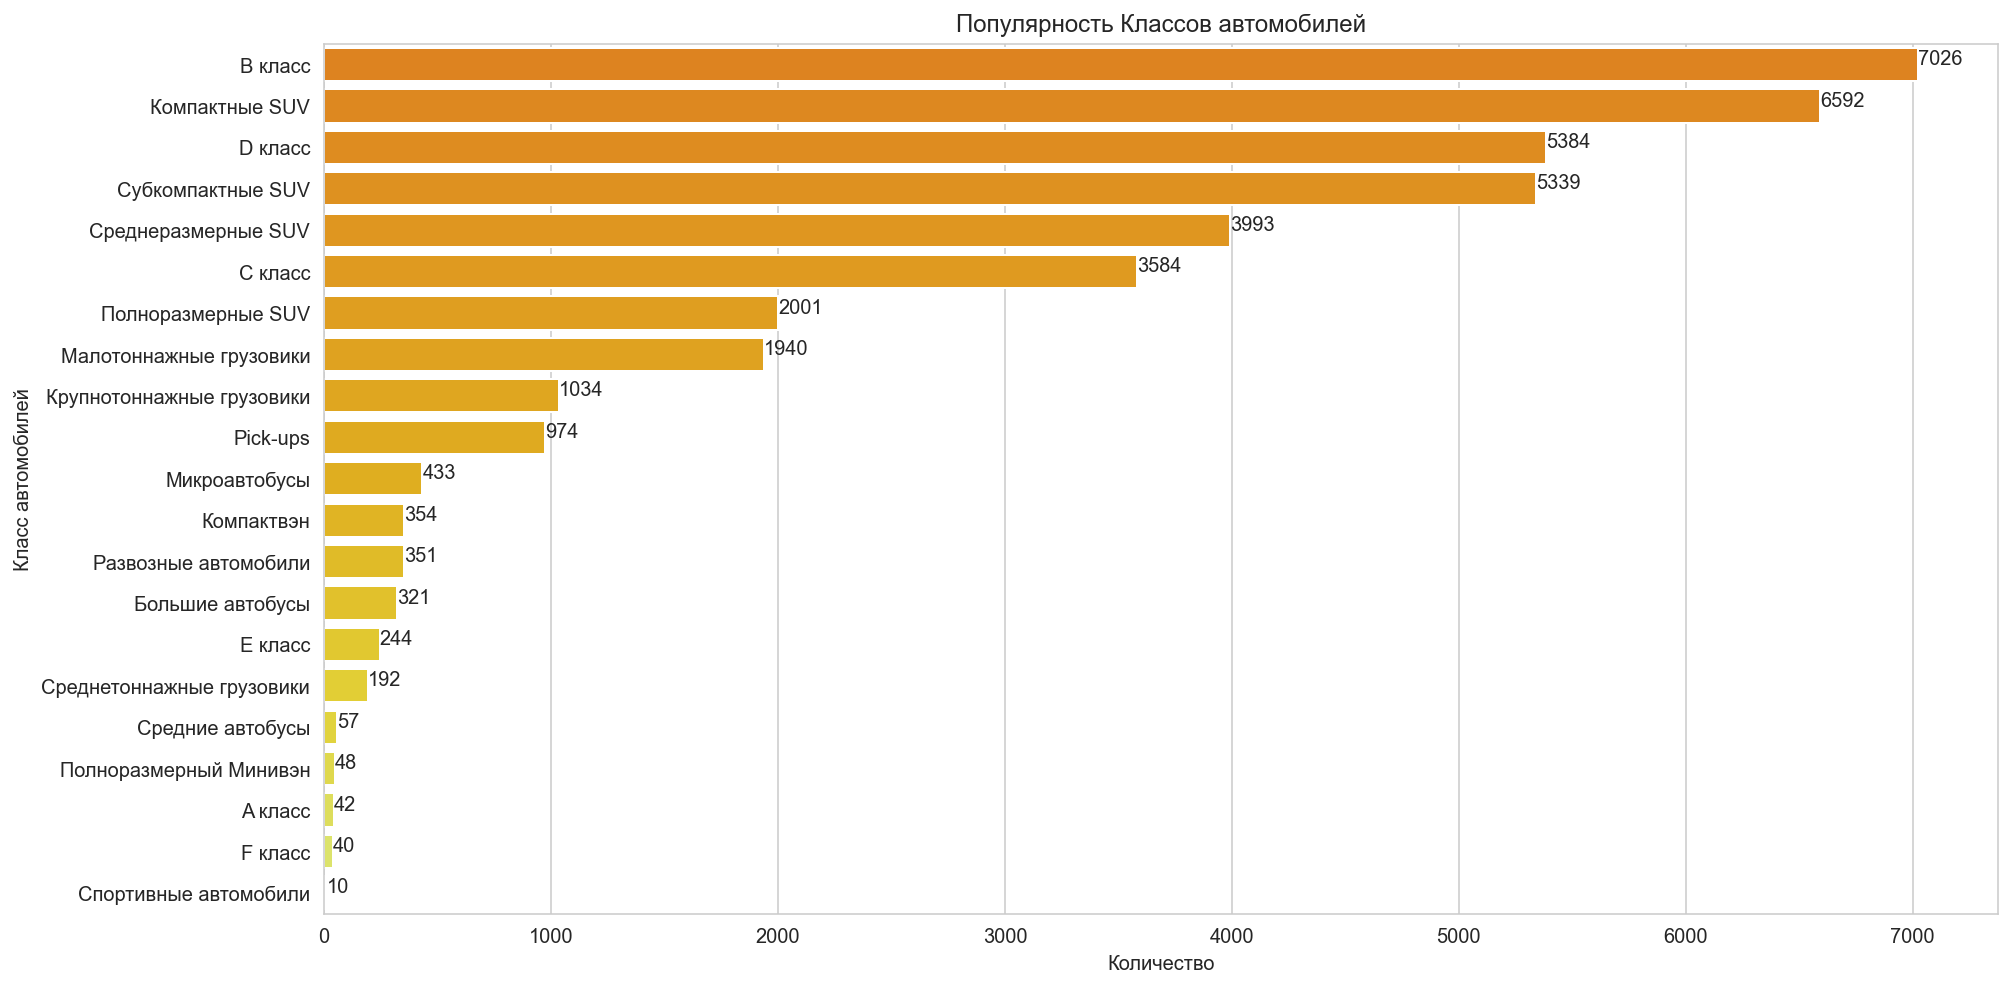

In [88]:
count_plot(df2['class_2013'],
           'Популярность Классов автомобилей',
           'Класс автомобилей',
           figsize=(15, 8),
           top_n=30
          )

* В топе по продажам классы: B класс 7тыс, Компактные SUV 6.5тыс, D класс и Субкомпактные SUV по 5.3тыс.

### 3.16 Дата продажи sale_date

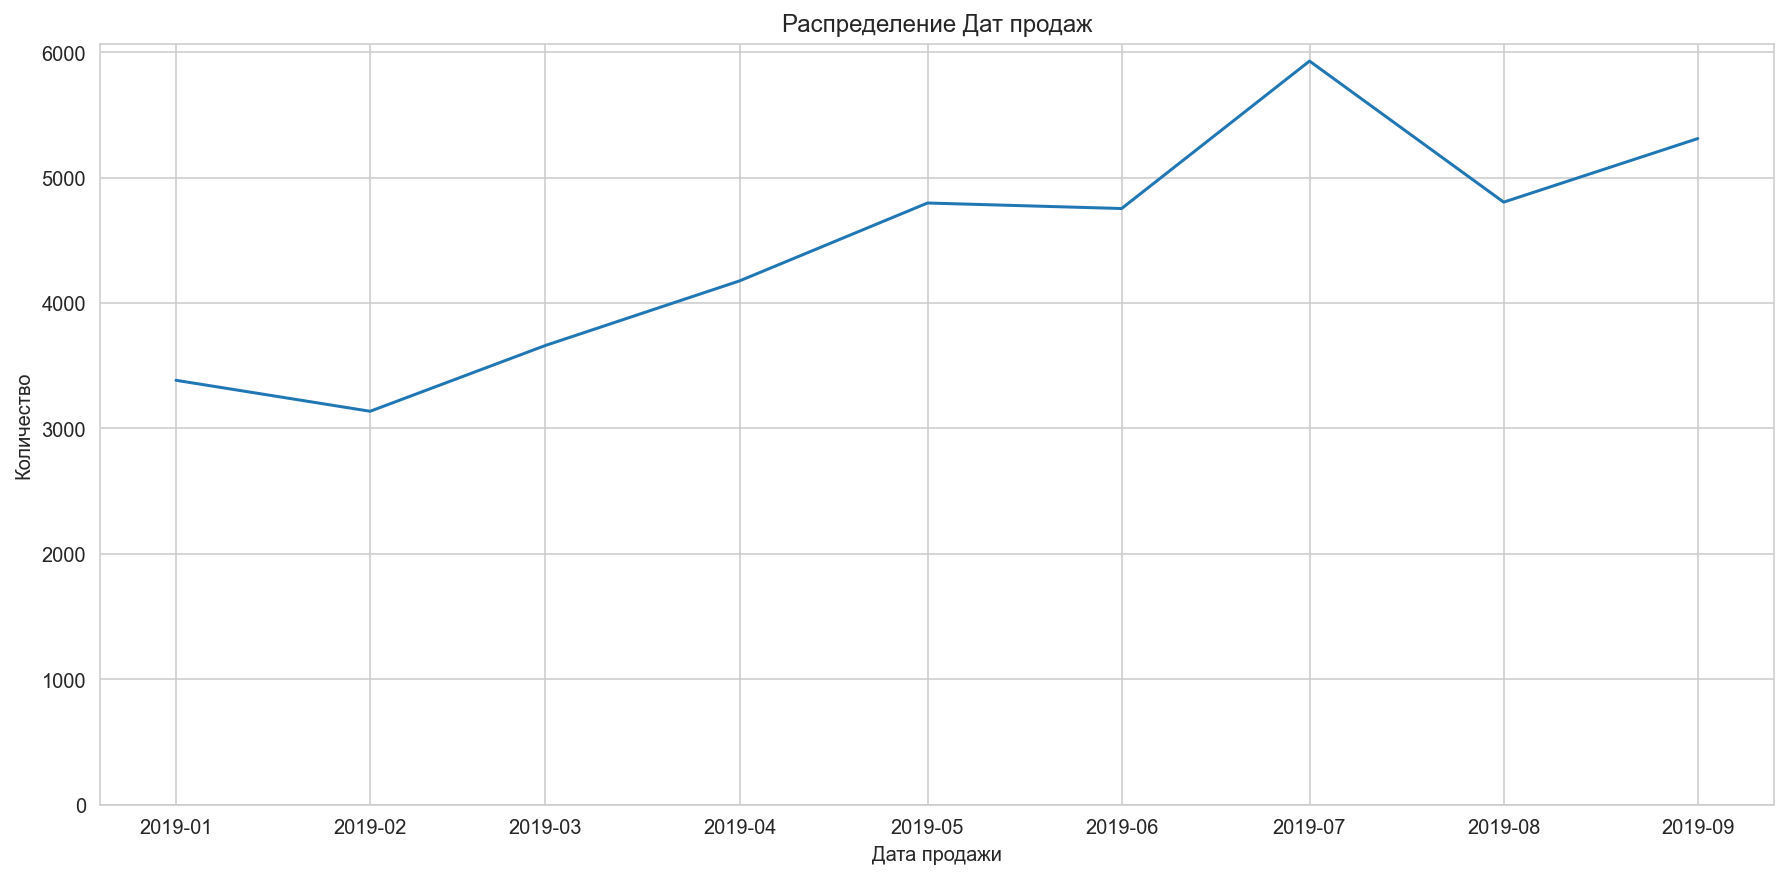

In [89]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=df2['sale_date'].value_counts().sort_index().index,
             y=df2['sale_date'].value_counts().sort_index().values
            )
plt.title('Распределение Дат продаж')
plt.xlabel('Дата продажи')
plt.ylabel('Количество')
plt.ylim(0)
plt.show()

* У нас в датасете продажи с 1-9 месяц 2019 года, пик по количеству заказов: июль, сентрябрь.

### 3.17 Выводы EDA

* Есть Высокая корелляция Цена 1 авто - Объём двигателя л.
* Количество уникальных компаний(название автоцентра): 33. Количество уникальных Брендов (название продаваемой марки автомобиля): 46
* Всего автоцентров 33шт., из них моно-брендовых 18шт., мульти-брендовых 15шт. Основная масса автоцентров моно-брендовые. Максимальное кол-во брендов 7шт. у Allur Auto.
* Количество уникальных моделей в датасете: 273
* Обычно у бренда 5 моделей. Больше всего моделей у бренда KAMAZ-24шт. с отрывом почти в 2 раза, затем идут BMW-14, Mercedes-Benz-14, Volkswagen-13. Количество уникальных моделей в датасете за 2019 год: 273.
* Топ-3 стран-производителей авто: Казахстан -19,4тыс., РФ-12,8тыс., Япония-4,6тыс.
* Бензин популярнее в 20 раз всех видов топлива вместе взятых 35тыс. Дизель на втором месте 1,8тыс. Есть достаточное кол-во пропусков 3тыс., возможно часть из них на электричестве или гибриде, но на известных данных их мизерно мало.
* Основная масса значений(50%) объемов двигателя лежит в диапазоне от 1.6 до 2.5л. Подавляющее большинство 1.6:2л -18тыс, дальше идут 2:2,5л -6тыс, 2,5:3-5.5тыс. Авто с объемом > 10л можно по пальцам пересчитать -46шт. это в основном это большой автобус или грузовик.(как мы выясняли из предобработки).
* Среди новых авто доминирует тип коробки - Автоматическая в 3раза над механической.
* Лидеры по продажам авто регионам города: г.Алматы 11тыс, г.Нур-Султан -8тыс., остальные менее 3тыс.
* Подавляющее большинство машин по Году производства это конечно 2019, и 1/4 2018 остатки видимо.
* Топ по типам привода: Полный привод (4WD) -40%, 2WD(задний или передний) - 26%, остальная часть неизвестна, очень мало заднего привода.
* Подавляющее большинство в заказе кол-во авто -1шт, среднее 1.35шт. Компании у которых есть очень крупные заказы от 50шт машин: 'Allur Auto', 'БИПЭК АВТО', 'Volkswagen Group Rus'
* Распределение цены автомобиля USD похоже на затухающий синус, имеет 2 пика ~16тыс. и 28тыс. и хвост. Распределение Цен заказов похоже на распределение цены 1 автомобиля.
* Самые дорогие авто это большие автобусы ANKAI, Mercedes-Benz Trucks.
* В топе Сегментов автомобилей: Внедорожники 18тыс, Легковые авто 16тыс., Коммерческие авто 4тыс.
* В топе по продажам классы: B класс 7тыс, Компактные SUV 6.5тыс, D класс и Субкомпактные SUV по 5.3тыс.
* У нас в датасете продажи с 1-9 месяц 2019 года, пик по количеству заказов: июль, сентрябрь.

## **4. Анализ рынка автомобилей Казахстана (коммерческий и некоммерческий транспорт)**

In [90]:
# уникальные сегменты автомобилей
df2['segment_2013'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [91]:
# разделим датасет на 2: Коммерческий и некоммерческий транспорт
com = df2.query('segment_2013 == "Коммерческие автомобили"')
noncom = df2.query('segment_2013 != "Коммерческие автомобили"')

In [92]:
# и добавим в исходный дф флаги Коммерческий Некоммерческий
df2['com_noncom'] = df2['segment_2013'].apply(lambda x: "Коммерческие автомобили" if x == "Коммерческие автомобили" else "Некоммерческие автомобили")

### 4.1 Емкость рынка автомобилей: в денежном и количественном выражении;

In [93]:
# по оценкам 4ый квартал(10-12мес) очень прибыльный и составляют ~30-40% всех продаж года,
# это в 0,4 отличается от суммы 1-9мес давайте придерживаться этого числа
k = round(100 / 75, 2)
print(k)
print(f'''Емкость рынка авто за 9мес: {df2.shape[0]} заказов и {df2.quantity.sum()} автомобилей.
Прогнозная емкость рынка авто за 2019год: {int(df2.shape[0] * k)} заказов и {df2.quantity.sum() * k :_.0f} автомобилей.
Средняя стоимость прожажи - {df2.sell_price_usd.sum() / len(df2):.2f} USD за 1 автомобиль.

Емкость рынка Коммерческих авто за 9мес: {com.shape[0]} заказов, {com.quantity.sum()} автомобилей, {com.sell_price_usd.sum():_.0f} USD.
Емкость рынка Некоммерческих авто за 9мес: {noncom.shape[0]} заказов, {noncom.quantity.sum()} автомобилей, {noncom.sell_price_usd.sum():_.0f} USD.
'''.replace('_',' '))

1.33
Емкость рынка авто за 9мес: 39959 заказов и 53875 автомобилей.
Прогнозная емкость рынка авто за 2019год: 53145 заказов и 71 654 автомобилей.
Средняя стоимость прожажи - 33764.47 USD за 1 автомобиль.

Емкость рынка Коммерческих авто за 9мес: 4328 заказов, 5246 автомобилей, 185 811 934 USD.
Емкость рынка Некоммерческих авто за 9мес: 35631 заказов, 48629 автомобилей, 1 163 382 622 USD.



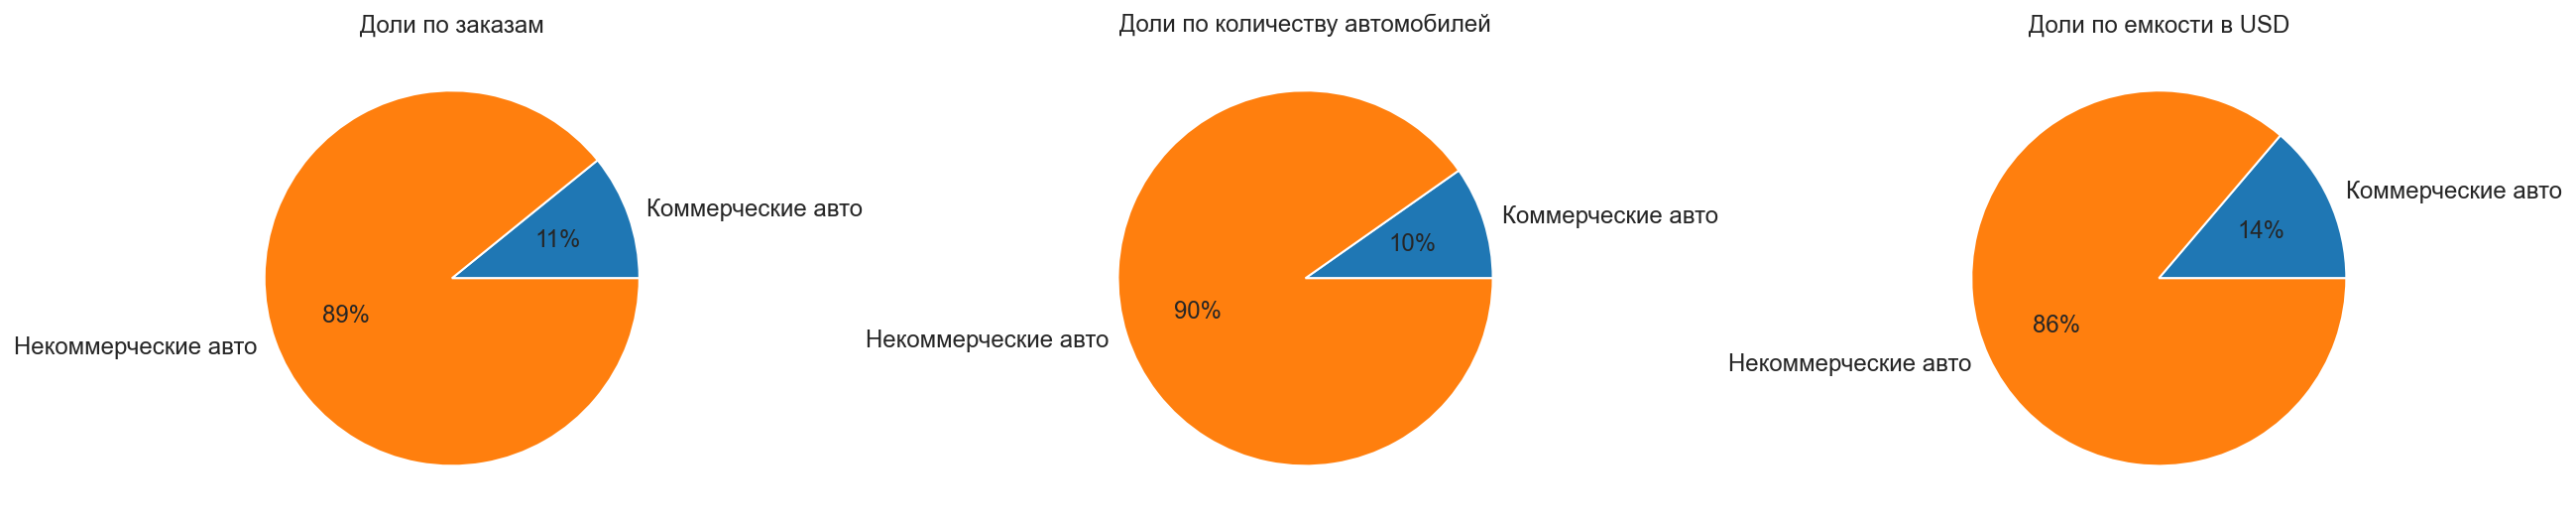

In [94]:
plt.figure(figsize=(18,6))

order = [com.shape[0], noncom.shape[0]]
labels = ['Коммерческие авто', 'Некоммерческие авто']
plt.subplot(1, 3, 1)
plt.pie(order, labels = labels, autopct='%.0f%%', textprops={'fontsize': 12})
plt.title('Доли по заказам')

qtt = [com.quantity.sum(), noncom.quantity.sum()]
labels = ['Коммерческие авто', 'Некоммерческие авто']
plt.subplot(1, 3, 2)
plt.pie(qtt, labels = labels, autopct='%.0f%%', textprops={'fontsize': 12})
plt.title('Доли по количеству автомобилей')

capacity = [com.sell_price_usd.sum(), noncom.sell_price_usd.sum()]
labels = ['Коммерческие авто', 'Некоммерческие авто']
plt.subplot(1, 3, 3)
plt.pie(capacity, labels = labels, autopct='%.0f%%', textprops={'fontsize': 12})
plt.title('Доли по емкости в USD')

plt.tight_layout()
plt.show()

* Емкость рынка авто в Казахстане за 9мес: 39959 заказов и 53 875 автомобилей.
* Прогнозная емкость рынка авто за 2019год: 55942 заказов и 75 425 автомобилей.
* Средняя стоимость прожажи - 33764 USD за 1 автомобиль.
* Емкость рынка Коммерческих авто за 9мес: 4328 заказов, 5246 автомобилей, 185 811 934 USD.
* Емкость рынка Некоммерческих авто за 9мес: 35631 заказов, 48629 автомобилей, 1 163 382 622 USD.
* Коммерческих автомобилей заказывают меньше их доля по заказам 11%, по количеству их еще немногим  меньше 10%, но по стоимости их 14%. (оно и понятно, автобус или грузовая машина дороже любого среднего авто).

### 4.2 Марки лидеры на рынке автомобилей;

In [95]:
# подготовим датасет для пайчарта, коммерческие
pie_com =(com.groupby('brand')['sell_price_usd'].sum()
          .sort_values(ascending=False)
          .reset_index()
          #.nlargest(10, 'sell_price_usd')
         )
# оставим топ 3 так как он большой, остальное уберем в категорию 'Other'
pie_com_top = pie_com[:3]
pie_com_top = pie_com_top.append({'brand':'Other',
                                  'sell_price_usd': pie_com.iloc[3:]['sell_price_usd'].sum()},
                                  ignore_index=True)
sizes_com = pie_com_top['sell_price_usd'].tolist()
labels_com = pie_com_top['brand'].tolist()

# подготовим датасет для пайчарта, Некоммерческие
pie_noncom =(noncom.groupby('brand')['sell_price_usd'].sum()
          .sort_values(ascending=False)
          .reset_index()
          #.nlargest(10, 'sell_price_usd')
         )
# оставим топ 3 так как он большой, остальное уберем в категорию 'Other'
pie_noncom_top = pie_noncom[:3]
pie_noncom_top = pie_noncom_top.append({'brand':'Other',
                                        'sell_price_usd': pie_noncom.iloc[3:]['sell_price_usd'].sum()},
                                        ignore_index=True)

sizes_noncom = pie_noncom_top['sell_price_usd'].tolist()
labels_noncom = pie_noncom_top['brand'].tolist()

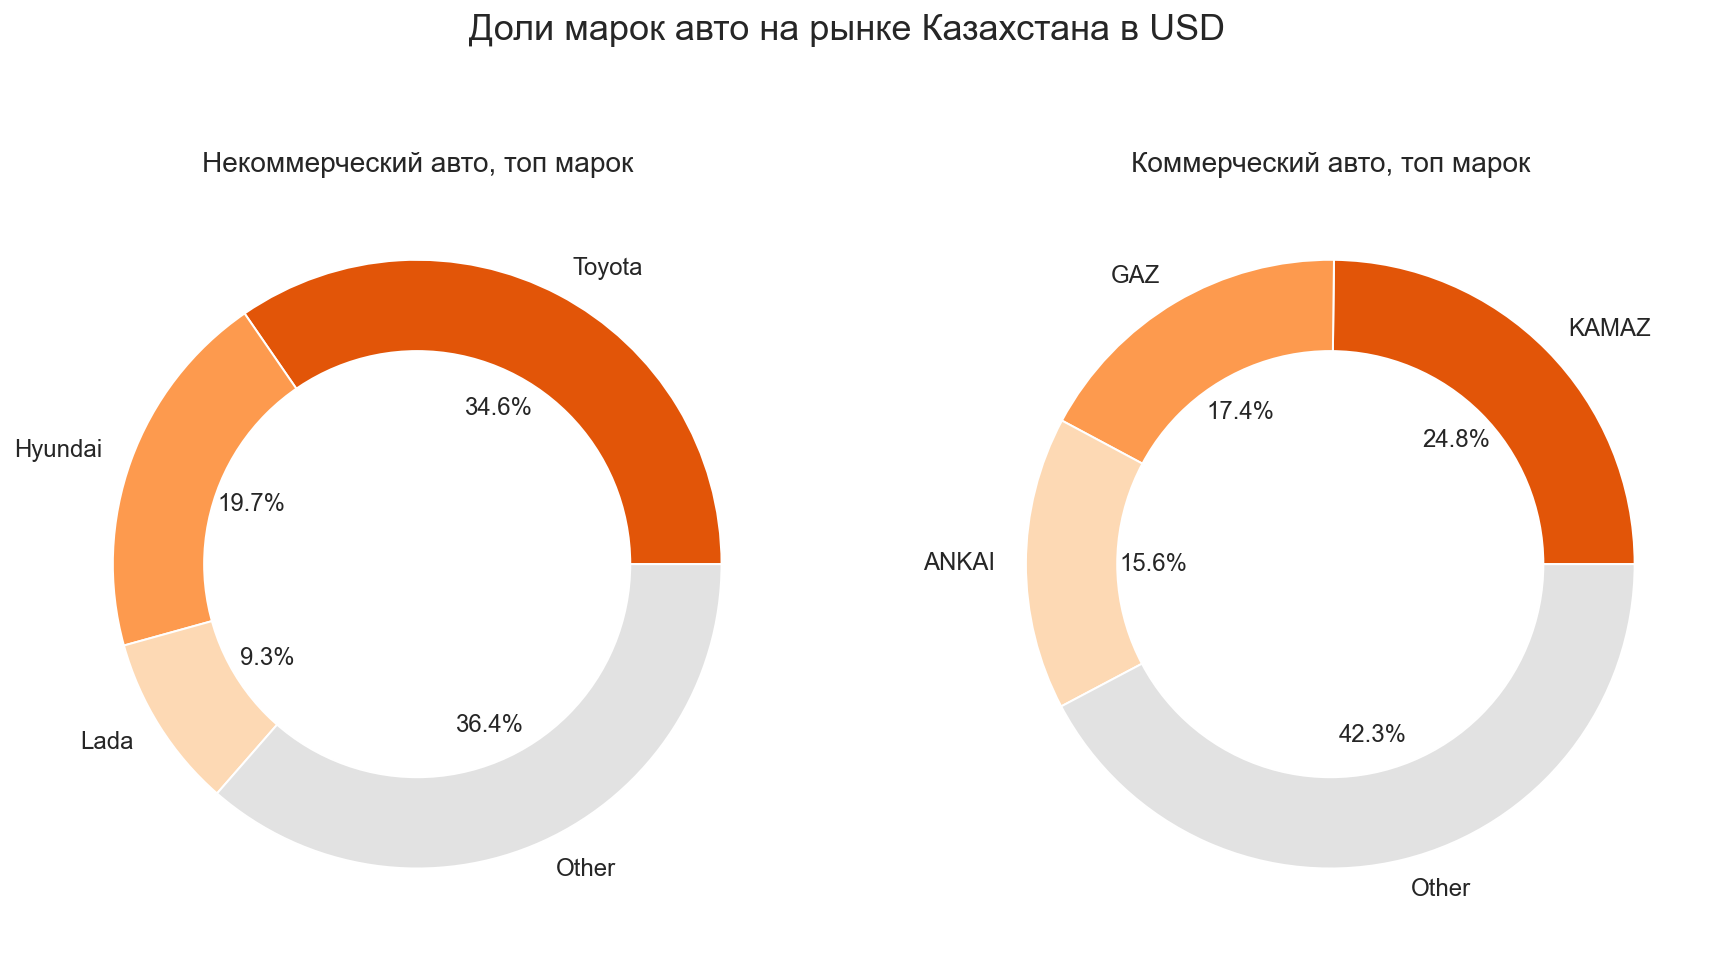

In [96]:
# сгенерируем цвета
# RdYlGn_r Greens_r  YlGn_r summer tab20c
# сгенерим цвета для топ 3
colors1 = plt.cm.Oranges_r(np.linspace(0.3, 0.8, 3)) # (0.3, 0.8, 3) старт, конец, кол-во значений
# сгенерим цвета для остальных
colors2 = plt.cm.Greys(np.linspace(0.2, 0.8, len(pie_com_top)-3))
# объединим 2 массива чисел
colors = np.concatenate((colors1, colors2))

plt.figure(figsize=(15,8))
plt.suptitle('Доли марок авто на рынке Казахстана в USD', fontsize=18)

plt.subplot(1, 2, 1)
plt.title('Некоммерческий авто, топ марок', fontdict={'size':14})
plt.pie(sizes_noncom, labels = labels_noncom, autopct='%1.1f%%', pctdistance=0.58, textprops={'fontsize': 12}, colors=colors)
# белый круг в центре
w_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(w_circle)

plt.subplot(1, 2, 2)
plt.title('Коммерческий авто, топ марок', fontdict={'size':14})
plt.pie(sizes_com, labels = labels_com, autopct='%1.1f%%', pctdistance=0.58, textprops={'fontsize': 12}, colors=colors)
# белый круг в центре
w_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(w_circle)

plt.show()

* Некоммерческие авто, топ марок: Toyota 35%, Hyndai 20%, Lada 9%. Японские марки занимают ~48% рынка.
* Коммерческие авто, топ марок: KAMAZ 25%, GAZ 17%, ANKAI 16%. Российские марки занимают ~50% рынка (KAMAZ, GAZ, UAZ).

### 4.3 Динамика рынка продаж: общая, по сегментам;

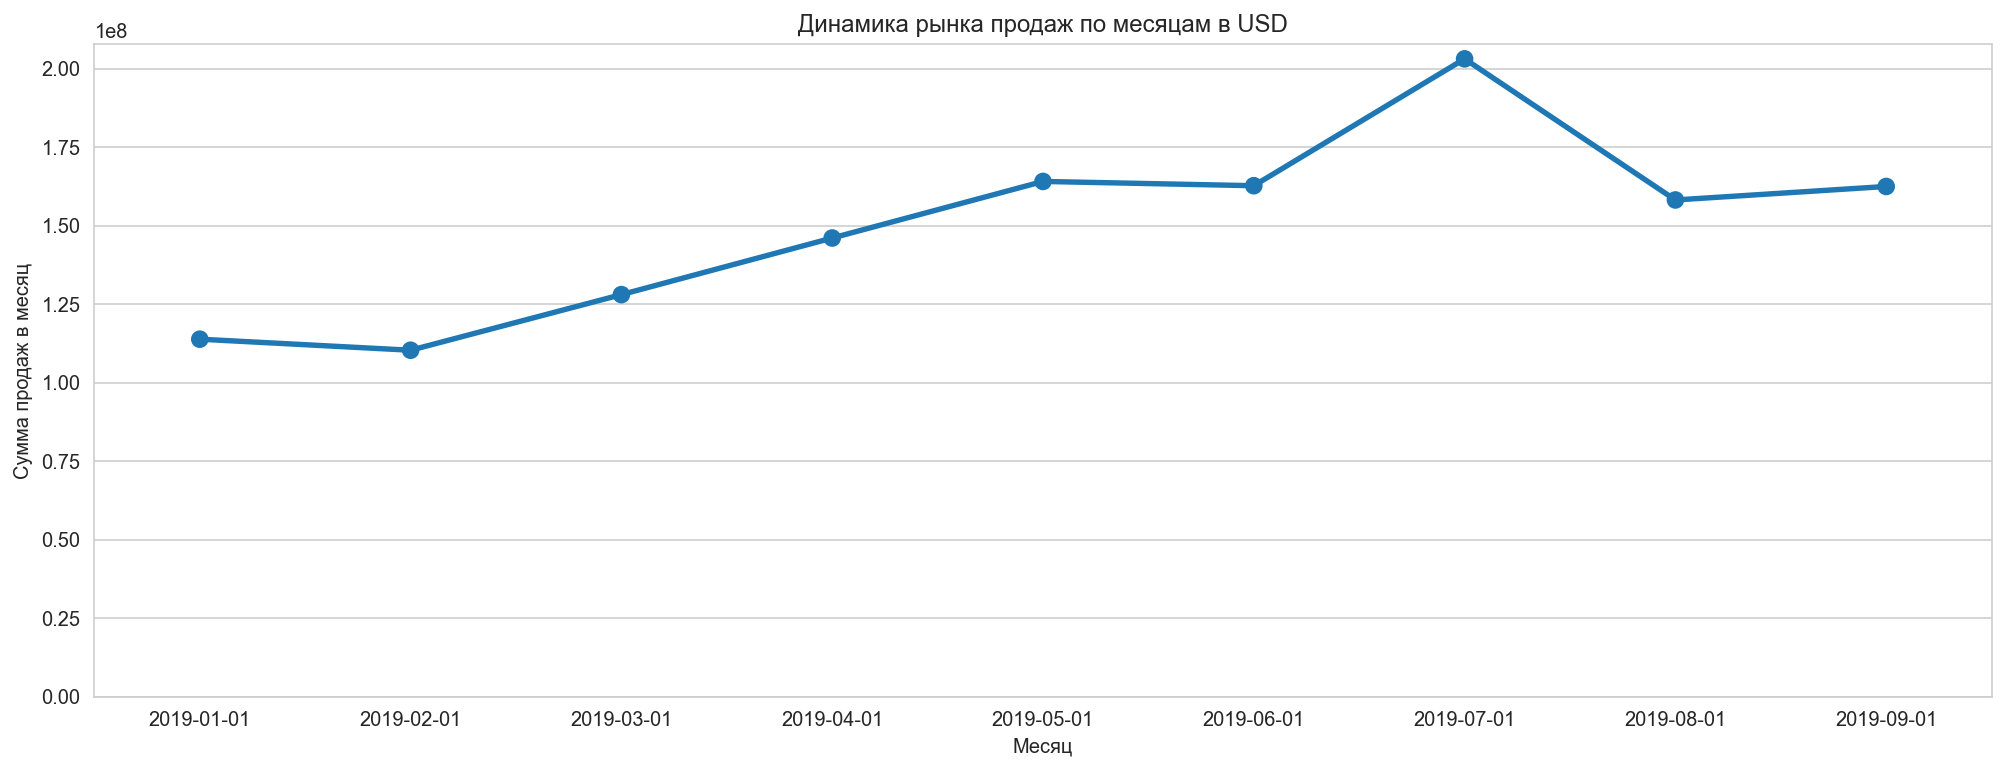

In [97]:
sales_month = df2.groupby('sale_date')['sell_price_usd'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.pointplot(x=sales_month['sale_date'],
             y=sales_month['sell_price_usd']
            )
plt.title('Динамика рынка продаж по месяцам в USD')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.ylim(0)
plt.show()

* В январе и феврале почти нет продаж, и затем планомерно растут продажи и пик достигается в июле.

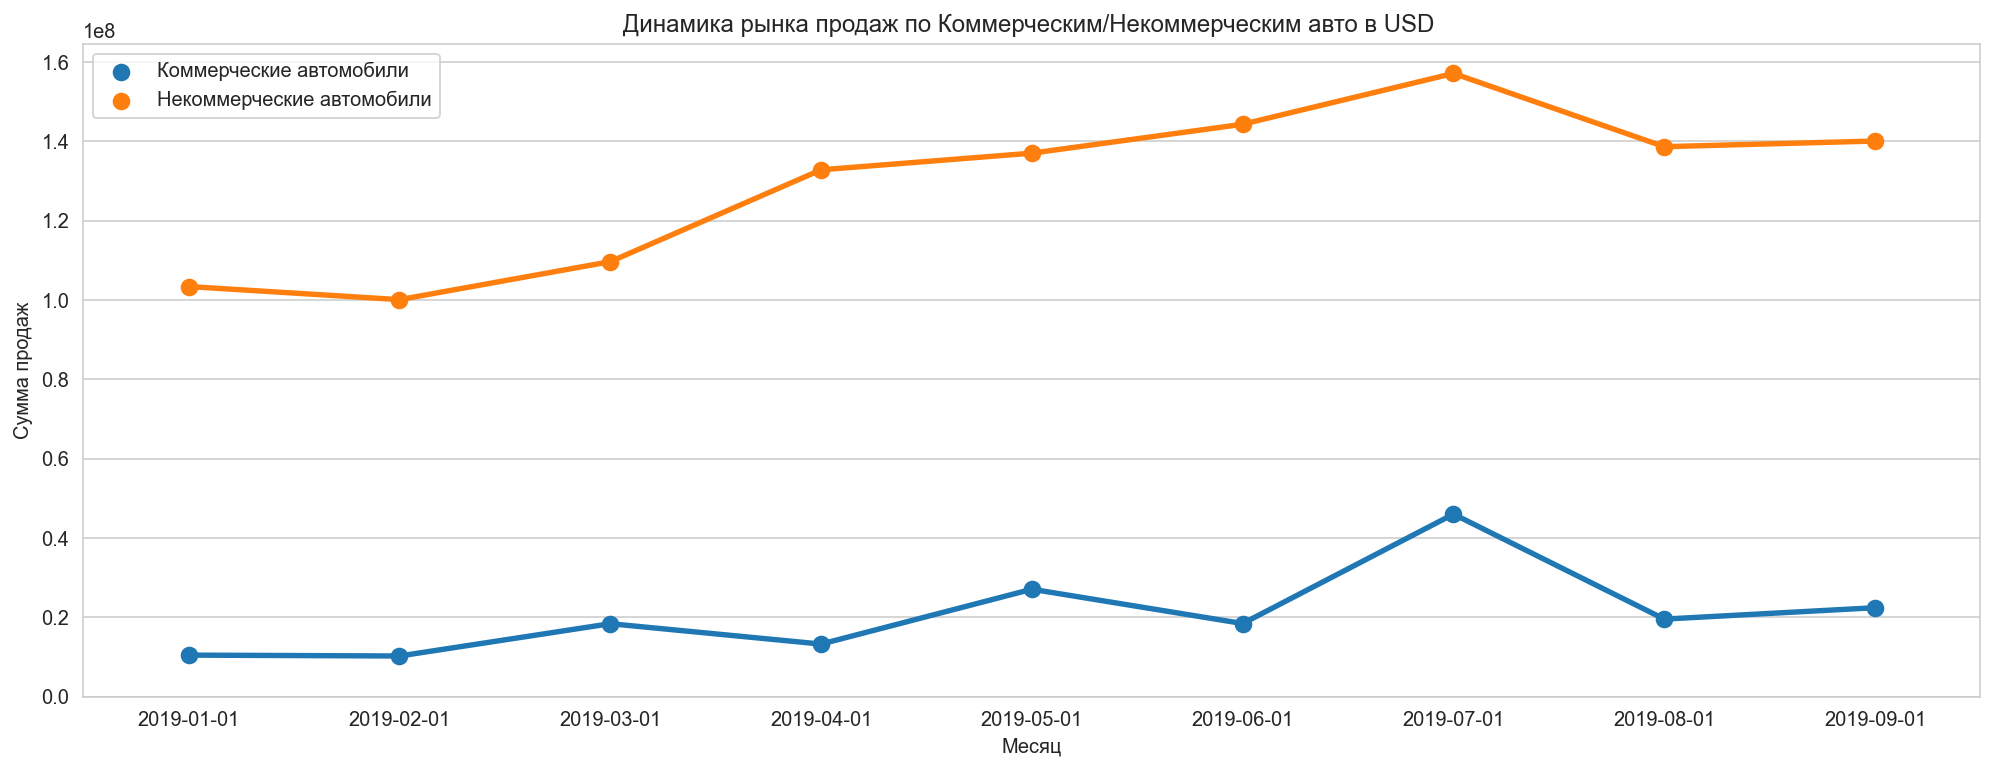

In [98]:
# сгруппируем по месяцу и ком/некоммерческим авто
sales_month2 = (df2.groupby(['com_noncom', 'sale_date'], as_index=False)
                .agg(sell_price_usd_sum=('sell_price_usd', 'sum')))

plt.figure(figsize=(17, 6))
sns.pointplot(x=sales_month2['sale_date'],
             y=sales_month2['sell_price_usd_sum'],
             hue=sales_month2['com_noncom']
            )
plt.title('Динамика рынка продаж по Коммерческим/Некоммерческим авто в USD ')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
# # Закрепление легенды слева сверху
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.ylim(0)
plt.show()

* Основную долю продаж составляют некоммерческие авто, продажи идут примерно синхронно с пиком в июле причем пик и у коммерческих и у некоммерческих складывается.

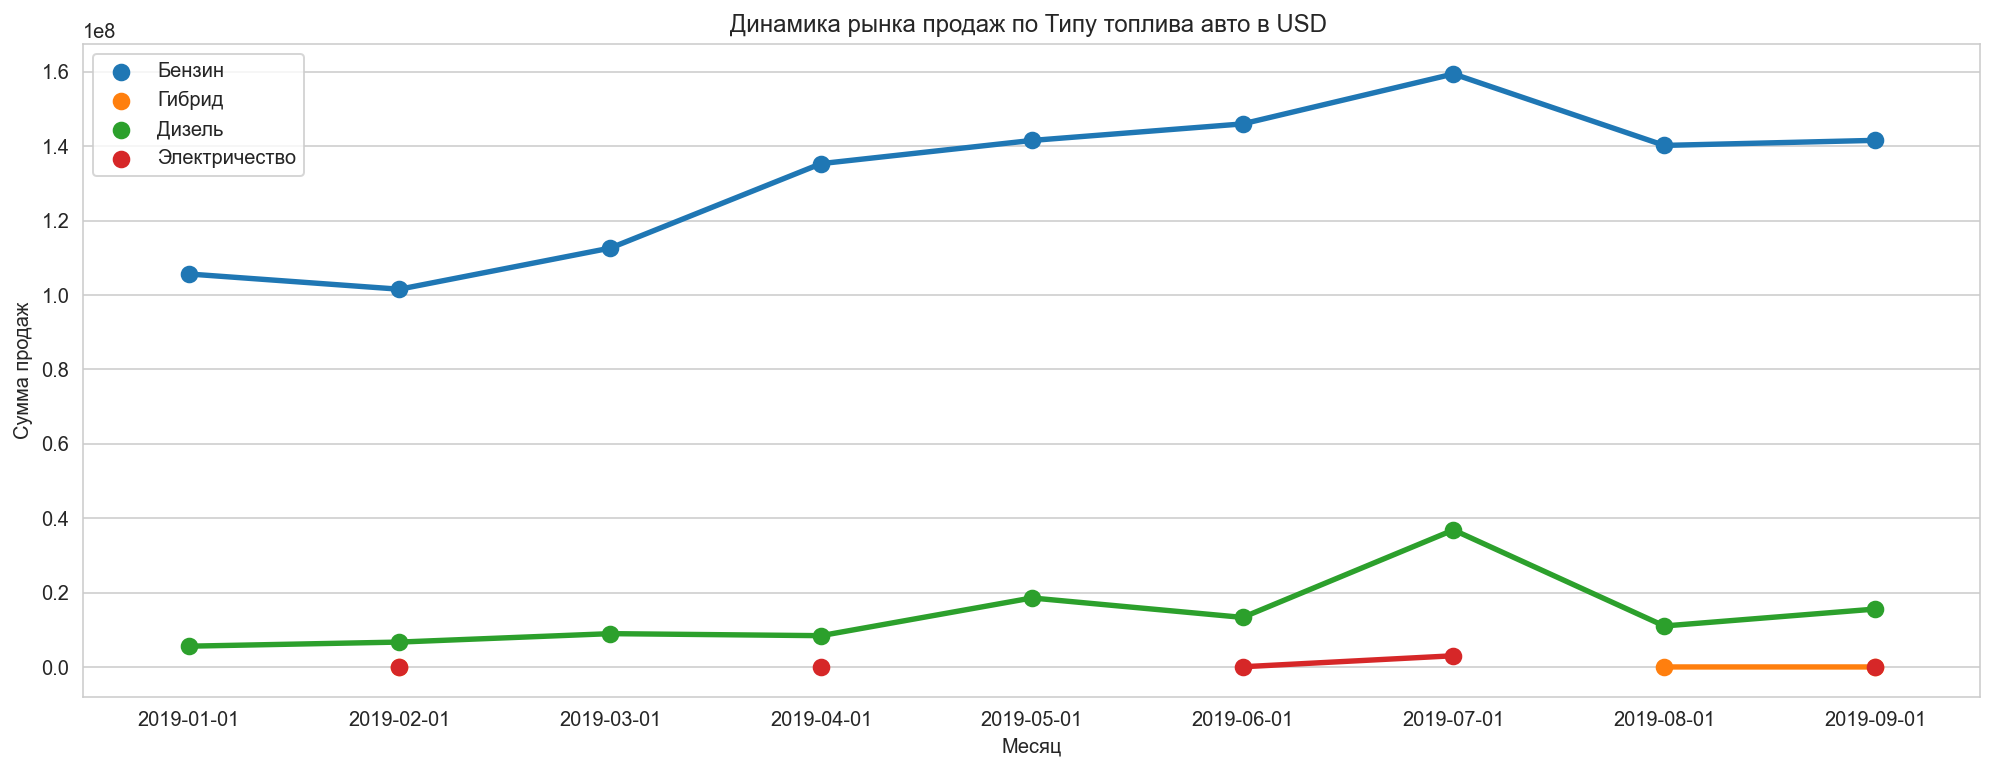

In [99]:
# по типу топлива
sales_month3 = (df2.groupby(['fuel_type', 'sale_date'], as_index=False)
                .agg(sell_price_usd_sum=('sell_price_usd', 'sum')))

plt.figure(figsize=(17, 6))
sns.pointplot(data=sales_month3,
             x='sale_date',
             y='sell_price_usd_sum',
             hue='fuel_type'
            )
plt.title('Динамика рынка продаж по Типу топлива авто в USD ')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
# # Закрепление легенды слева сверху
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.show()

* По типу топлива конечно лидер Бензин, в июле есть пик у Дизеля -это из за Коммерческого транспорта (автобусы, грузовики).

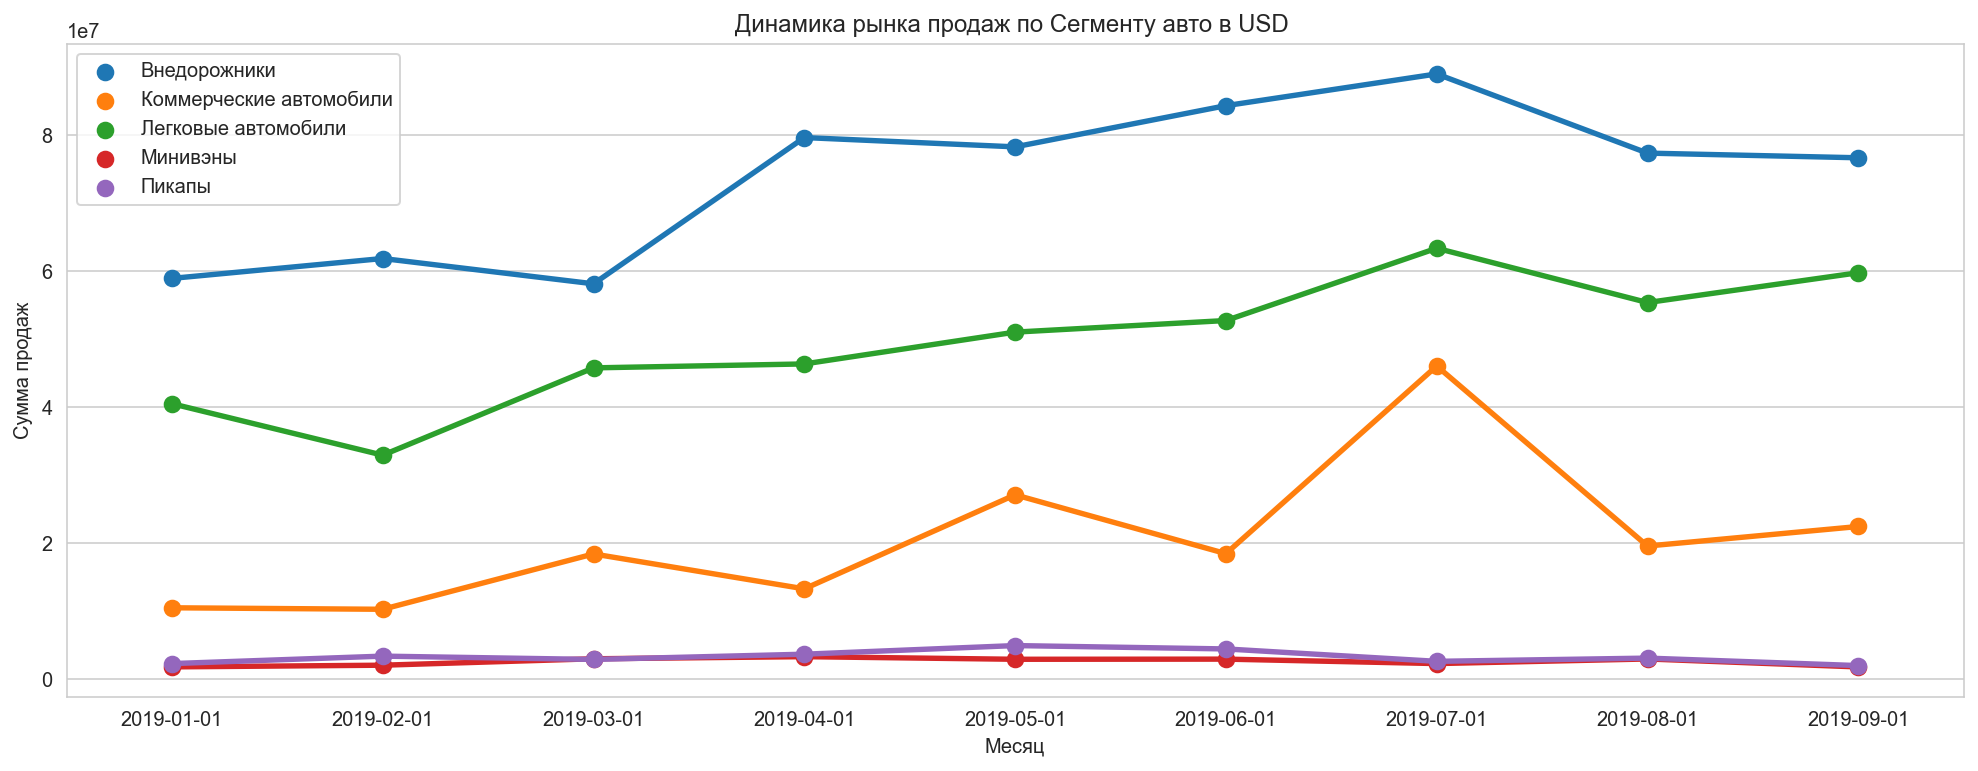

In [100]:
# по сегменту
sales_month4 = (df2.groupby(['segment_2013', 'sale_date'], as_index=False)
                .agg(sell_price_usd_sum=('sell_price_usd', 'sum')))

plt.figure(figsize=(17, 6))
sns.pointplot(data=sales_month4,
             x='sale_date',
             y='sell_price_usd_sum',
             hue='segment_2013'
            )
plt.title('Динамика рынка продаж по Сегменту авто в USD ')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
# # Закрепление легенды слева сверху
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.show()

Все сходитья пик в июле в том числе за счет Коммерческих авто, внедорожники доминируют.

In [101]:
# выделим бензиновых внедорожников
df2.query('segment_2013 == "Внедорожники" & fuel_type == "Бензин"').groupby(['brand', 'model'])['model'].count().nlargest(10)

brand      model   
Hyundai    Tucson      3271
           Creta       1775
Toyota     LC Prado    1711
Jac        S3          1286
Toyota     RAV4        1213
           LC200        779
Renault    Duster       707
Hyundai    Santa Fe     639
Chevrolet  Niva         567
Jac        S5           447
Name: model, dtype: int64

In [102]:
# выделим бензиновых внедорожников по продажам
df2.query('segment_2013 == "Внедорожники" & fuel_type == "Бензин"').groupby(['brand', 'model'])['sell_price_usd'].sum().nlargest(10)

brand    model   
Hyundai  Tucson     87315649.16
Toyota   LC Prado   83134112.05
         LC200      57893775.93
Hyundai  Creta      35222266.67
Toyota   RAV4       33725128.08
Lexus    LX         33640569.08
         RX         24363857.89
Hyundai  Santa Fe   23288661.43
Lada     4x4        22338600.00
Jac      S3         17847414.92
Name: sell_price_usd, dtype: float64

Топ бензиновых внедорожников по кол-ву: Hyundai Tucson -3270шт, Hyundai Creta -1775шт, Toyota LC Prado -1711шт, Toyota RAV4 -1213шт.
Топ бензиновых внедорожников по стоимости: Hyundai Tucson - 87млн.дол., Toyota LC Prado - 83млн.дол.

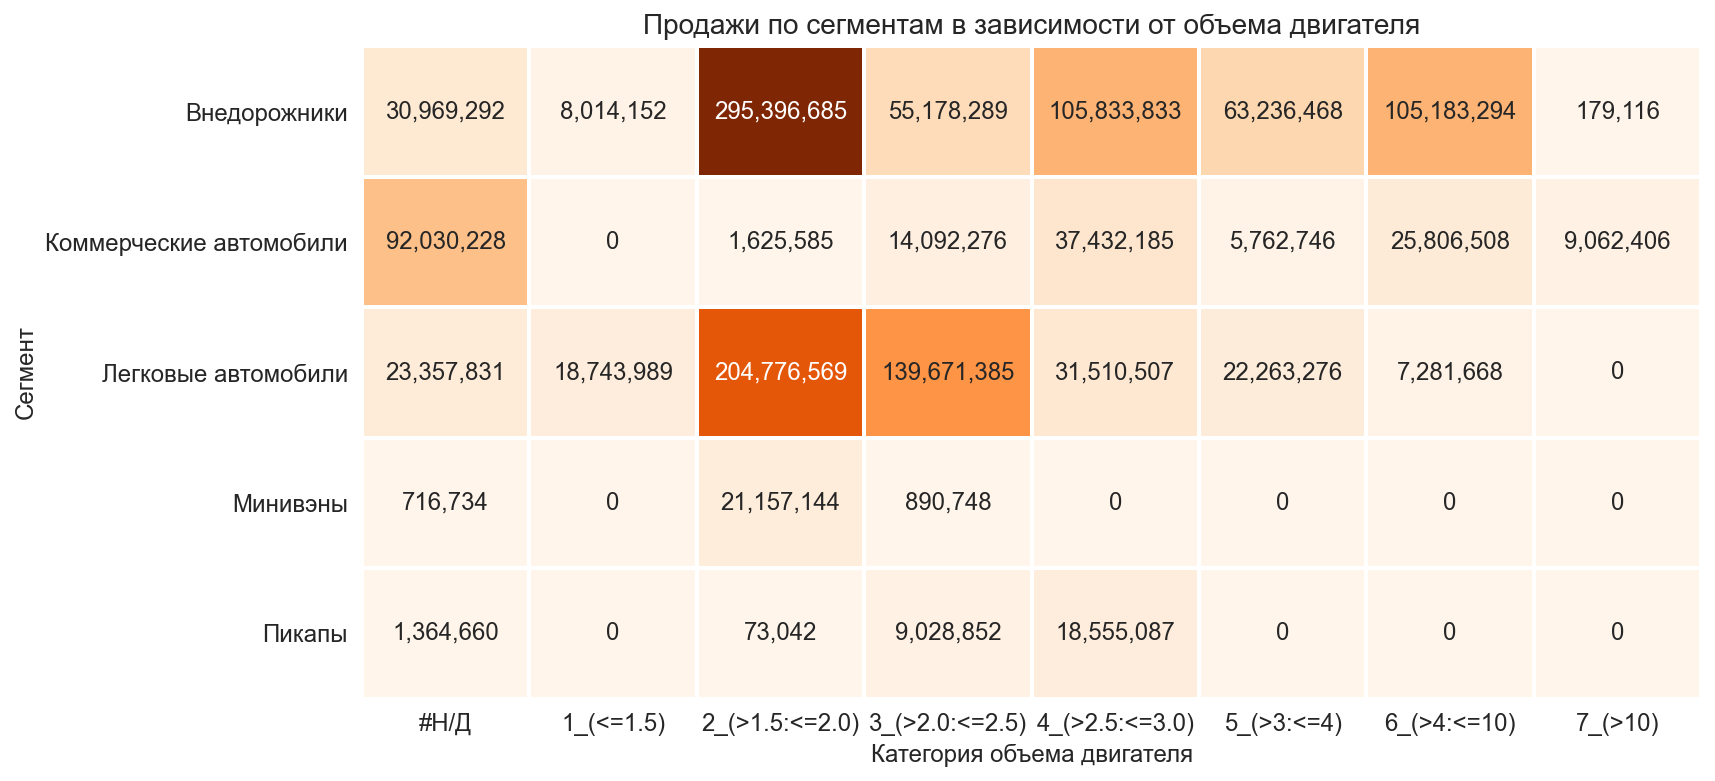

In [103]:
# Продажи по сегментам в зависимости от объема двигателя
seg_vol_e = df2.pivot_table(index='segment_2013',
                columns='engine_volume_cat',
                values='sell_price_usd',
                aggfunc='sum').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(seg_vol_e, annot=True, cmap='Oranges', fmt=',.0f', linewidths=2, cbar=False, annot_kws={"fontsize":12})
plt.title('Продажи по сегментам в зависимости от объема двигателя', fontsize=14)
plt.xlabel('Категория объема двигателя', fontsize=12)
plt.ylabel('Сегмент', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Самые прибыльные Внедорожники с объемом двигателя 1.5:2л - 295млн.дол., далее идут Легковые автомобили 1.5:2л рядом 204млн.дол.

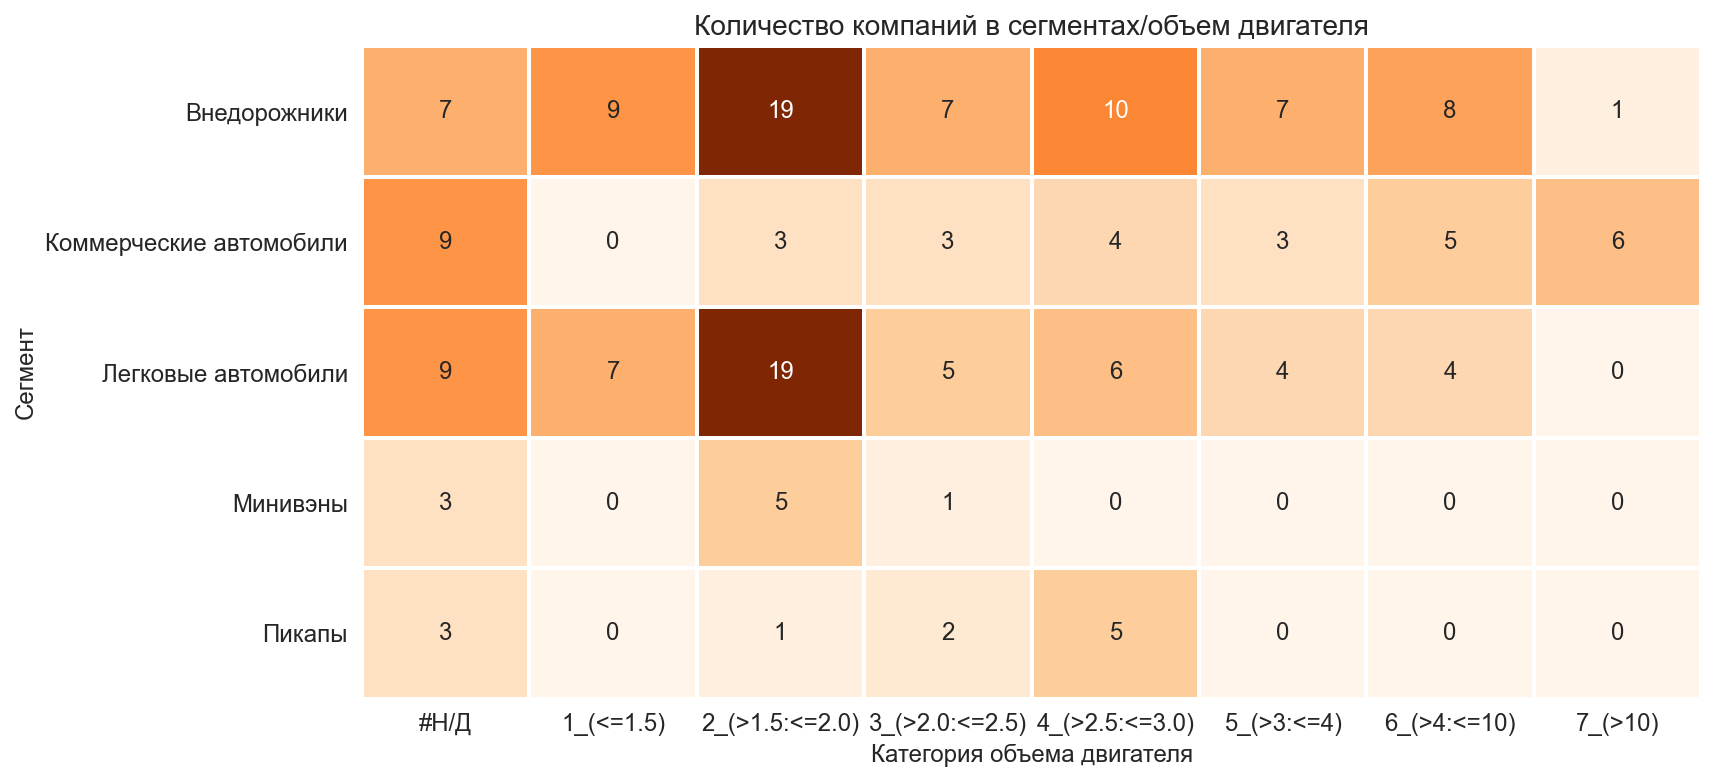

In [104]:
# Количество компаний по сегментам
seg_vol_n = df2.pivot_table(index='segment_2013',
                columns='engine_volume_cat',
                values='company',
                aggfunc='nunique').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(seg_vol_n, annot=True, cmap='Oranges', fmt=',.0f', linewidths=2, cbar=False, annot_kws={"fontsize":12})
plt.title('Количество компаний в сегментах/объем двигателя', fontsize=14)
plt.xlabel('Категория объема двигателя', fontsize=12)
plt.ylabel('Сегмент', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

В самых прибыльных сегментах высокая конкуренция. Недостаточно конкуренции и надо обратить внимание на сегменты: у Легковых >2:2.5л и у Внедорожников >4:10л.

### 4.4 RFM-анализ моделей авто
Показатели Frequency-частота и Monetary-количество принесенных денег.

In [105]:
# считаем f и m
df2['f_value'] = df2.groupby('model')['model'].transform('count')
df2['m_value'] = df2.groupby('model')['sell_price_usd'].transform('sum')

# сегментируем
df2['f'] = pd.qcut(df2['f_value'], 3, labels=[1,2,3])
df2['m'] = pd.qcut(df2['m_value'], 3, labels=[1,2,3])

# выделяем общие сегменты
df2['fm'] = df2['f'].astype(str) + df2['m'].astype(str)

F: 1-покупаются редко, 2-покупаются средне, 3-часто покупают
M: 1-низкая маржинальность, 2-средняя маржинальность, 3-высокая маржинальность

Сегменты идут от 11(редко покупают за низкую цену) до 33(часто покупают за высокую цену), лучший сегмент -33, интересные сегменты 23/32/22.

In [106]:
# посмотрим на интересные сегменты
df2[df2['fm'].isin(['22', '23', '32', '33'])].groupby('brand')['model'].unique().reset_index()

brand                                              model
0  Hyundai         [Accent, Creta, Elantra, Santa Fe, Tucson]
1      Jac                                               [S3]
2     Lada                                            [Vesta]
3    Ravon                                         [Nexia R3]
4   Toyota  [Camry, Corolla, HILUX DC, LC Prado, LC200, RAV4]

In [107]:
# посмотрим на интересные сегменты
df2[df2['fm'].isin(['33'])].groupby('brand')['model'].unique().reset_index()

brand              model
0  Hyundai  [Elantra, Tucson]
1   Toyota            [Camry]

* Наиболее представленные Бренды: Hyundai, Toyota. Наиболее интересные (часто покупают за высокую цену) Hyundai: [Elantra, Tucson], Toyota [Camry]

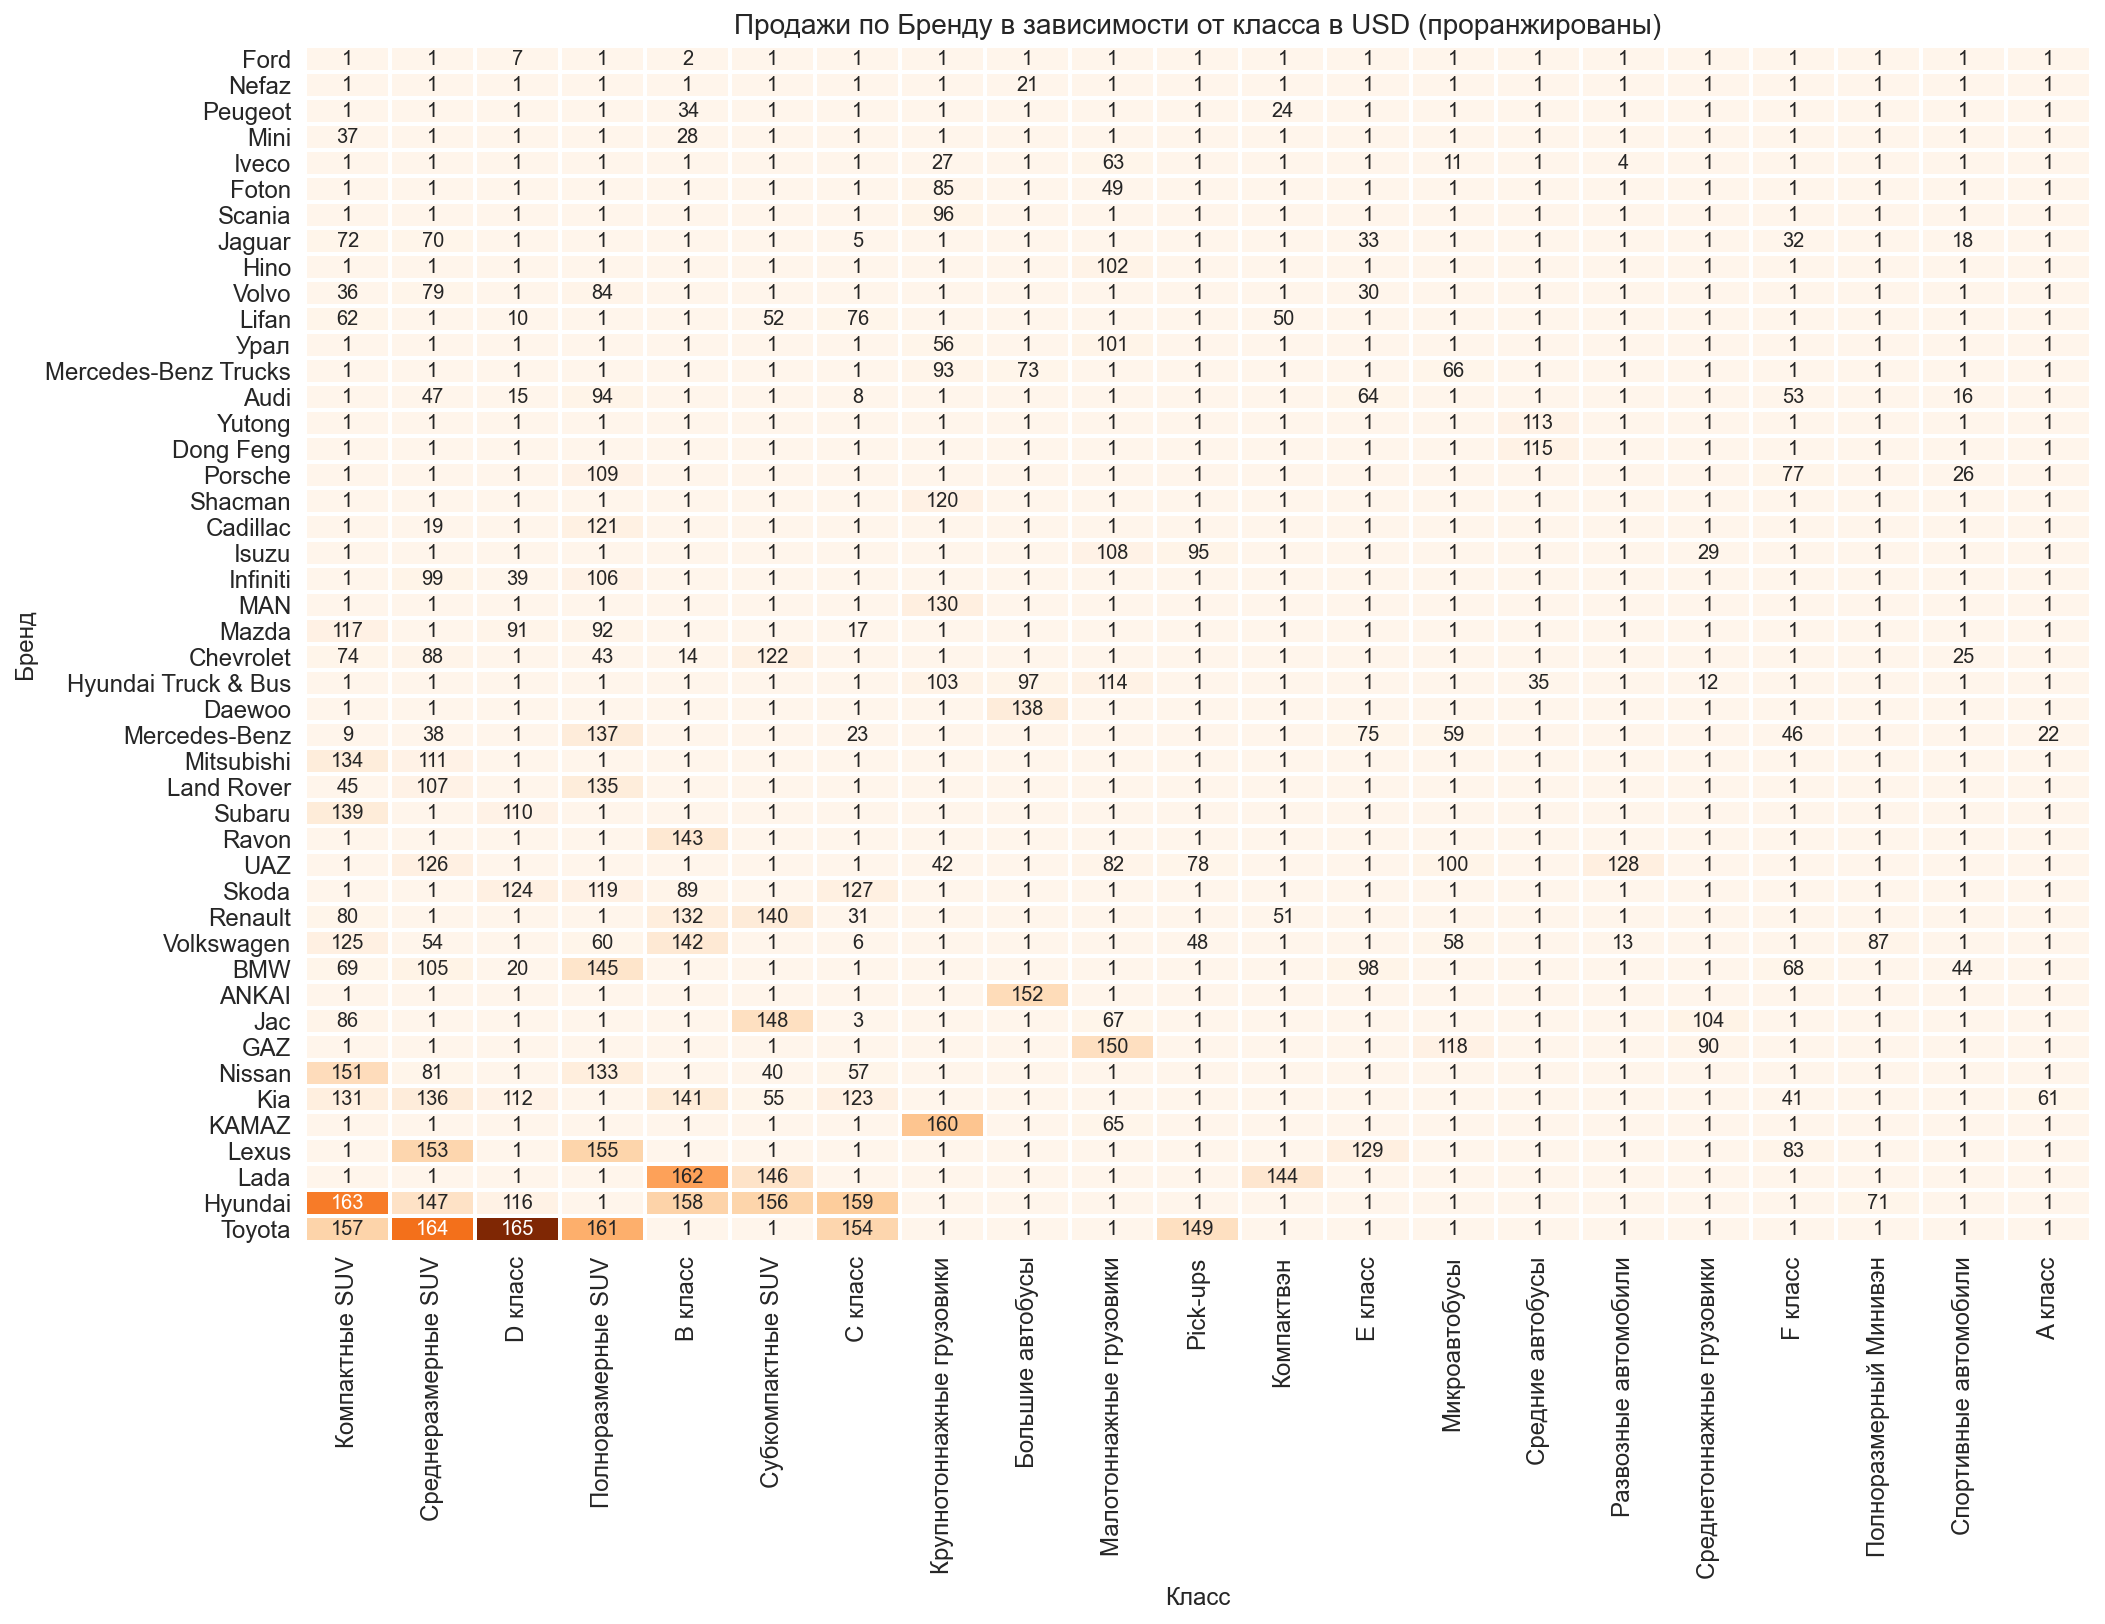

In [108]:
# продажи по Бренду в зависимости от класса в USD
seg_vol = df2.pivot_table(index='brand',
                           columns='class_2013',
                           values='sell_price_usd',
                           aggfunc='sum',
                           fill_value=0
                         )

# # оставить только топ 10 строк и столбцов
# top_10_rows = seg_vol.sum(axis=1).nlargest(10).index
# top_10_cols = seg_vol.sum().nlargest(10).index
# seg_vol = seg_vol.loc[top_10_rows, top_10_cols]

# сортировка столбцов по сумме значений
seg_vol = seg_vol[seg_vol.sum().sort_values(ascending=False).index]
# сортировка строк по сумме значений
seg_vol = seg_vol.loc[seg_vol.sum(axis=1).sort_values().index]

# ранжирование
ranked_val = pd.Series(seg_vol.values.flatten()).rank(method='dense')
ranked = pd.DataFrame(ranked_val.values.reshape(seg_vol.shape),
                              index=seg_vol.index,
                              columns=seg_vol.columns)
# график
plt.figure(figsize=(16,11))
sns.heatmap(seg_vol,
            annot=ranked,
            #annot=True,
            cmap='Oranges',
            fmt=',.0f',
            linewidths=2,
            cbar=False,
            annot_kws={"fontsize":10})
plt.title('Продажи по Бренду в зависимости от класса в USD (проранжированы)', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Бренд', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* Наиболее популярные у брендов классы у Toyota: D класс, Среднеразмерные SUV, Полноразмерные SUV; у Hyundai: Компактные SUV, C класс, В класс.

### 4.5 Продажи автомобилей в разрезе бренд / сегмент;

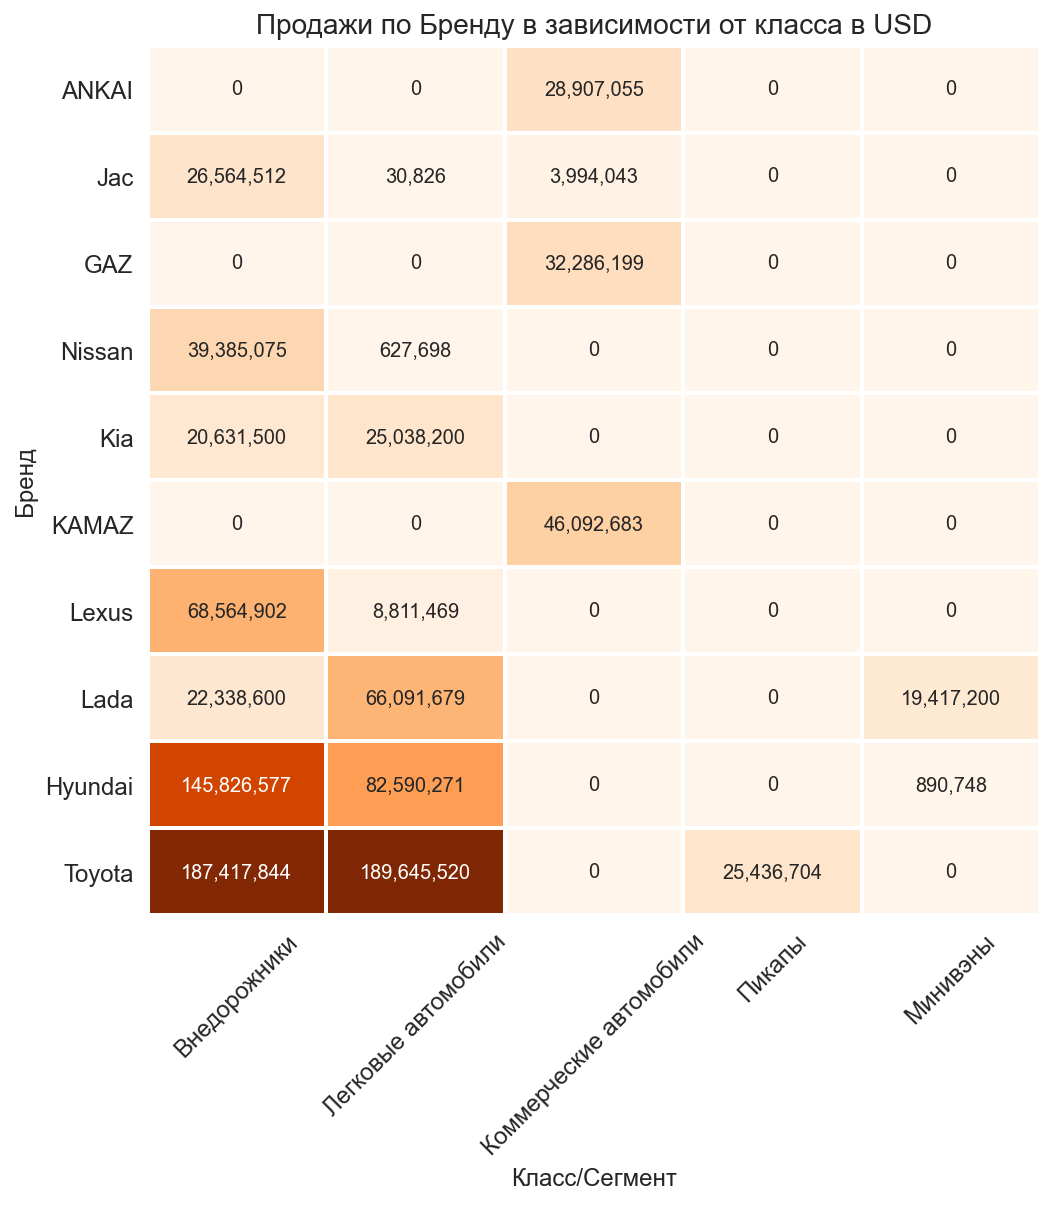

In [109]:
# продажи по Бренду в зависимости от класса в USD
brand_seg = df2.pivot_table(index='brand',
                           columns='segment_2013',
                           values='sell_price_usd',
                           aggfunc='sum',
                           fill_value=0)
# оставить только топ 10 строк и столбцов
top_10_rows = brand_seg.sum(axis=1).nlargest(10).index
# top_10_cols = brand_seg.sum().nlargest(10).index
brand_seg = brand_seg.loc[top_10_rows]

# сортировка столбцов по сумме значений
brand_seg = brand_seg[brand_seg.sum().sort_values(ascending=False).index]
# сортировка строк по сумме значений
brand_seg = brand_seg.loc[brand_seg.sum(axis=1).sort_values().index]

# график
plt.figure(figsize=(8,8))
sns.heatmap(brand_seg,
            #annot=ranked,
            annot=True,
            cmap='Oranges',
            fmt=',.0f',
            linewidths=2,
            cbar=False,
            annot_kws={"fontsize":10})
plt.title('Продажи по Бренду в зависимости от класса в USD', fontsize=14)
plt.xlabel('Класс/Сегмент', fontsize=12)
plt.ylabel('Бренд', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

In [110]:
# выделим бензиновых внедорожников по продажам  & brand == "Бензин"
df2.query('segment_2013 == "Легковые автомобили"').groupby(['brand', 'model'])['sell_price_usd'].sum().nlargest(10)

brand       model   
Toyota      Camry      155748735.08
Hyundai     Elantra     41269145.64
            Accent      36481914.44
Toyota      Corolla     33896784.80
Lada        Vesta       31116273.68
            Granta      26671905.26
Ravon       Nexia R3    16714967.50
Volkswagen  Polo        15715322.28
Kia         Rio         13755500.00
Lada        XRAY         8276800.00
Name: sell_price_usd, dtype: float64

Хоть Внедорожники самые популярные по продажам, лидирующий сегмент у бренда Toyota - Легковые автомобили 189млн (из них Toyota Camry-155млн!) немного обгоняет Toyota Внедорожники 187млн.

### 4.6 Продажи по маркам/моделям;

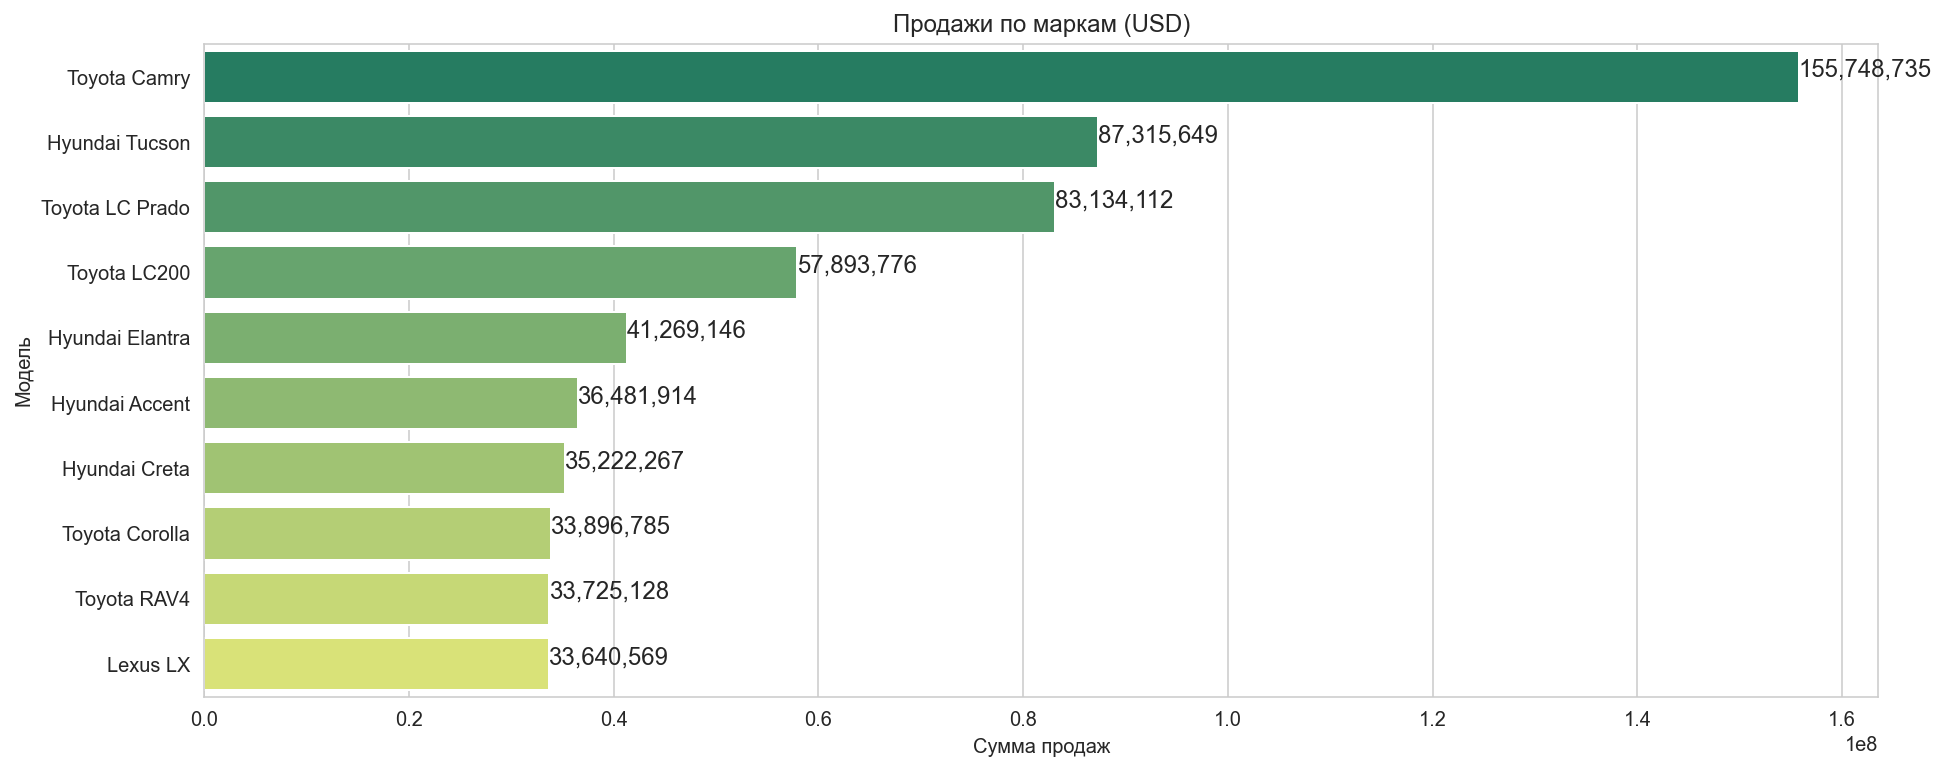

In [111]:
# выделим Продажи по маркам
top_model = df2.groupby(['brand', 'model'])['sell_price_usd'].sum().nlargest(10).reset_index()
top_model['model_brand'] = top_model['brand'] + ' ' + top_model['model']

bar_plot(top_model, 'sell_price_usd', 'model_brand',
         'Продажи по маркам (USD)',
         'Сумма продаж',
         'Модель',
         figsize=(15, 6))

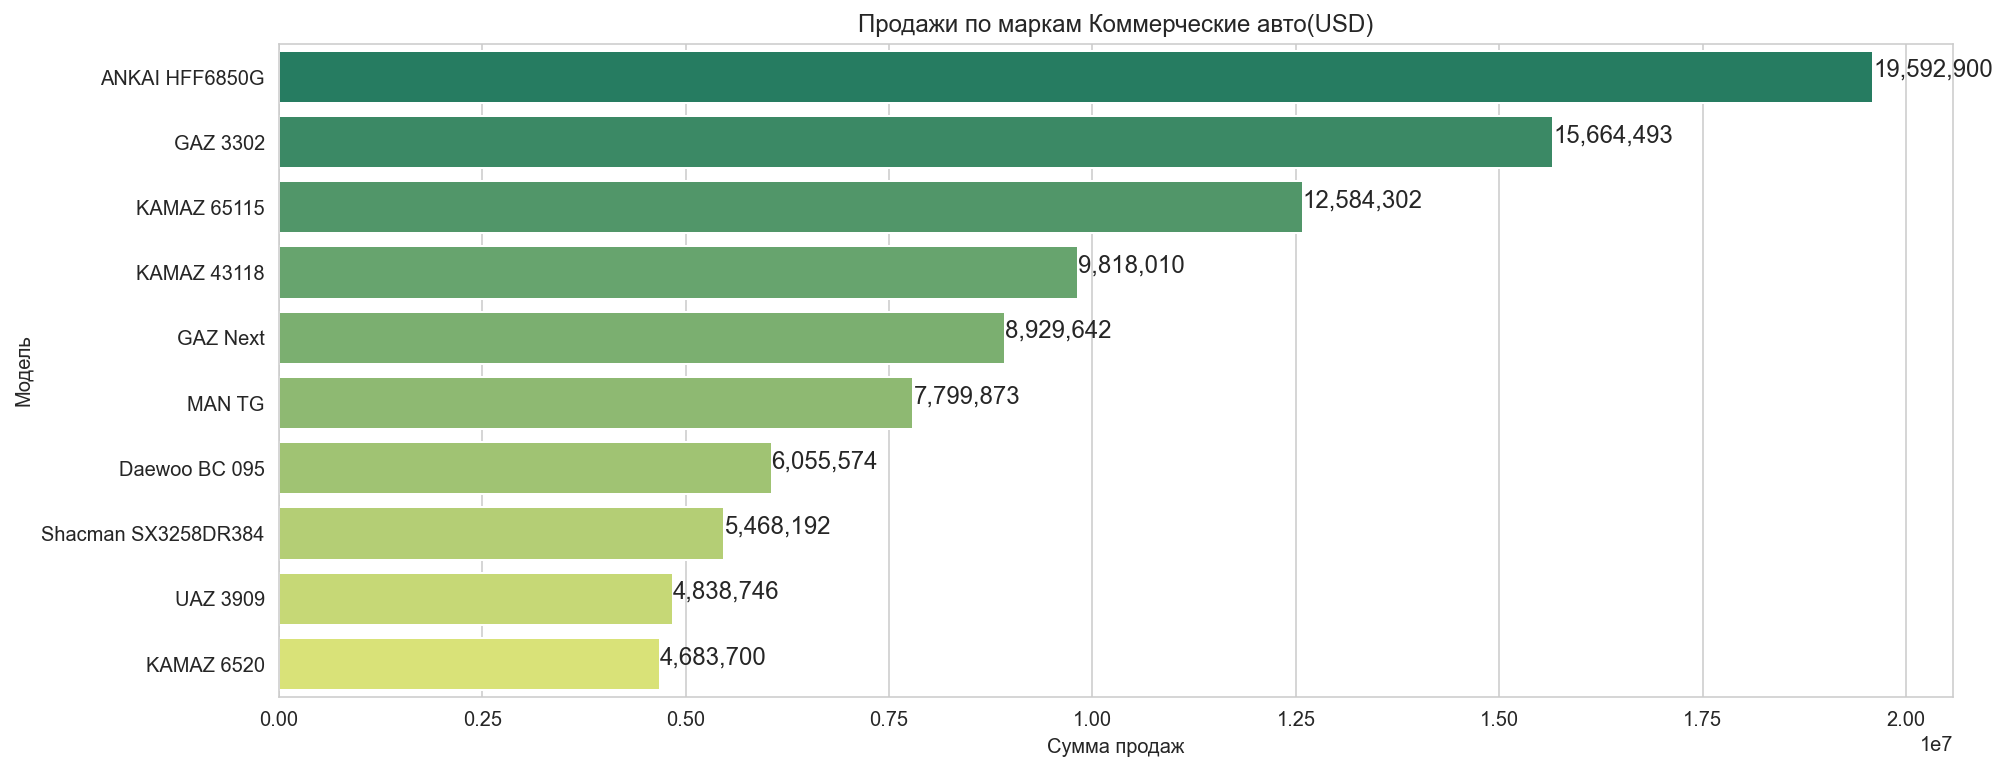

In [112]:
# сделаем отдельно коммерческие и некоомерческие
# выделим Продажи по маркам
top_model = com.groupby(['brand', 'model'])['sell_price_usd'].sum().nlargest(10).reset_index()
top_model['model_brand'] = top_model['brand'] + ' ' + top_model['model']
bar_plot(top_model, 'sell_price_usd', 'model_brand',
         'Продажи по маркам Коммерческие авто(USD)',
         'Сумма продаж',
         'Модель',
         figsize=(15, 6))

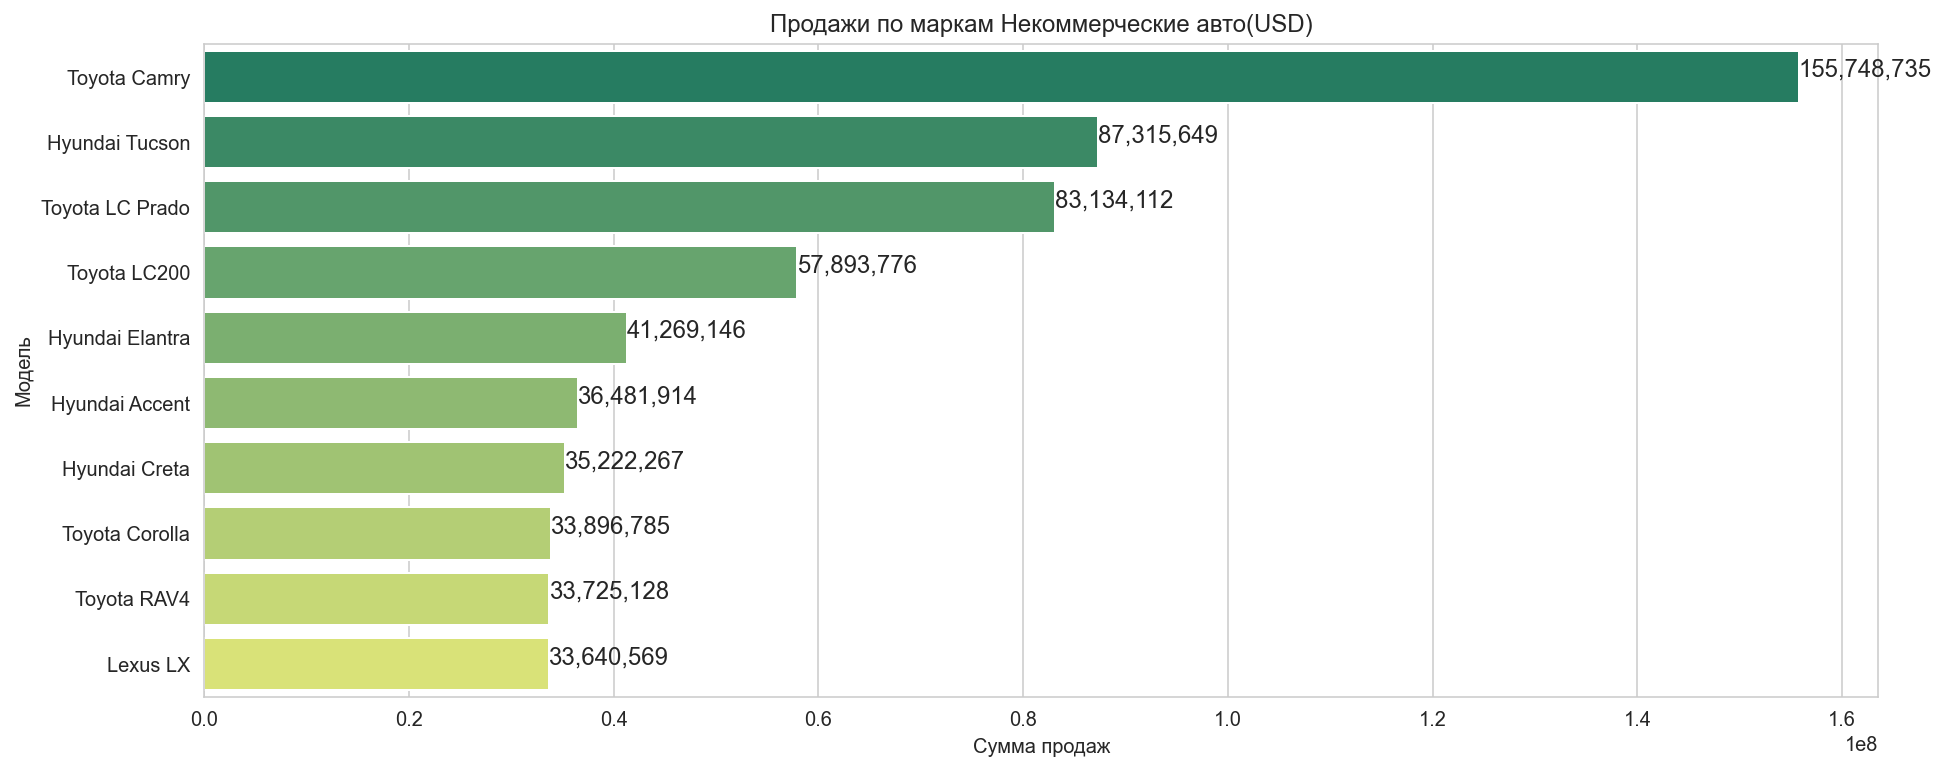

In [113]:
# сделаем отдельно коммерческие и некоомерческие
# выделим Продажи по маркам
top_model = noncom.groupby(['brand', 'model'])['sell_price_usd'].sum().nlargest(10).reset_index()
top_model['model_brand'] = top_model['brand'] + ' ' + top_model['model']
bar_plot(top_model, 'sell_price_usd', 'model_brand',
         'Продажи по маркам Некоммерческие авто(USD)',
         'Сумма продаж',
         'Модель',
         figsize=(15, 6))

*  В общем топ10 марок по продажам нет коммерческих авто. Топ Некоммерческих авто по продажам: Toyota Camry 155млн, Hyundai Tucson 87млн., Toyota Prado 83млн. Топ Коммерческих авто по продажам: ANKAI HFF6850G 20млн., GAZ 3302 16млн, KAMAZ 65115 12млн.

### 4.7 Продажи по регионам;

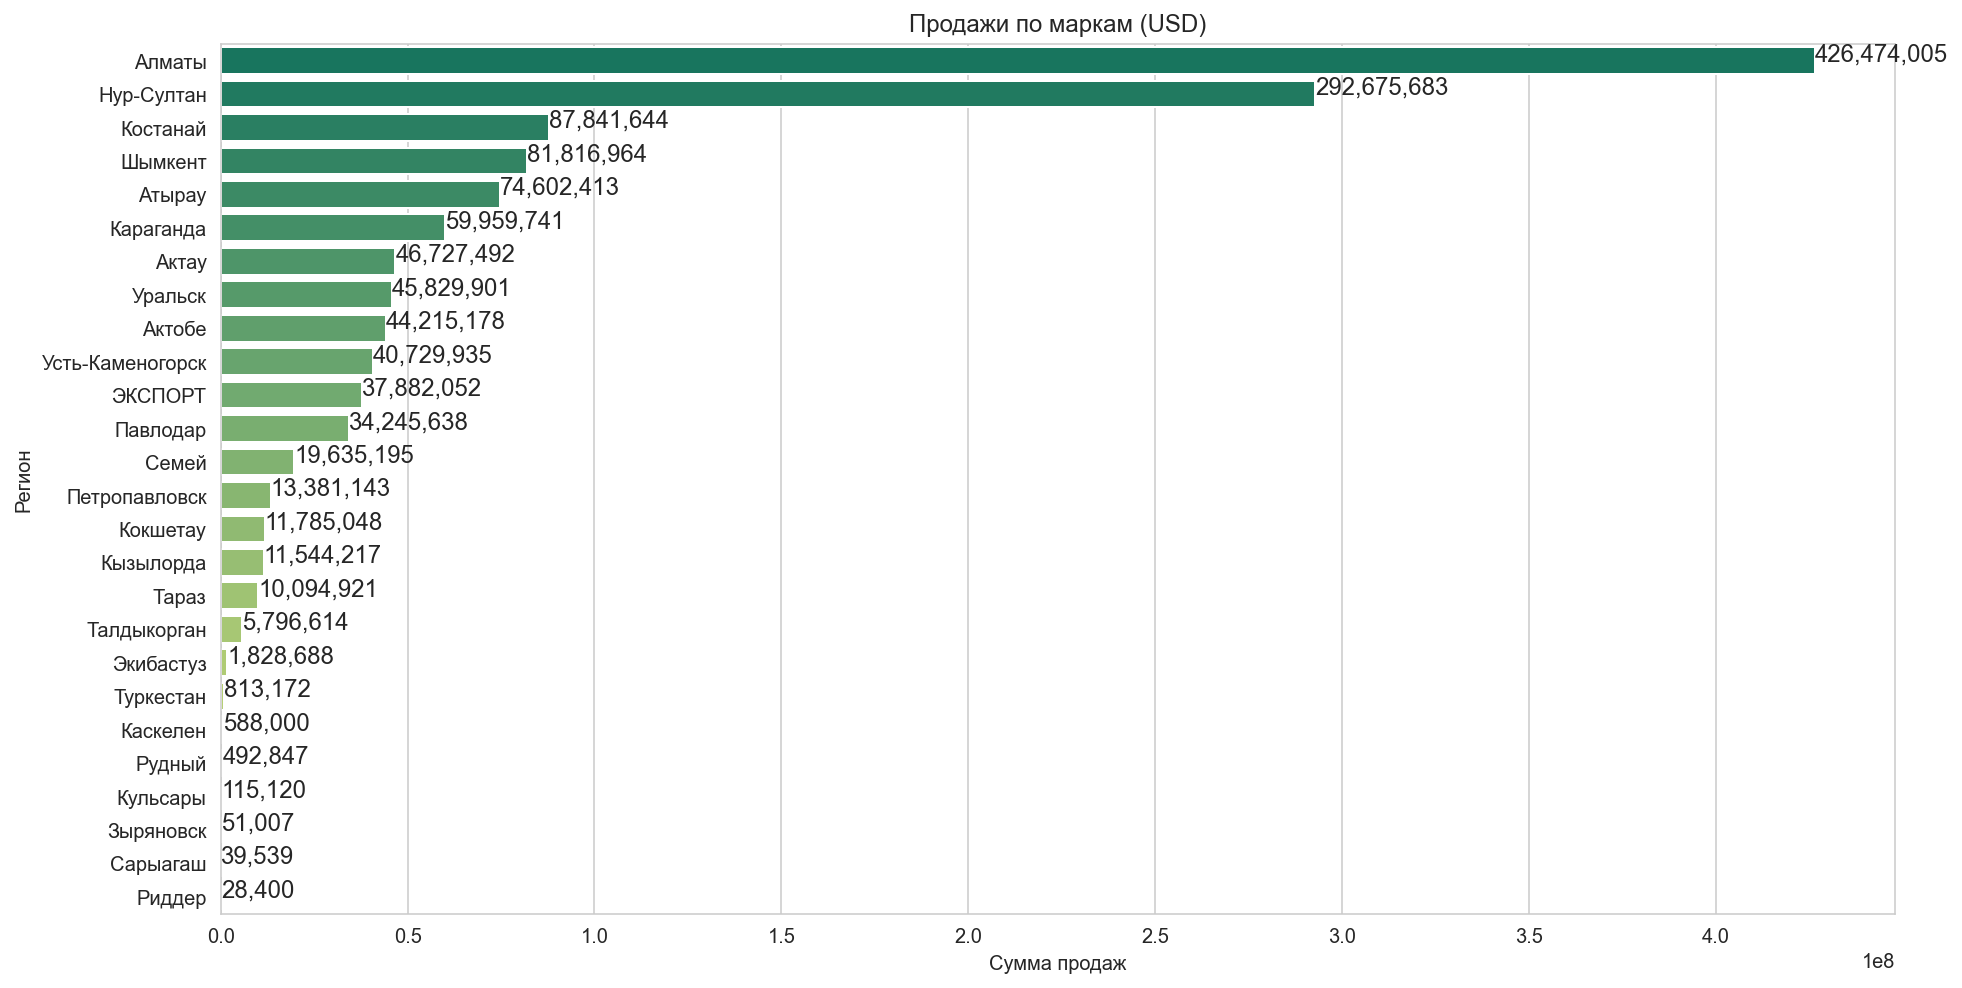

In [114]:
# выделим Продажи по регионам
top_region = df2.groupby(['region'])['sell_price_usd'].sum().sort_values(ascending=False).reset_index()

bar_plot(top_region, 'sell_price_usd', 'region',
         'Продажи по маркам (USD)',
         'Сумма продаж',
         'Регион',
         figsize=(15, 8))

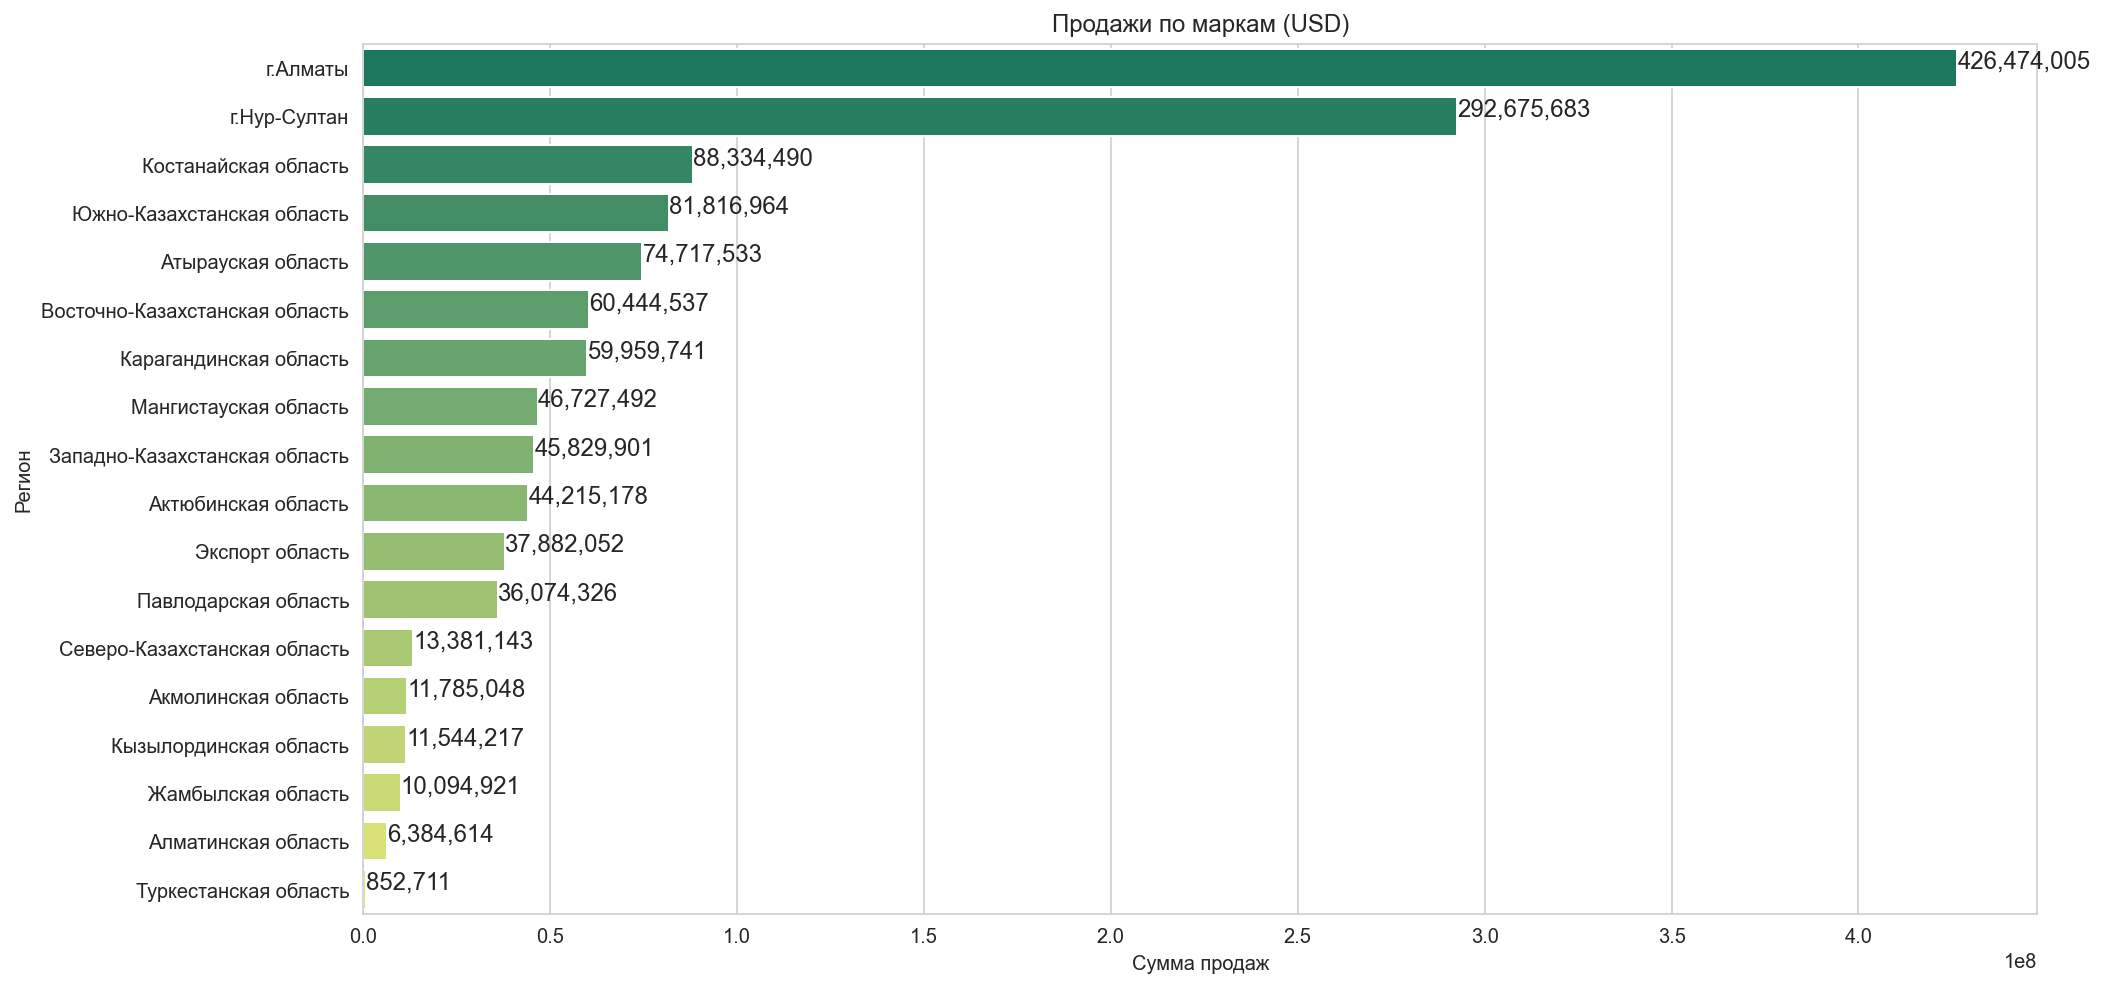

In [115]:
# выделим Продажи по областям
top_state = df2.groupby(['state'])['sell_price_usd'].sum().sort_values(ascending=False).reset_index()

bar_plot(top_state, 'sell_price_usd', 'state',
         'Продажи по маркам (USD)',
         'Сумма продаж',
         'Регион',
         figsize=(15, 8))

И по городам и по областям примерно одинаково, лидеры по продажам г.Алматы 426млн, г.Нур-Султан 292млн., далее идет Костанайская область 88млн., Южно-казахстанская область 81млн.

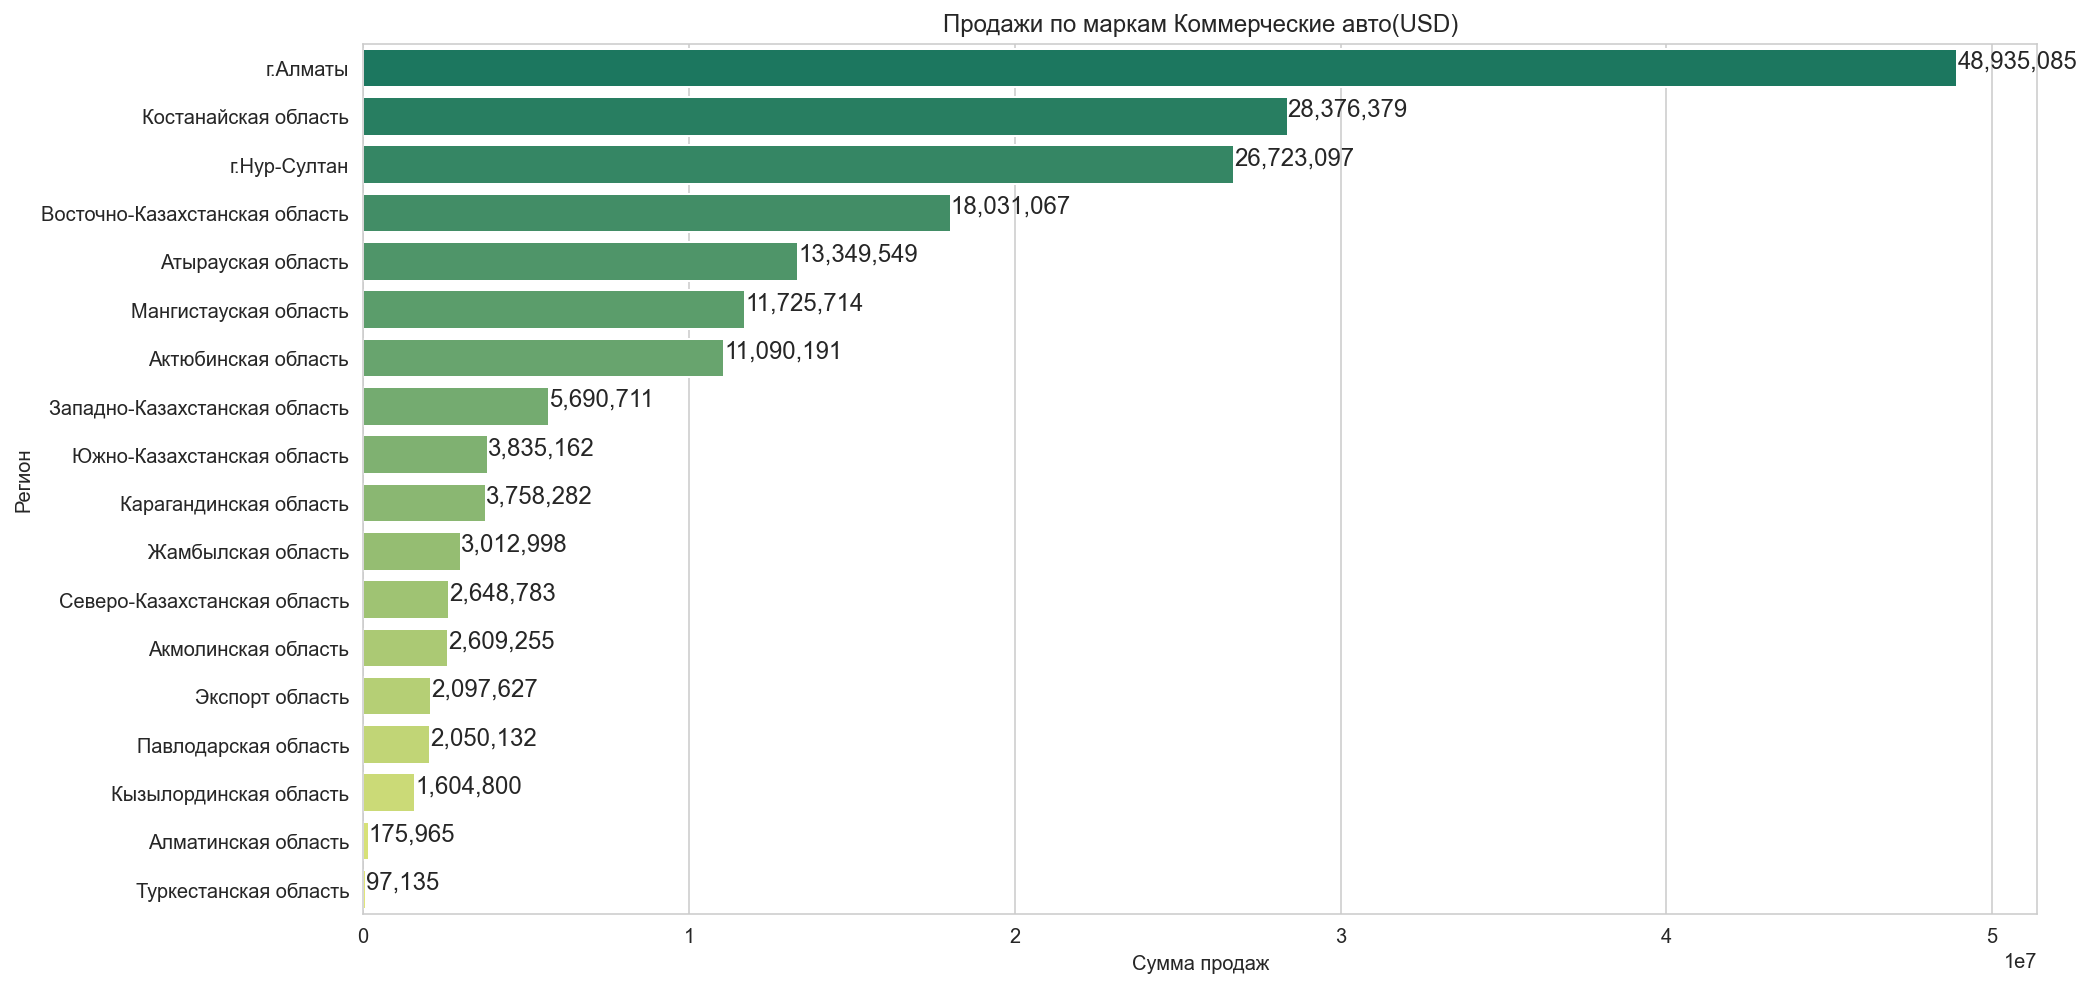

In [116]:
#сделаем отдельно коммерческие и некоомерческие
# выделим Продажи по областям
top_state = com.groupby(['state'])['sell_price_usd'].sum().sort_values(ascending=False).reset_index()

bar_plot(top_state, 'sell_price_usd', 'state',
         'Продажи по маркам Коммерческие авто(USD)',
         'Сумма продаж',
         'Регион',
         figsize=(15, 8))

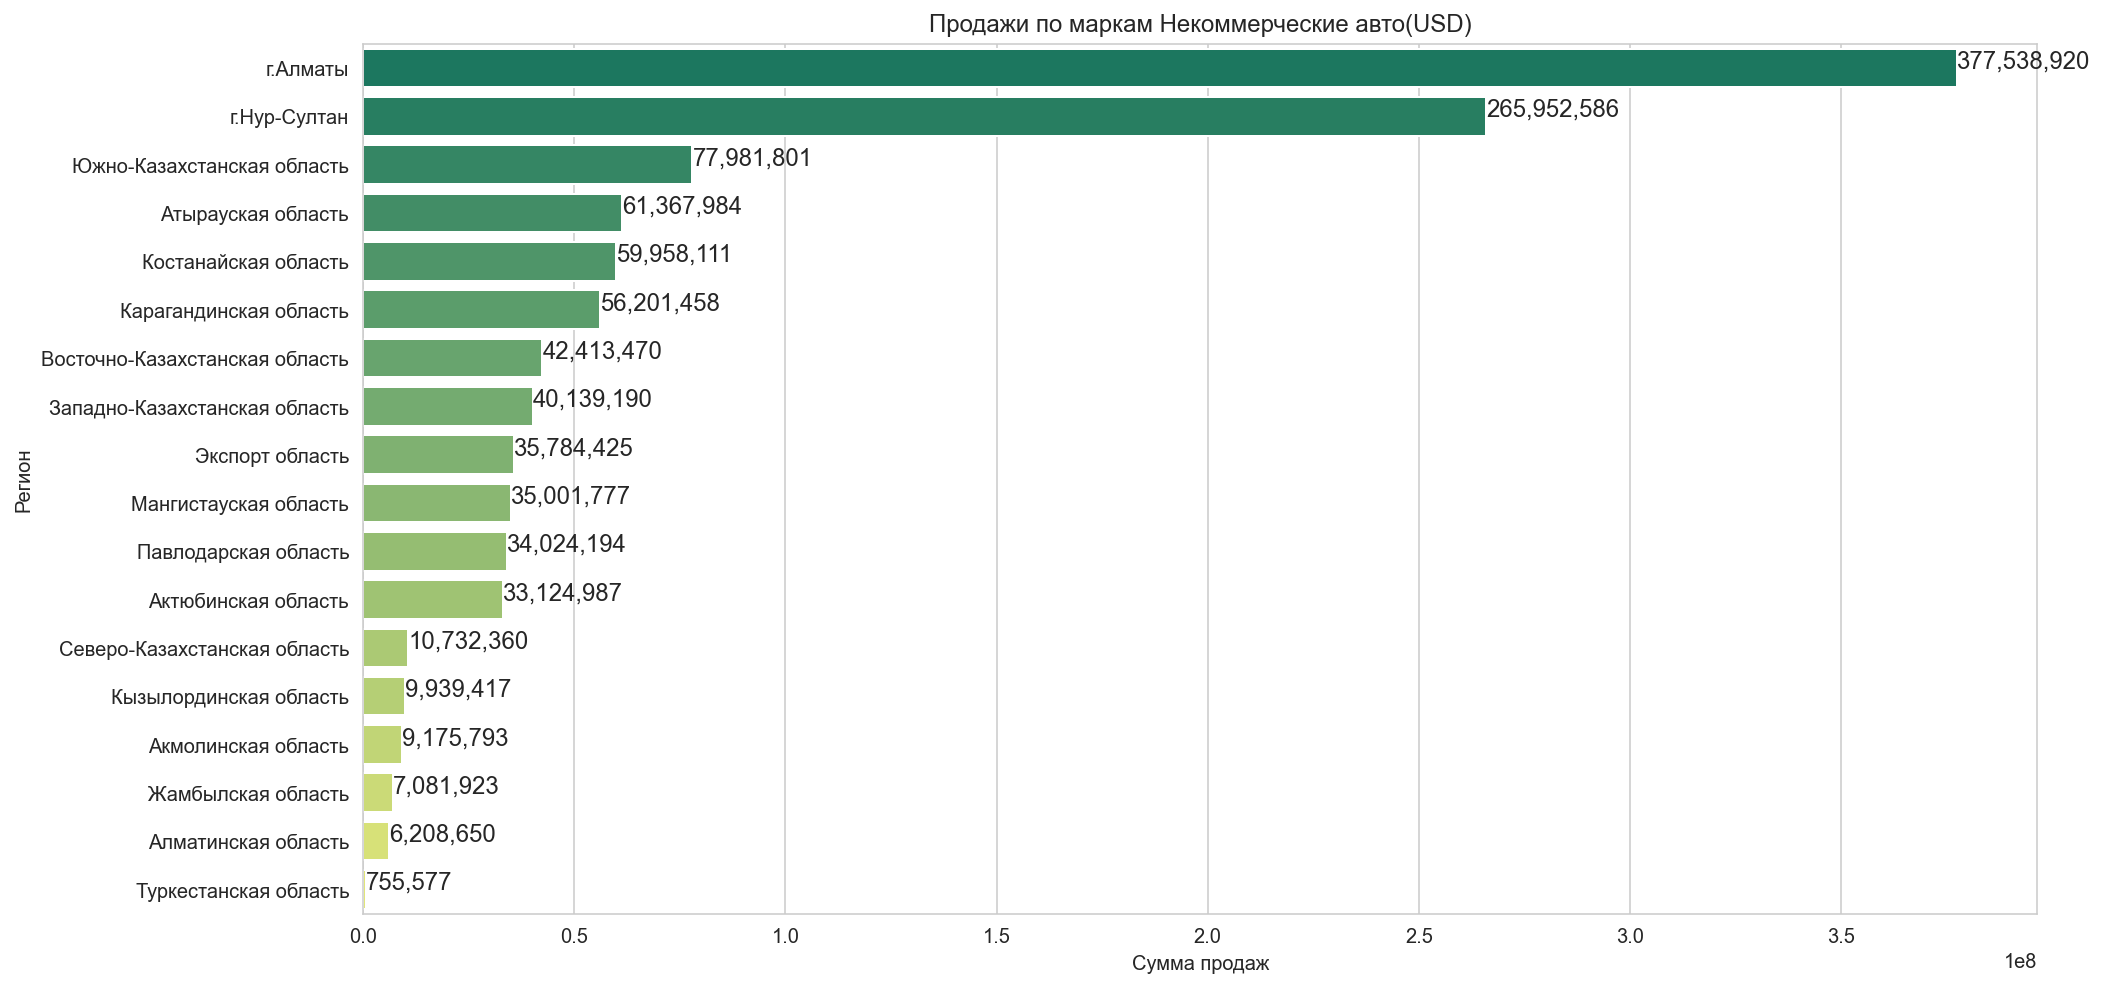

In [117]:
#сделаем отдельно коммерческие и некоомерческие
# выделим Продажи по областям
top_state = noncom.groupby(['state'])['sell_price_usd'].sum().sort_values(ascending=False).reset_index()

bar_plot(top_state, 'sell_price_usd', 'state',
         'Продажи по маркам Некоммерческие авто(USD)',
         'Сумма продаж',
         'Регион',
         figsize=(15, 8))

Среди коммерческих авто есть различие в топе: г.Алматы 49млн, Костанайская обл.28млн., г.Нур-Султан 27млн. Скорее всего в Костанае развиты точки со стороны российских производителей, т.к. больше половины доли коммерческих авто занимают российские марки.

### 4.8 Продажи автоцентров;

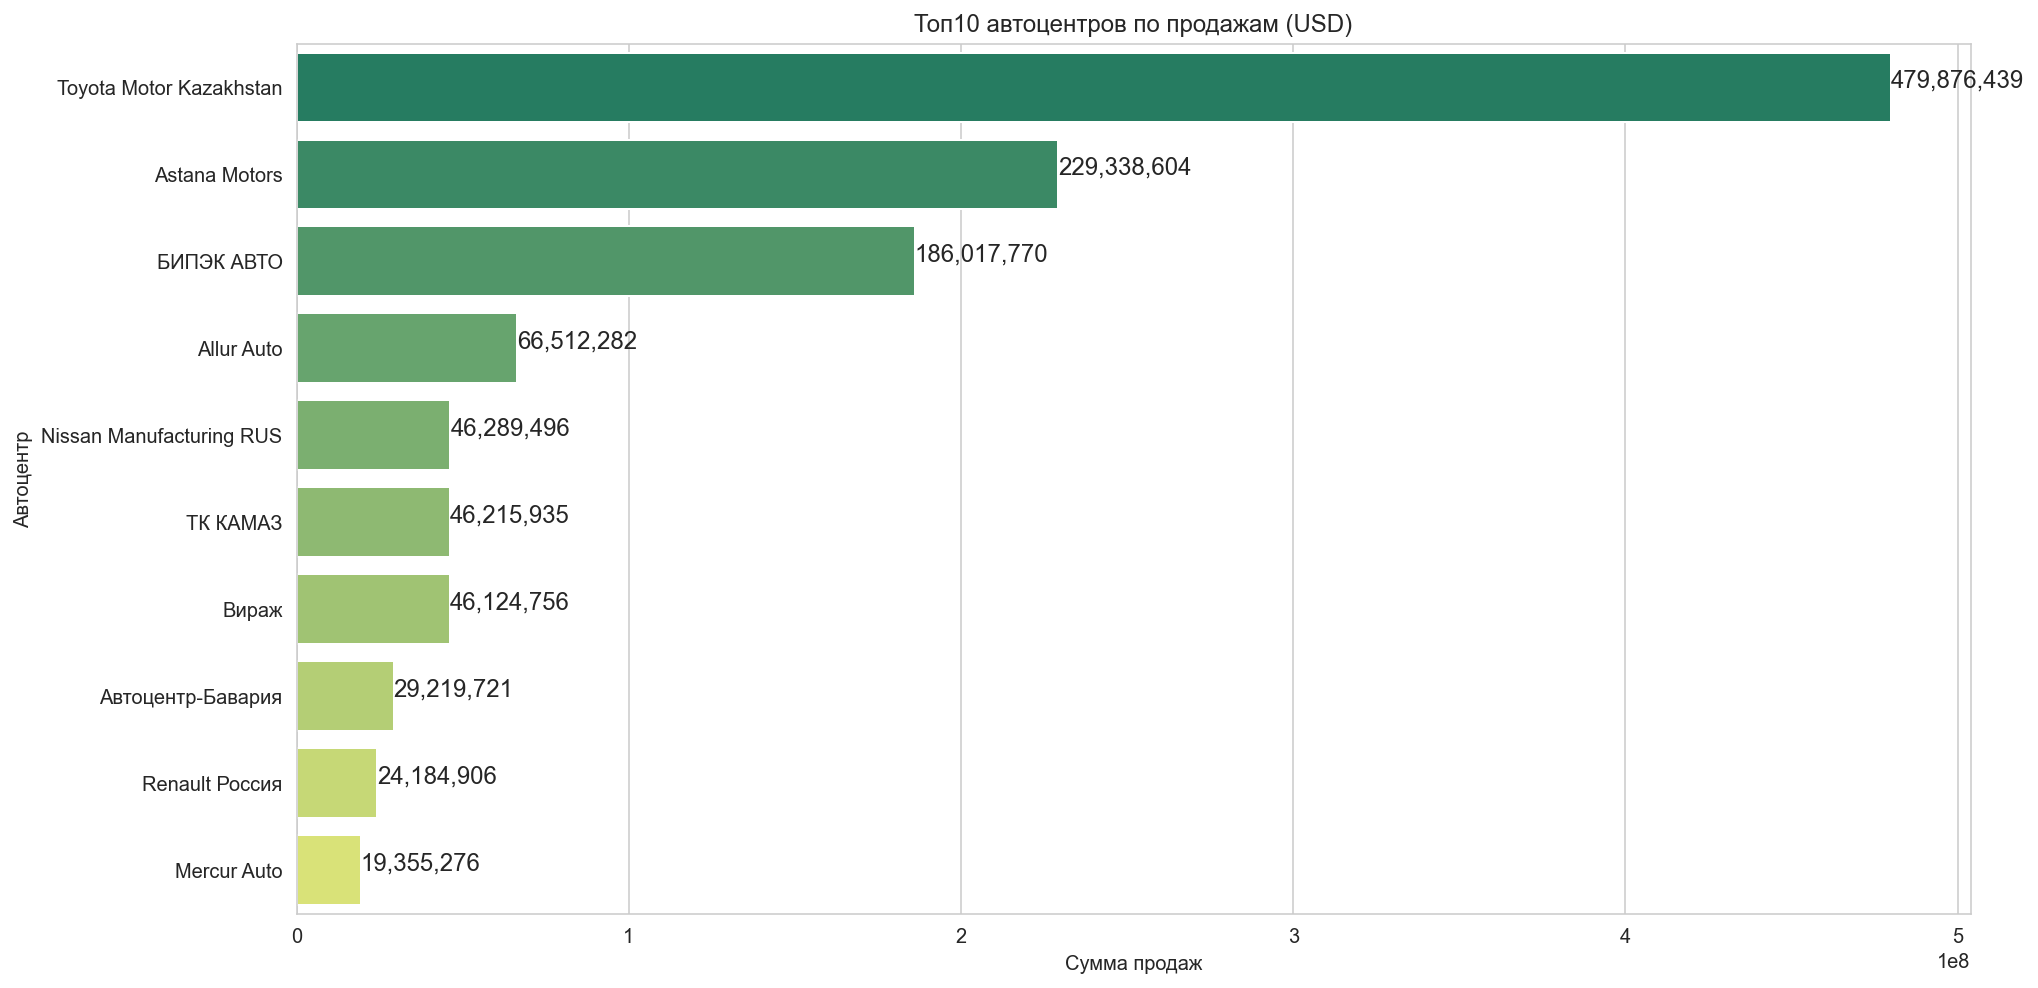

In [118]:
# выделим Продажи автоцентров
top_company = df2.groupby(['company'])['sell_price_usd'].sum().sort_values(ascending=False).nlargest(10).reset_index()

bar_plot(top_company, 'sell_price_usd', 'company',
         'Топ10 автоцентров по продажам (USD)',
         'Сумма продаж',
         'Автоцентр',
         figsize=(15, 8))

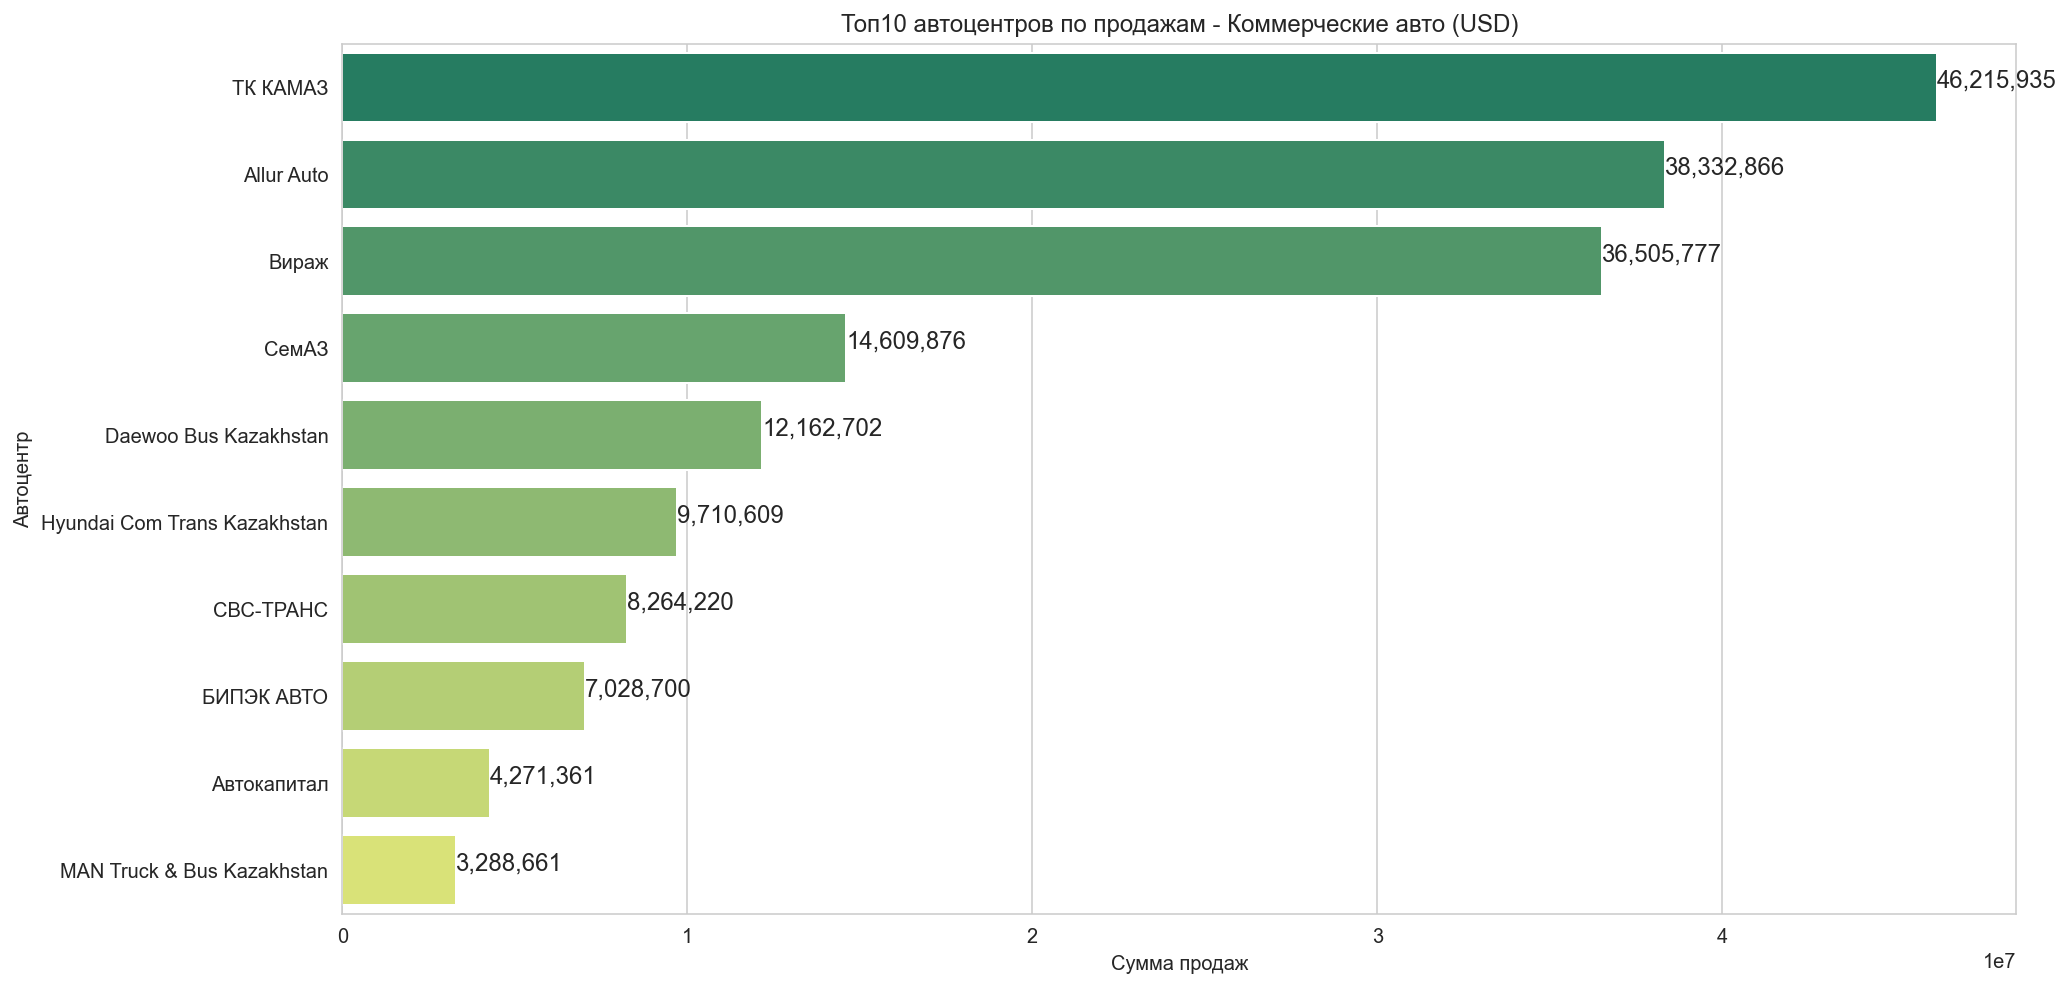

In [119]:
# выделим Продажи автоцентров Коммерческий
top_company = com.groupby(['company'])['sell_price_usd'].sum().sort_values(ascending=False).nlargest(10).reset_index()

bar_plot(top_company, 'sell_price_usd', 'company',
         'Топ10 автоцентров по продажам - Коммерческие авто (USD)',
         'Сумма продаж',
         'Автоцентр',
         figsize=(15, 8))

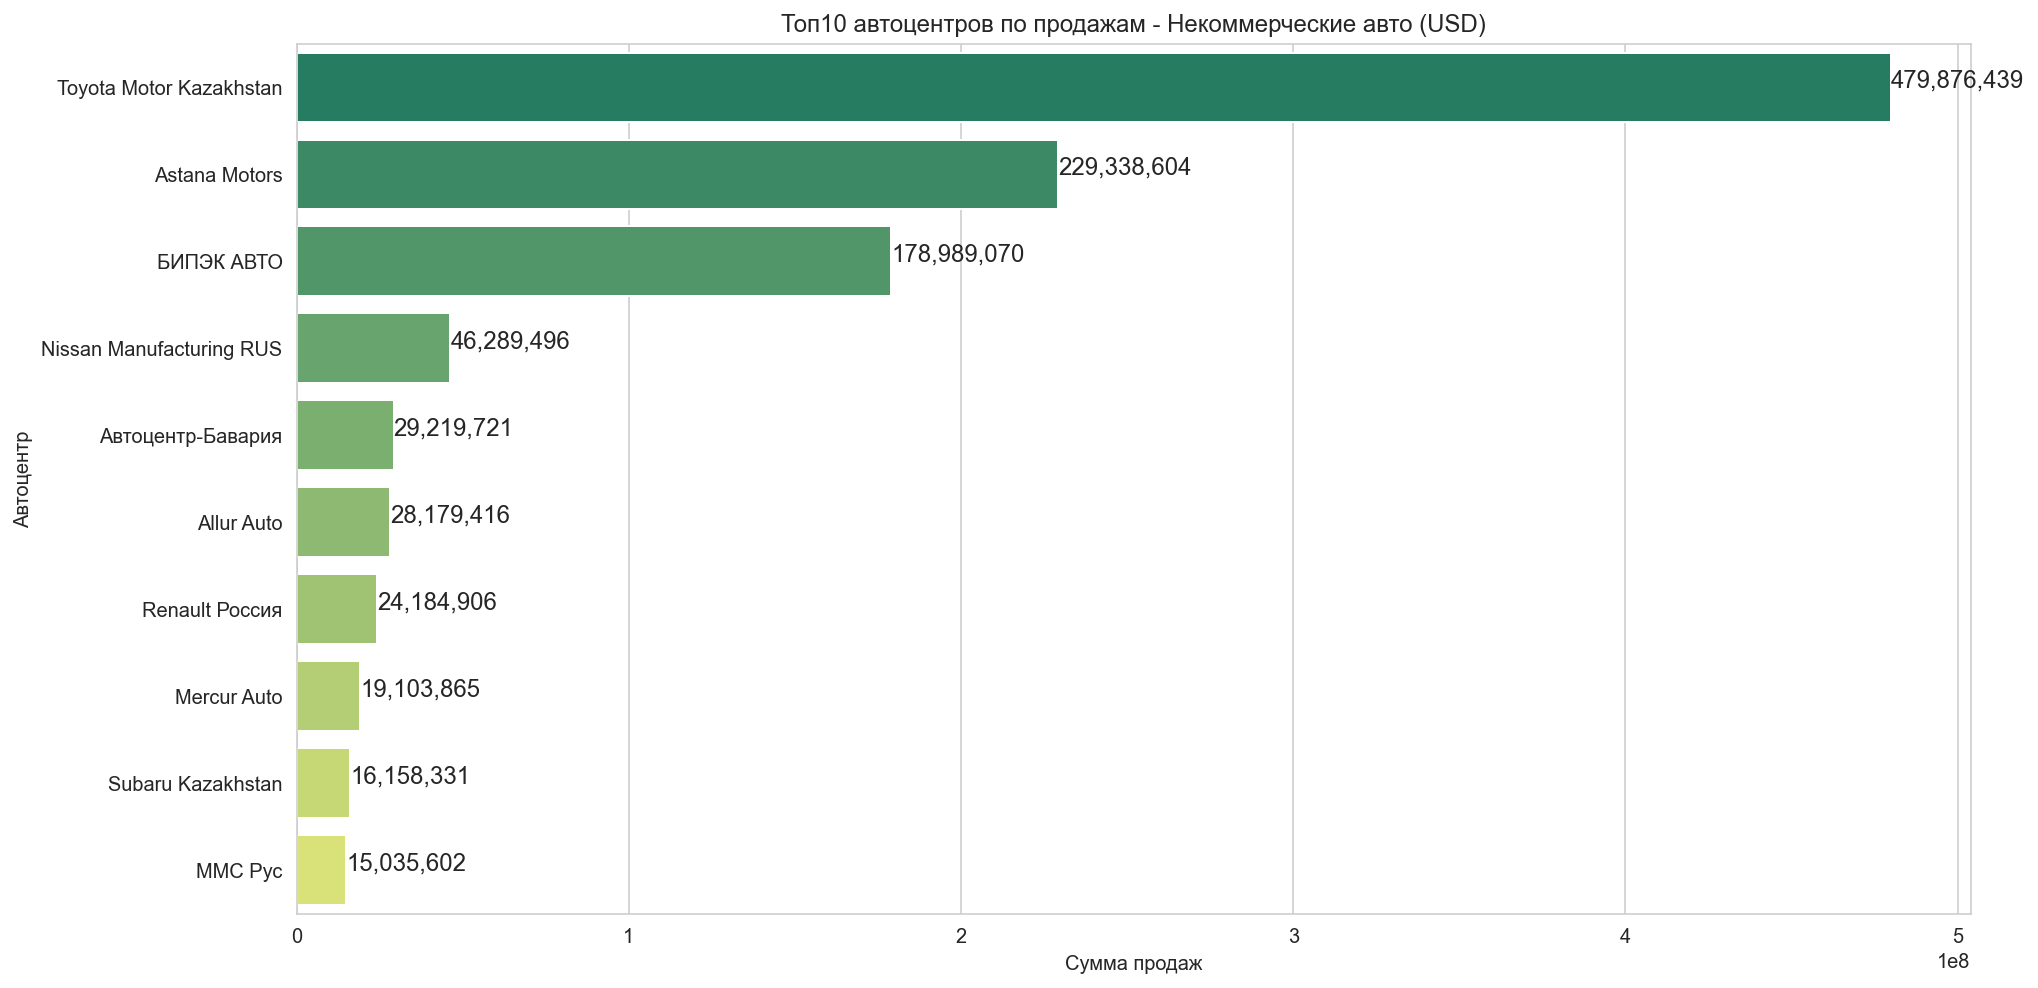

In [120]:
# выделим Продажи автоцентров Коммерческий
top_company = noncom.groupby(['company'])['sell_price_usd'].sum().sort_values(ascending=False).nlargest(10).reset_index()

bar_plot(top_company, 'sell_price_usd', 'company',
         'Топ10 автоцентров по продажам - Некоммерческие авто (USD)',
         'Сумма продаж',
         'Автоцентр',
         figsize=(15, 8))

* Топ3 автоцентров по продаже: с большим отрывом Toyota Motor Kazakhstan 480млн., Astana Motors 229млн, БИПЭК АВТО 186млн. Топ3 автоцентров по продаже Некоммерческих авто такой же как и основной топ даже столько же по объему. Топ3 автоцентров по продаже Коммерческих авто: ТК КАМАЗ 46млн, Allur Auto 38млн, Вираж 36млн.

### 4.9 Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону) корелляцией;

Данные по средней ЗП по региону взяты из официального источника

https://www.zakon.kz/finansy/4993404-srednemesyachnaya-zarabotnaya-plata-za.html

In [121]:
# посчитаем коэф корелляции общий
display(df2[['avg_month_salary_kzt', 'price_usd']].corr())

# коммерческий транспорт
display(com[['avg_month_salary_kzt', 'price_usd']].corr())

# некоммерческий транспорт
display(noncom[['avg_month_salary_kzt', 'price_usd']].corr())

avg_month_salary_kzt  price_usd
avg_month_salary_kzt                  1.00       0.12
price_usd                             0.12       1.00

avg_month_salary_kzt  price_usd
avg_month_salary_kzt                  1.00       0.07
price_usd                             0.07       1.00

avg_month_salary_kzt  price_usd
avg_month_salary_kzt                  1.00       0.13
price_usd                             0.13       1.00

* Нет корелляций между стоимостью автомобиля и уровнем развития региона/области (средней ЗП), у коммерческий автомобилей она чуть больше но все равно она очень слабая.

### 4.10 Выводы по анализу рынка автомобилей Казахстана (коммерческий и некоммерческий транспорт)

* Емкость рынка авто в Казахстане за 9мес: 39959 заказов и 53 875 автомобилей.
* Прогнозная емкость рынка авто за 2019год: 53145 заказов и 71 654 автомобилей.
* Средняя стоимость прожажи - 33764 USD за 1 автомобиль.
* Емкость рынка Коммерческих авто за 9мес: 4 328 заказов, 5 246 автомобилей, 185млн. USD.
* Емкость рынка Некоммерческих авто за 9мес: 35 631 заказов, 48 629 автомобилей, 1.16млрд. USD.
* Коммерческих автомобилей заказывают меньше их доля по заказам 11%, по количеству их еще немногим  меньше 10%, но по стоимости их 14%. (оно и понятно, автобус или грузовая машина дороже любого среднего авто).
* Некоммерческие авто, топ марок: Toyota 35%, Hyndai 20%, Lada 9%. Японские марки занимают ~48% рынка.
* Коммерческие авто, топ марок: KAMAZ 25%, GAZ 17%, ANKAI 16%. Российские марки занимают ~50% рынка (KAMAZ, GAZ, UAZ).
* В январе и феврале почти нет продаж, и затем планомерно растут продажи и пик достигается в июле. Основную долю продаж составляют некоммерческие авто, продажи идут примерно синхронно с пиком в июле причем пик и у коммерческих и у некоммерческих складывается.
* По типу топлива конечно лидер Бензин, в июле есть пик у Дизеля -это из за Коммерческого транспорта (автобусы, грузовики).
* Лидер по авто- Бензиновый внедорожник.
* Топ бензиновых внедорожников по кол-ву: Hyundai Tucson -3270шт, Hyundai Creta -1775шт, Toyota LC Prado -1711шт, Toyota RAV4 -1213шт.
* Топ бензиновых внедорожников по стоимости: Hyundai Tucson - 87млн.дол., Toyota LC Prado - 83млн.дол.
* Самые прибыльные Внедорожники с объемом двигателя 1.5:2л - 295млн.дол., далее идут Легковые автомобили 1.5:2л рядом 204млн.дол.
* В самых прибыльных сегментах высокая конкуренция, возможно недостаточно конкуренции и надо обратить внимание на сегменты: у Легковых >2:2.5л и у Внедорожников >4:10л.
* Наиболее представленные Бренды: Hyundai, Toyota. Наиболее интересные (часто покупают за высокую цену) Hyundai: [Elantra, Tucson], Toyota [Camry]
* Наиболее популярные у брендов классы у Toyota: D класс, Среднеразмерные SUV, Полноразмерные SUV; у Hyundai: Компактные SUV, C класс, В класс.
* Хоть Внедорожники самые популярные по продажам, лидирующий сегмент у бренда Toyota - Легковые автомобили 189млн (из них Toyota Camry-155млн!) немного обгоняет Toyota Внедорожники 187млн.
*  В общем топ10 марок по продажам нет коммерческих авто. Топ Некоммерческих авто по продажам: Toyota Camry 155млн, Hyundai Tucson 87млн., Toyota Prado 83млн. Топ Коммерческих авто по продажам: ANKAI HFF6850G 20млн., GAZ 3302 16млн, KAMAZ 65115 12млн.
* И по городам и по областям примерно одинаково, лидеры по продажам г.Алматы 426млн, г.Нур-Султан 292млн., далее идет Костанайская область 88млн., Южно-казахстанская область 81млн. Среди коммерческих авто есть различие в топе: г.Алматы 49млн, Костанайская обл.28млн., г.Нур-Султан 27млн. Скорее всего в Костанае развиты точки со стороны российских производителей, т.к. больше половины доли коммерческих авто занимают российские марки.
* Топ3 автоцентров по продаже: с большим отрывом Toyota Motor Kazakhstan 480млн., Astana Motors 229млн, БИПЭК АВТО 186млн. Топ3 автоцентров по продаже Некоммерческих авто такой же как и основной топ даже столько же по объему. Топ3 автоцентров по продаже Коммерческих авто: ТК КАМАЗ 46млн, Allur Auto 38млн, Вираж 36млн.
* Нет корелляций между стоимостью автомобиля и уровнем развития региона/области (средней ЗП), у коммерческий автомобилей она чуть больше но все равно она очень слабая.

## **5. Анализ позиции автоцентра Меркур Авто: внутренная и внешняя среда**

### 5.1 Общая информация, Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;

In [122]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape)
    #print('Dataset shape',df.shape,"example:")
    #display(df.dropna().sample().T) # удал пропуски, возвращаем случайную строку, транспонируем
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. MIN {df[col].min():_.0f}, AVG: {df[col].mean():_.1f}, MAX: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. MIN {df[col].dropna().min()}, MAX: {df[col].dropna().max()}")

In [123]:
# выделим Mercur Auto
ma = df2.query('company == "Mercur Auto"')
# быстрое исследвание - общая информация
lookup(ma)

Dataset shape (643, 25)


model — 23 values. MIN 911 Carrera S, MAX: Transporter Kombi 


price_usd — 347 values. MIN 11_711, AVG: 29_758.3, MAX: 193_600
sell_price_usd — 348 values. MIN 11_711, AVG: 30_101.5, MAX: 214_890


f_value — 15 values. MIN 1, AVG: 391.4, MAX: 544
m_value — 23 values. MIN 53_434, AVG: 11_806_145.5, MAX: 15_715_322


In [124]:
# посмотрим на 2 заказа коммерческих авто
ma.query('segment_2013 == "Коммерческие автомобили"')

company       brand               model  release_year  \
38564  Mercur Auto  Volkswagen  Transporter Kasten          2019   
39798  Mercur Auto  Volkswagen  Transporter Kombi           2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
38564              Германия    Бензин           2.00                АТ   
39798              Германия    Бензин           2.00                АТ   

      drive_type    region  quantity  price_usd  sell_price_usd  \
38564        4WD    Алматы         7   30698.62       214890.34   
39798        4WD  Костанай         1   36520.77        36520.77   

                      state             segment_2013     class_2013  \
38564              г.Алматы  Коммерческие автомобили  Микроавтобусы   
39798  Костанайская область  Коммерческие автомобили  Микроавтобусы   

        sale_date engine_volume_cat  avg_month_salary_kzt  \
38564  2019-01-01    2_(>1.5:<=2.0)                224158   
39798  2019-01-01    2_(>1.5:<=2.0)                145890   

                    com_noncom  f_value   m_value  f  m  fm  
38564  Коммерческие автомобили       11 515965.97  1  1  11  
39798  Коммерческие автомобили        4 143851.37  1  1  11

* Общий анализ автоцентра Меркур Авто:
    * 643 заказа;
    * Бренды: Volkswagen 539шт, Porsche 52шт, Audi 52шт;
    * Год выпуска авто: 2018-482шт, 2019-144шт, 2017-17шт. Хотя большинство компаний продают 2019 год с большим отрывом.
    * Страна производитель: Российская Федерация -530шт, Германия-112шт, США-1шт.
    * Вид топлива: Бензин 642шт, Дизень 1шт.
    * Вид двигателя топ3: 1.6 -441шт, 2.0-90шт, 3.0-76шт.
    * Вид трансмиссии: АТ-575шт, МТ-67шт.
    * Тип привода топ: Нет данных 334шт, 4WD-191шт.
    * Регион: Алматы 478шт, Нур-Султан 59шт.
    * Количество в заказе: 1шт-641, 2шт-1, 7шт-1.
    * Цена Авто MIN 11_711, AVG: 29_758.3, MAX: 193_600
    * Цена заказа MIN 11_711, AVG: 30_101.5, MAX: 214_890
    * Сегмент авто топ: Легковые авто -473шт, Внедорожники -162шт.
    * Класс: B класс-440, Компактные SUV-81, Полноразмерные SUV-70
    * Некоммерческие автомобили-641 заказ, Коммерческие автомобили-2 заказа (Volkswagen	Transporter Kasten 1шт и 7шт).
    * По общему fm анализу нету интересных категорий 33-23-32-22.

In [125]:
# общая таблица топ компаний
top_company2 = (df2.groupby('company')
                .agg(sell_price_usd_sum = ('sell_price_usd', 'sum'),
                     count_auto = ('quantity', 'sum'),
                     brand_uniq = ('brand', 'unique'),
                     model_uniq = ('model', 'unique'),
                     segment_uniq = ('segment_2013', 'unique')
                    )
                .nlargest(15, columns='sell_price_usd_sum')
                .reset_index()
               )
top_company2['share_sales_%'] = (top_company2['sell_price_usd_sum'] / df2['sell_price_usd'].sum()) * 100
top_company2

company  sell_price_usd_sum  count_auto  \
0    Toyota Motor Kazakhstan        479876439.43       11951   
1              Astana Motors        229338604.06       10169   
2                 БИПЭК АВТО        186017769.70       15132   
3                 Allur Auto         66512281.58        2636   
4   Nissan Manufacturing RUS         46289495.68        1760   
5                   ТК КАМАЗ         46215934.55         893   
6                      Вираж         46124756.28        2909   
7          Автоцентр-Бавария         29219721.33         454   
8             Renault Россия         24184906.23        1796   
9                Mercur Auto         19355275.98         650   
10               Автокапитал         18518179.39         196   
11         Subaru Kazakhstan         16158331.08         503   
12                   ММС Рус         15035601.57         447   
13    Равон Моторс Казахстан         14938093.62        1507   
14                     СемАЗ         14609875.89         389   

                                          brand_uniq  \
0                                    [Lexus, Toyota]   
1                                  [Hyundai, Subaru]   
2                 [Chevrolet, Kia, Lada, Skoda, UAZ]   
3   [Iveco, Jac, MAN, Peugeot, Ravon, ANKAI, Yutong]   
4                                 [Infiniti, Nissan]   
5                                     [KAMAZ, Nefaz]   
6                              [Chevrolet, GAZ, UAZ]   
7                                        [BMW, Mini]   
8                                          [Renault]   
9                        [Audi, Porsche, Volkswagen]   
10             [Mercedes-Benz, Mercedes-Benz Trucks]   
11                                          [Subaru]   
12                                      [Mitsubishi]   
13                                           [Ravon]   
14                 [Foton, Урал, Shacman, Dong Feng]   

                                                                                                                                                                                                                                             model_uniq  \
0                                                                                                                                                  [ES, GX, LS, LX, NX, RX, RXH, Camry, Corolla, HIGHLANDER, HILUX DC, LC Prado, LC200, RAV4, C-HR, UX]   
1                                                                                                                                                                                [Accent, Creta, Elantra, Santa Fe, Sonata, TQ-1/H-1, Tucson, Forester]   
2   [Aveo, Captiva, Tracker, Cerato, Optima, Picanto, Quoris, Rio, Sorento, Soul, Sportage, 4x4, Granta, Kalina, Largus, Vesta, XRAY, ВИС, Octavia, Rapid, Superb, 2206, 3151, 3303, 3741, 3909, 3962, Cargo, Patriot, Patriot Pickup, Kodiaq, Stinger]   
3                                                                 [Daily, Daily A, Daily V, Stralis, Tipper, S3, S5, TG, 301, Partner Panel Van, Nexia R3, X200, N120, N75, T6, iev, N56, HF-D105, S7, HFF6850G, HFF6124G03EV3, HFF6127GZ-4, ZK6108HGH]   
4                                                                                                                                                                              [Q50, QX50, QX60, QX80, Almera, Juke, Murano, Qashqai, Terrano, X-Trail]   
5                                                                            [4308, 4311, 43118, 43253, 43502, 44108, 45142, 45143, 53215, 53504, 53605, 54115, 5490, 65111, 65115, 65116, 65117, 6520, 65206, 65225, 66052, 6606, 5299, 45141, 58815Z]   
6                                                                                                                      [Niva, 2217, 2310, 2705, 2752, 3221, 3302, 3308, 3309, Next, 2206, 3151, 3303, 3741, 3909, 3962, Cargo, Patriot, Patriot Pickup]   
7                                                                                          

* Над чем надо порабоать Меркур Авто:
    * Расширить количество брендов, самые прибыльные бренды[модели] по Казахстану: Hyundai [Tucson, Creta, Elantra], Toyota [LC Prado, LC200, Camry, RAV4]
    * По Сегменту надо расширять ассортимент Внедорожников, они очень популярны в Казахстане.

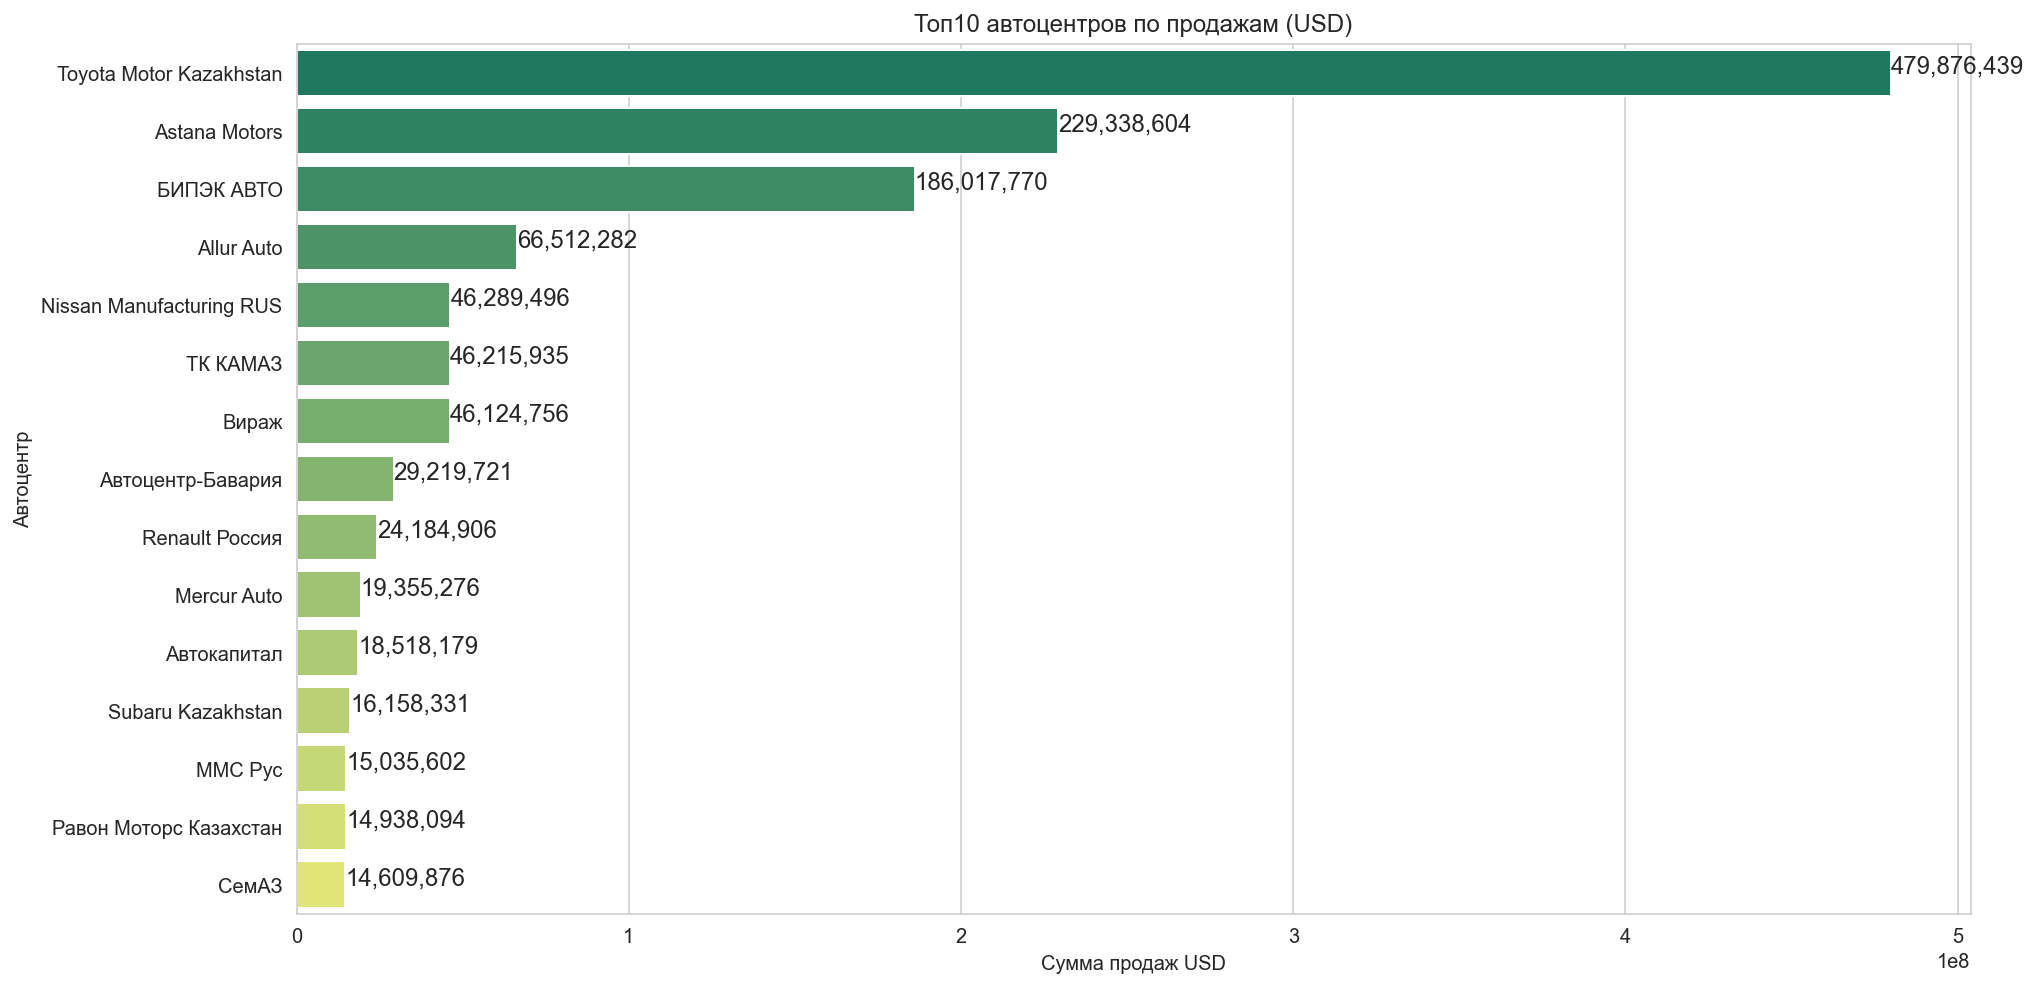

In [126]:
bar_plot(top_company2, 'sell_price_usd_sum', 'company',
         'Топ10 автоцентров по продажам (USD)',
         'Сумма продаж USD',
         'Автоцентр',
         figsize=(15, 8))

По общей выручки Меркур Авто на 10 месте - 19млн.дол. c долей 1.43% от общего рынка, ближайшие конкуренты по обьему продаж:  'Автоцентр-Бавария' 29млн., 'Renault Россия' 24млн, 'Автокапитал' 18млн.

In [127]:
# выручка по маркам средняя
ma_brand = (ma.groupby(['brand'])
            .agg(sell_price_usd_sum = ('sell_price_usd', 'sum'),
                 sell_price_usd_mean = ('sell_price_usd', 'mean'),
                 model_uniq = ('model', 'unique'),
                 count_auto = ('quantity', 'sum')
                )
            .sort_values(by='sell_price_usd_sum', ascending=False)
            .reset_index()
           )
ma_brand['share_sales_%'] = (ma_brand['sell_price_usd_sum'] / ma_brand['sell_price_usd_sum'].sum()) * 100

ma_brand

brand  sell_price_usd_sum  sell_price_usd_mean  \
0  Volkswagen         10182272.86             18891.04   
1     Porsche          5113512.70             98336.78   
2        Audi          4059490.43             78067.12   

                                                                                                        model_uniq  \
0  [Amarok, Jetta, Multivan, Polo, Tiguan, Touareg, Transporter, Transporter Kasten, Teramont, Transporter Kombi ]   
1                                                                        [911 Carrera S, Cayenne, Macan, Panamera]   
2                                                                            [A3, A4, A6, A7, A8, Q5, Q7, Q8, RS5]   

   count_auto  share_sales_%  
0         546          52.61  
1          52          26.42  
2          52          20.97

* По маркам общая выручка Volkswagen-10млн, средняя цена 19тыс; Премиум марки общая выручка Porsche 5млн, средняя цена 98тыс., общая выручка Audi 4млн, средняя цена 78тыс. Премиум марки продаются мало в 10 раз меньше, но стоят в 4-5 раз дороже и за счет этого составляют почти половину сумм продаж.

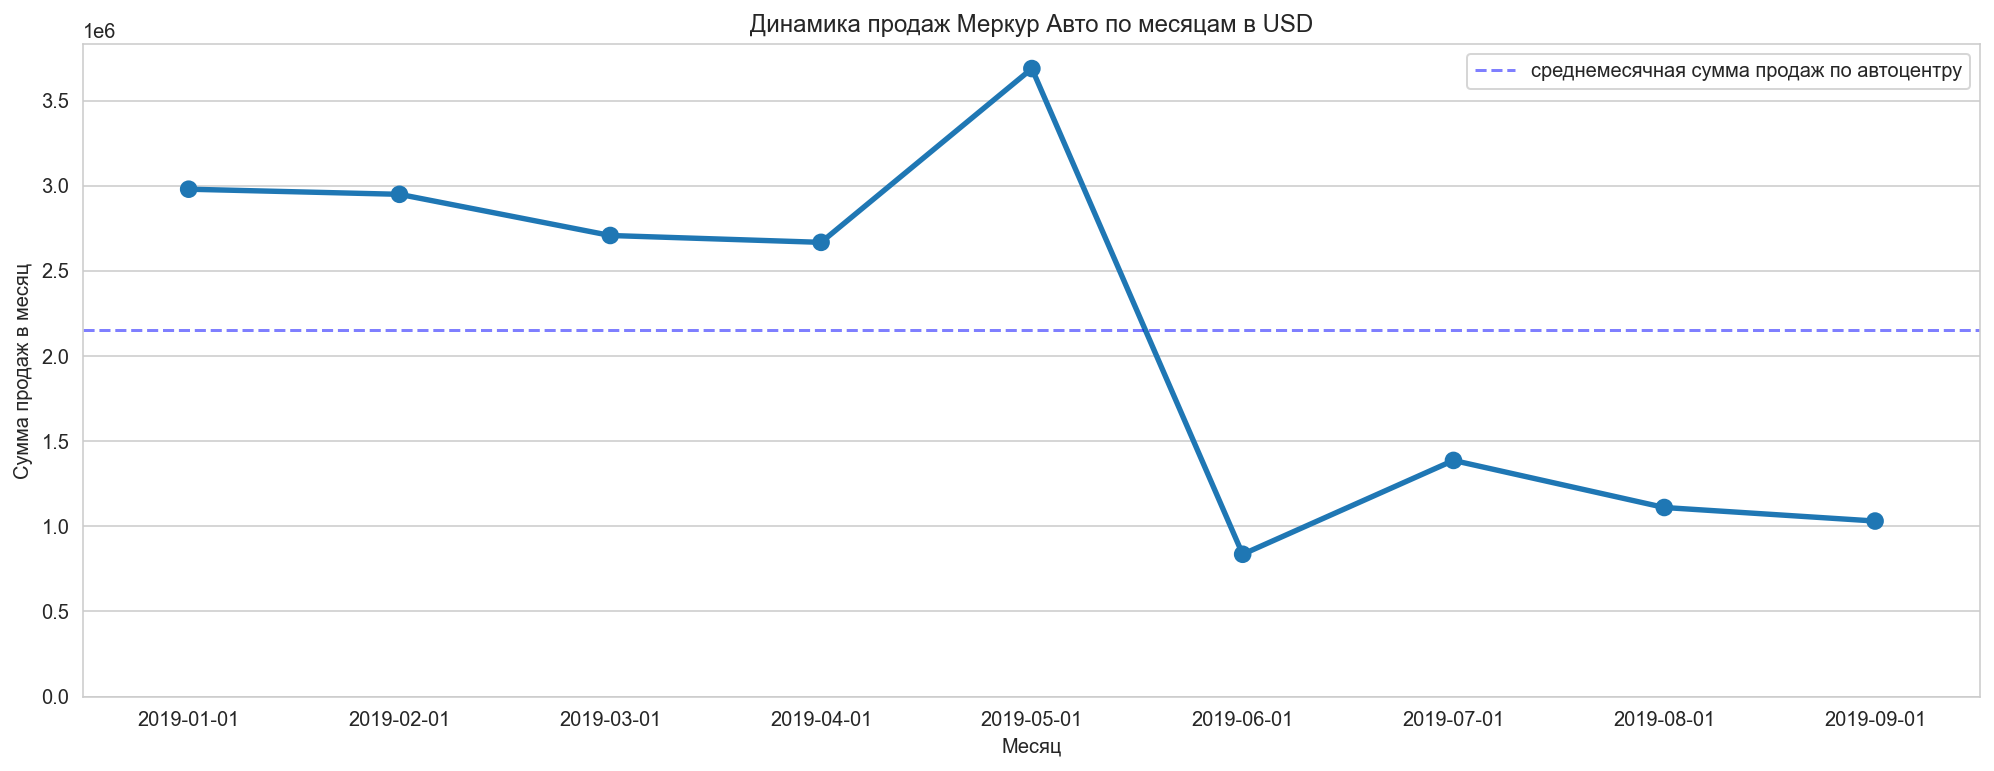

In [128]:
# продажи по месяцам
ma_month = ma.groupby('sale_date')['sell_price_usd'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.pointplot(data=ma_month,
             x='sale_date',
             y='sell_price_usd'
            )
plt.title('Динамика продаж Меркур Авто по месяцам в USD')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.axhline(y=ma_month['sell_price_usd'].mean(), alpha=0.5, linestyle='--', color='blue', label='cреднемесячная сумма продаж по автоцентру' )
plt.legend()
plt.ylim(0)
plt.show()

* По динамине продаж в июне идет сильный спад с 3млн до 1млн и затем не восстанавливается.

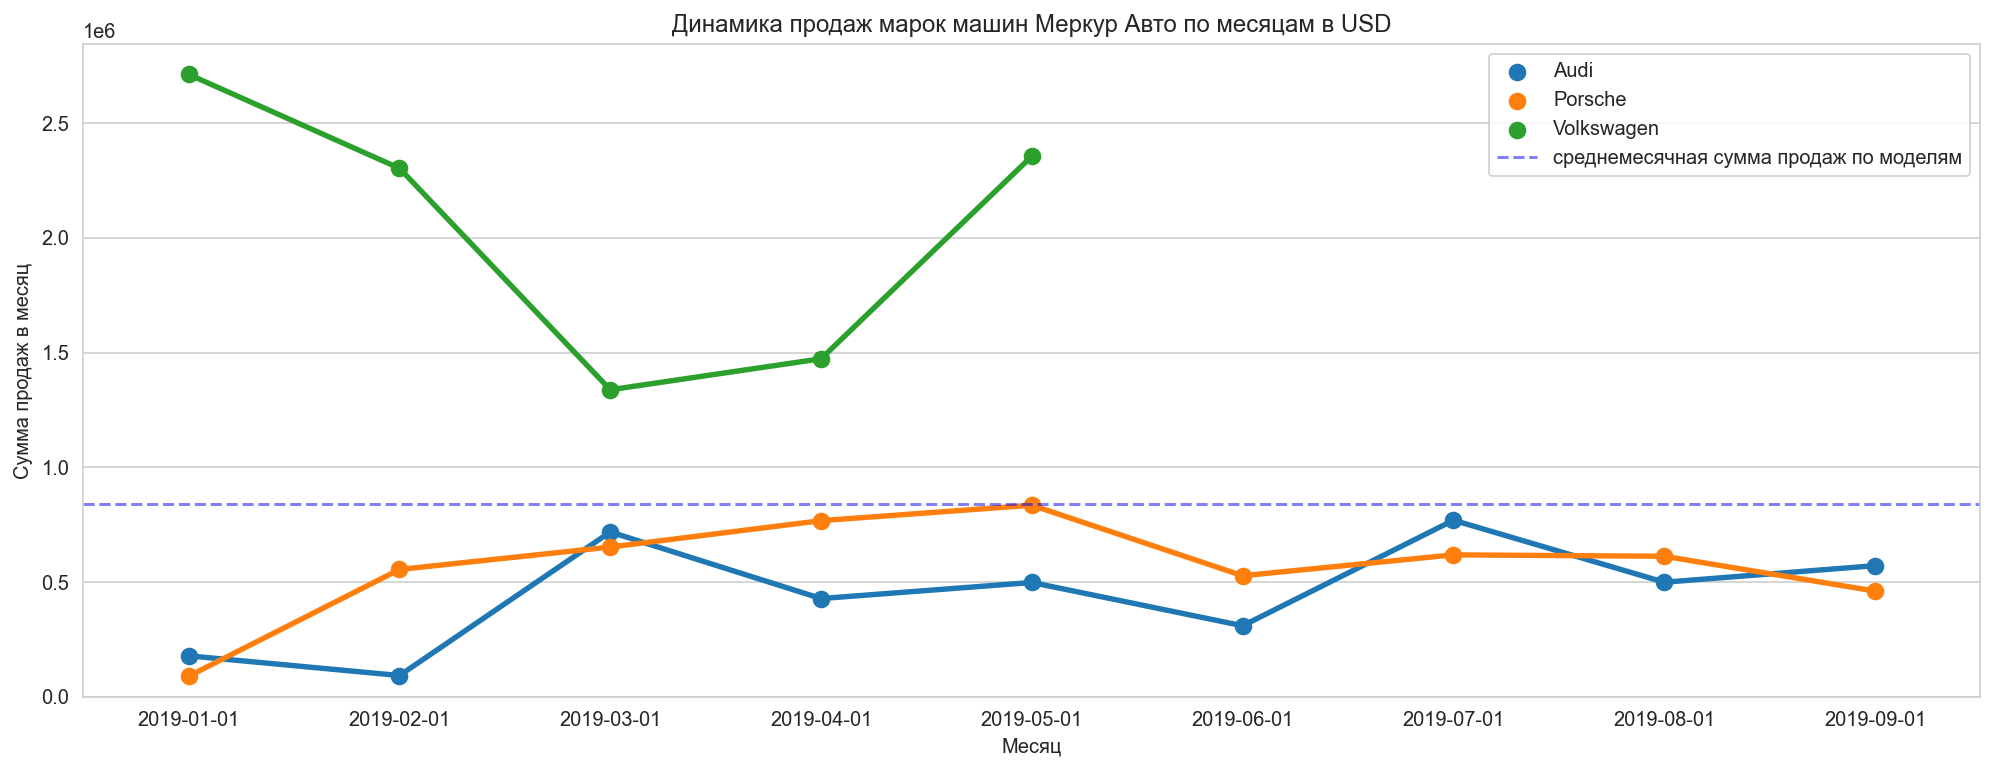

In [129]:
# продажи по месяцам
ma_month_brand = ma.groupby(['sale_date', 'brand'])['sell_price_usd'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.pointplot(data=ma_month_brand,
             x='sale_date',
             y='sell_price_usd',
             hue='brand'
            )
plt.title('Динамика продаж марок машин Меркур Авто по месяцам в USD')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.axhline(y=ma_month_brand['sell_price_usd'].mean(), alpha=0.5, linestyle='--', color='blue', label='cреднемесячная сумма продаж по моделям' )
plt.legend()
plt.ylim(0)
plt.show()

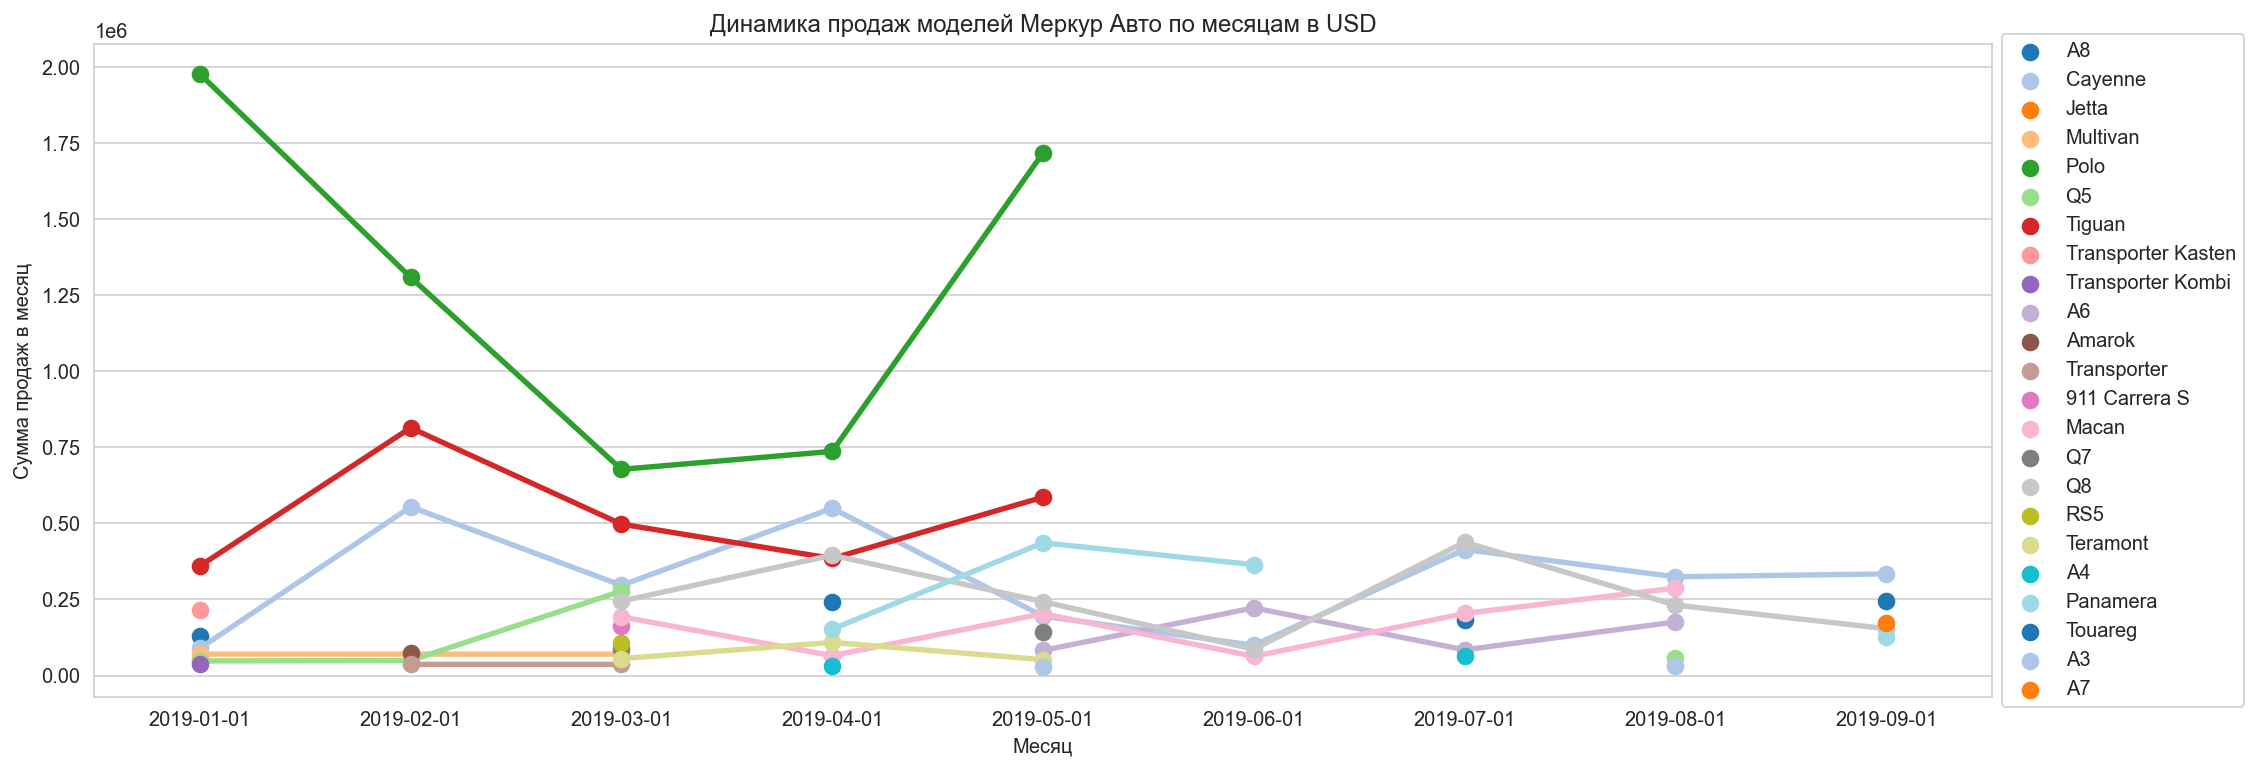

In [130]:
# продажи по месяцам
ma_month_model = ma.groupby(['sale_date', 'model'])['sell_price_usd'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.pointplot(data=ma_month_model,
             x='sale_date',
             y='sell_price_usd',
             hue='model',
             palette='tab20'
            )
plt.title('Динамика продаж моделей Меркур Авто по месяцам в USD')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

* Что то случилось с Volkswagen у Меркур авто? перестали их продавать начиная с июня, а Volkswagen это 52% их продаж за 9мес а если считать за 5 месяцев то доля будет значительно больше половины. В топе продаж по месяцам как раз были Volkswagen [Polo, Tiguan].

In [131]:
# посмотрим на долю прожаж моделей, корректнее всего смотреть с 1 по 5 месяц
start_date = datetime.strptime("2019-01-01", "%Y-%m-%d").date()
end_date = datetime.strptime("2019-05-01", "%Y-%m-%d").date()

ma_model_share = (ma.query('(sale_date >= @start_date) & (sale_date <= @end_date)')
                  .groupby(['model'])['sell_price_usd'].sum().sort_values(ascending=False).reset_index()
                 )
ma_model_share['%'] = ma_model_share['sell_price_usd'] / ma_model_share['sell_price_usd'].sum() * 100
ma_model_share.head(10)

model  sell_price_usd     %
0      Polo      6418764.24 42.82
1    Tiguan      2642563.72 17.63
2   Cayenne      1684275.46 11.23
3        Q8       882592.00  5.89
4  Panamera       588572.59  3.93
5     Macan       461350.57  3.08
6        Q5       374513.92  2.50
7   Touareg       242552.31  1.62
8        Q7       233073.00  1.55
9  Teramont       216315.33  1.44

* Volkswagen Polo занимал долю 43% продаж за 5 месяцев, Volkswagen Tiguan -17% продаж.

### 5.2 Продажи по регионам: общие, по маркам

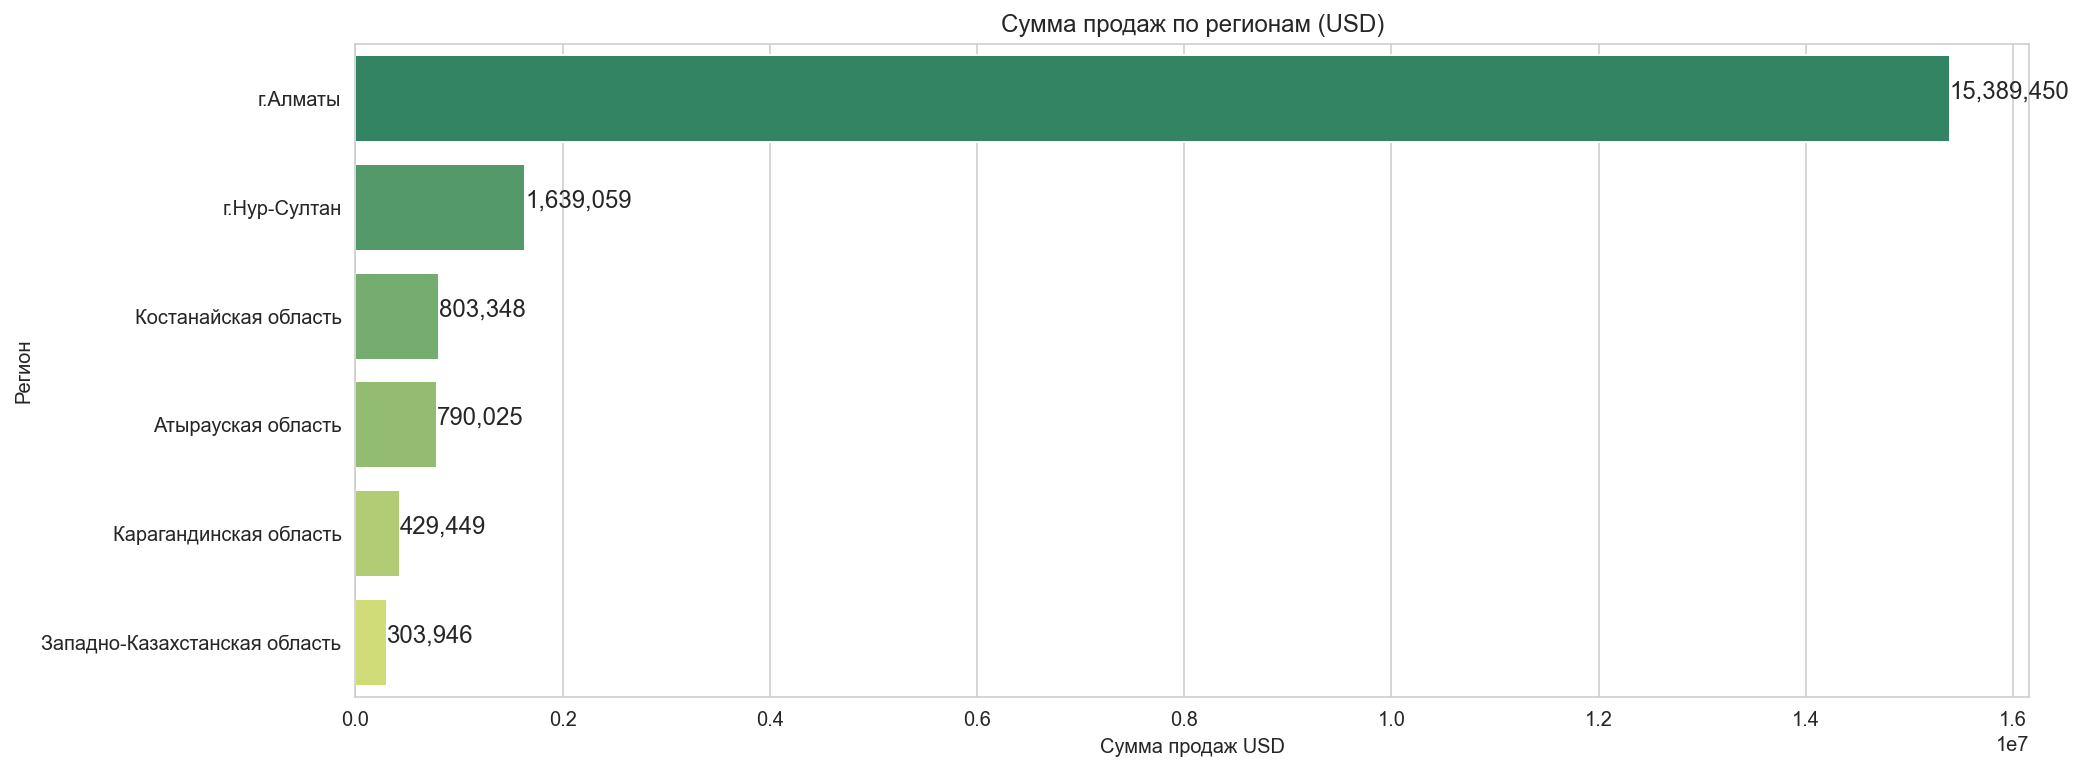

In [132]:
# продажи по регионам
ma_reg = ma.groupby(['state'])['sell_price_usd'].sum().sort_values(ascending=False).reset_index()
bar_plot(ma_reg, 'sell_price_usd', 'state',
         'Сумма продаж по регионам (USD)',
         'Сумма продаж USD',
         'Регион',
         figsize=(15, 6))

* Алматы самый топовый регион по продажам 15млн, Нур-Султан 1,6млн, остальные меньше 1млн.

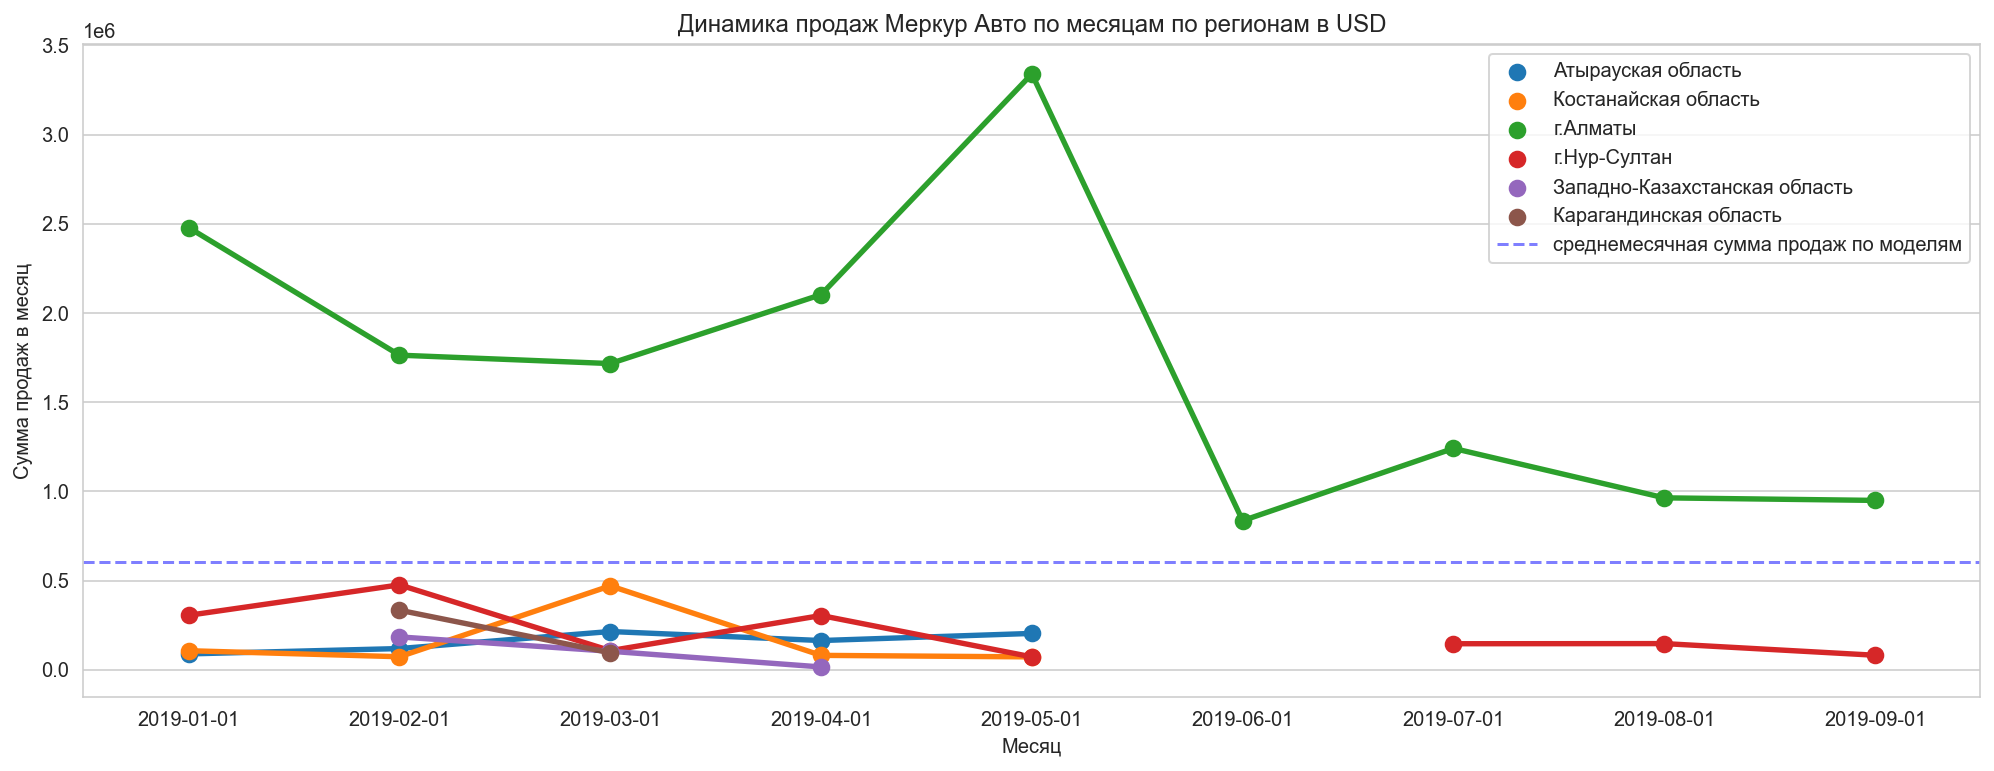

In [133]:
# продажи по регионам по месяцам
ma_reg_month = ma.groupby(['sale_date', 'state'])['sell_price_usd'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.pointplot(data=ma_reg_month,
             x='sale_date',
             y='sell_price_usd',
             hue='state'
            )
plt.title('Динамика продаж Меркур Авто по месяцам по регионам в USD')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.axhline(y=ma_reg_month['sell_price_usd'].mean(), alpha=0.5, linestyle='--', color='blue', label='cреднемесячная сумма продаж по моделям' )
plt.legend()
plt.show()

* С июня продажи сильно упали в ~2 раза в регионе Алматы. Совсем ушли продажи из областей: Костанайская обл., Атырауская обл., Западно-Казахстанская, Карагандинская (закрылись офисы? или там продавали Фольцваген или возникли проблемы с поставками?).

### 5.3 Конкурентный анализ

In [134]:
# посмотрим на Бренды и модели произведенных в Германии
#df2.query('manufacturing_country == "Германия"').brand.value_counts()
df2.query('manufacturing_country == "Германия"').groupby(['brand', 'model'])['manufacturing_country'].value_counts().sort_values(ascending=False)

brand                 model               manufacturing_country
BMW                   5 серия             Германия                 29
Porsche               Cayenne             Германия                 28
Audi                  Q8                  Германия                 20
Porsche               Macan               Германия                 15
Mercedes-Benz         E-Class             Германия                 15
Volkswagen            Caravelle           Германия                 13
BMW                   X1                  Германия                 12
Volkswagen            Transporter Kasten  Германия                 11
                      Amarok              Германия                  9
Porsche               Panamera            Германия                  8
Audi                  A6                  Германия                  8
Volkswagen            Multivan            Германия                  8
Mercedes-Benz Trucks  Actros              Германия                  8
Audi                  Q5  

В основном в Германии произведены редкие марки или премиум марки.

In [135]:
# что то мало произведено в Германии
# посмотрим стран производителей по моделям
ma.groupby(['model', 'manufacturing_country'])['quantity'].sum().sort_values(ascending=False)

model               manufacturing_country
Polo                Российская Федерация     440
Tiguan              Российская Федерация      81
Cayenne             Германия                  28
Q8                  Германия                  20
Macan               Германия                  15
Panamera            Германия                   8
Q5                  Германия                   8
A6                  Германия                   8
Transporter Kasten  Германия                   7
A8                  Германия                   5
Teramont            Российская Федерация       3
Q7                  Германия                   3
A4                  Германия                   3
Touareg             Российская Федерация       3
Jetta               Российская Федерация       3
Multivan            Германия                   3
A3                  Германия                   2
Amarok              Германия                   2
A7                  Германия                   2
Transporter         Германи

Все Volkswagen Polo, Tiguan произведены в РФ.

In [136]:
# посмотрим компании, которые продают Volkswagen, и их продажи
volk = (df2.query('brand == "Volkswagen"').groupby(['company'])
        .agg(sell_price_usd_sum = ('sell_price_usd', 'sum'),
              quantity_sum = ('quantity', 'sum'))
       ).sort_values(by='sell_price_usd_sum', ascending=False).reset_index()
volk

company  sell_price_usd_sum  quantity_sum
0       Volkswagen Group Rus         13663264.42           664
1                Mercur Auto         10182272.86           546
2         Автодом Motors KST          1064732.01            53
3              Автомир-Центр           660552.90            34
4  ТОО "Eurasia Motor Zhaik"           320037.58            15

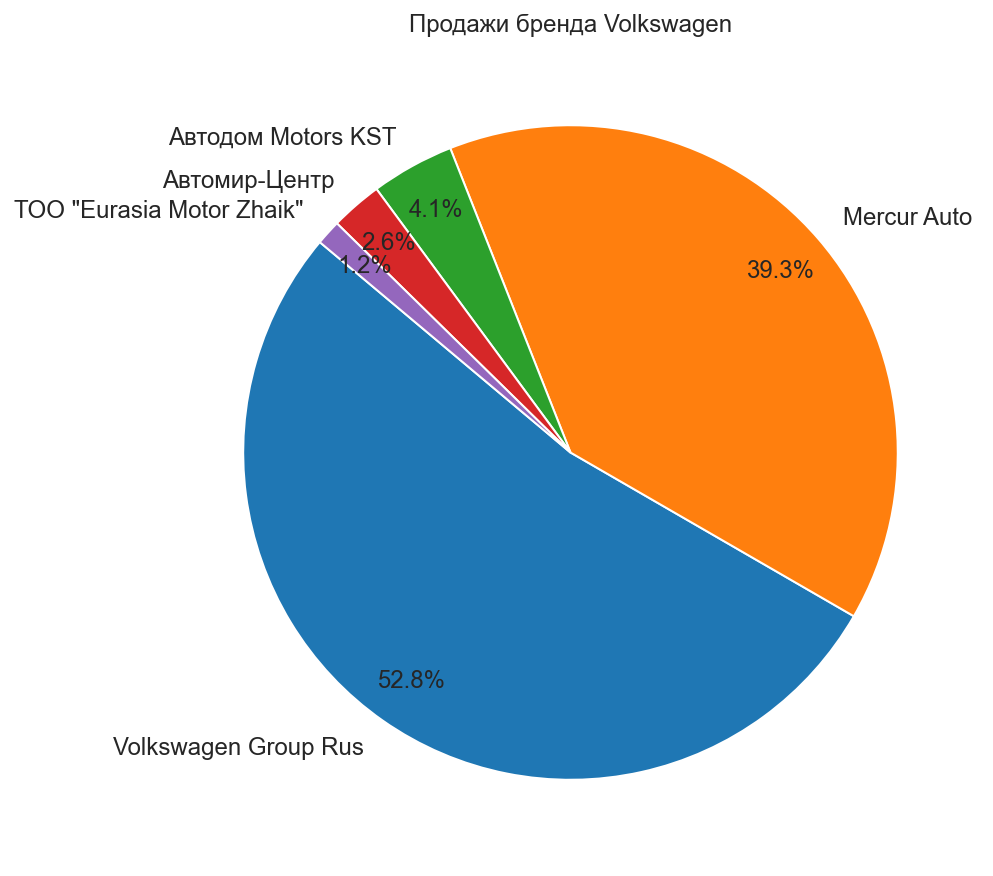

In [137]:
plt.figure(figsize=(7, 7))
plt.pie(volk['sell_price_usd_sum'],
        labels=volk['company'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 12},
        pctdistance=0.85, # расстояние между центром и процентами
        labeldistance=1.1 # расстояние между центром и метками labels
       )
plt.title('Продажи бренда Volkswagen')
plt.tight_layout()
plt.show()

У Mercur Auto 40% рынка Volkswagen, но есть еще компания Volkswagen Group Rus (официальный производитель завод из России) у неё 53% рынка продаж Volkswagen в Казахстане.

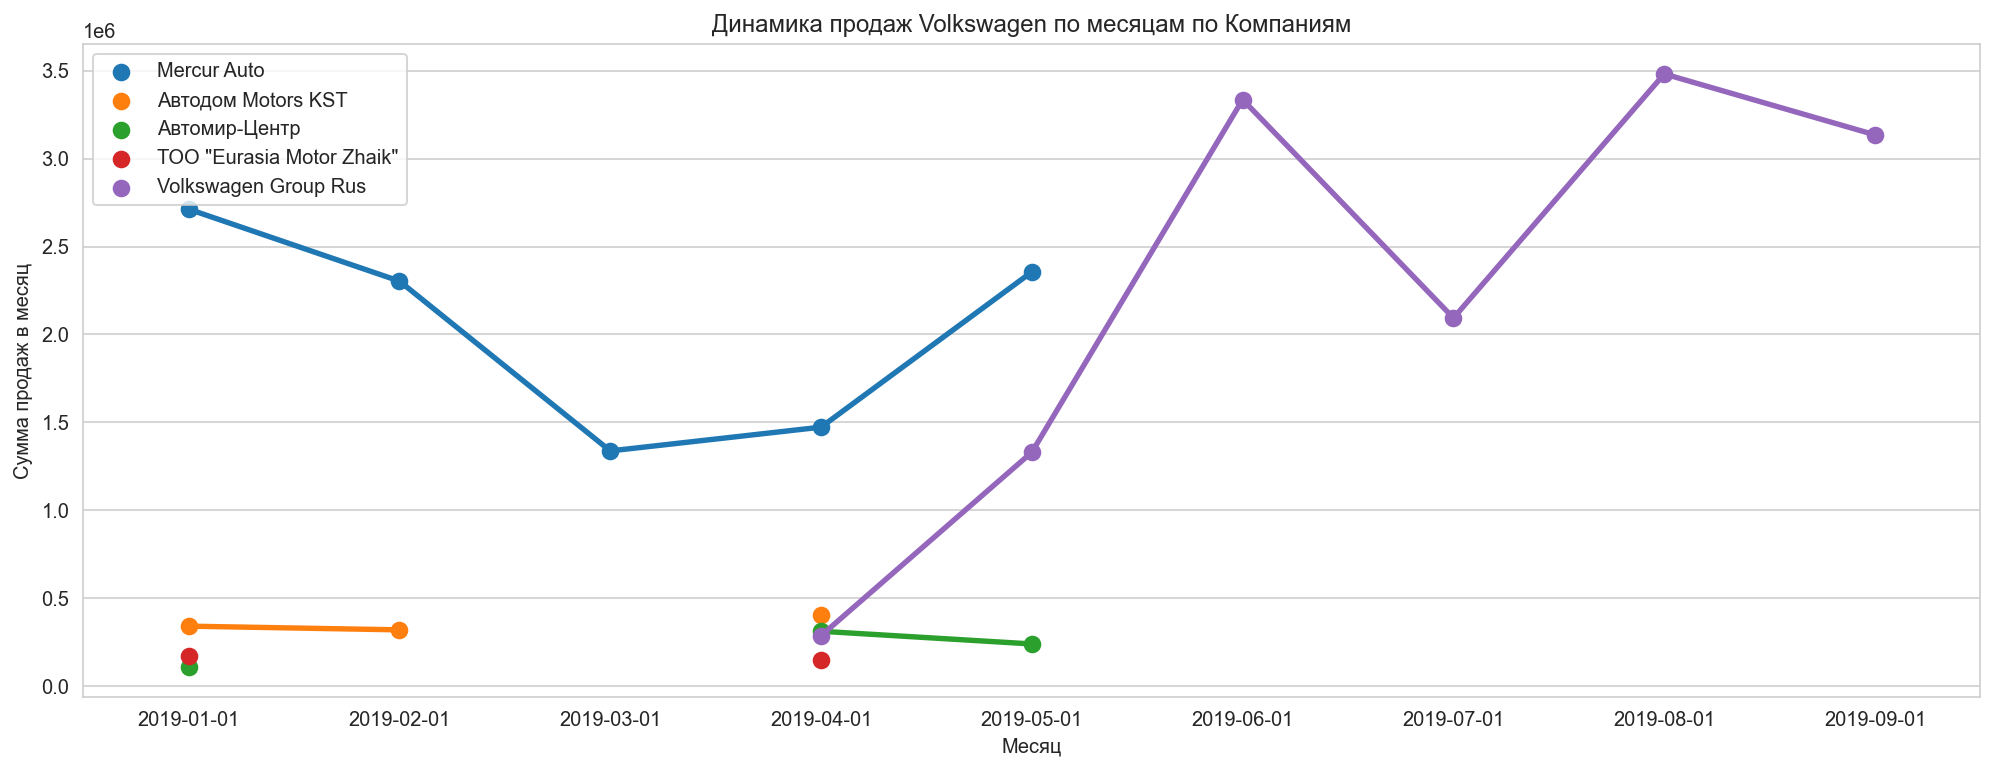

In [138]:
# посмотрим на продажи по месяцам
volk_month = (df2.query('brand == "Volkswagen"')
              .groupby(['sale_date', 'company'])['sell_price_usd'].sum().reset_index())
plt.figure(figsize=(17, 6))
sns.pointplot(data=volk_month,
             x='sale_date',
             y='sell_price_usd',
             hue='company'
            )
plt.title('Динамика продаж Volkswagen по месяцам по Компаниям')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.legend()
plt.show()

Ситуация такова, что завод производитель "Volkswagen Group Rus" решил забрать у всех диллеров поставки и продавать всё самостоятельно. У "Mercur Auto" и других закончились совсем продажи Volkswagen, а у "Volkswagen Group Rus" возросли многократно.

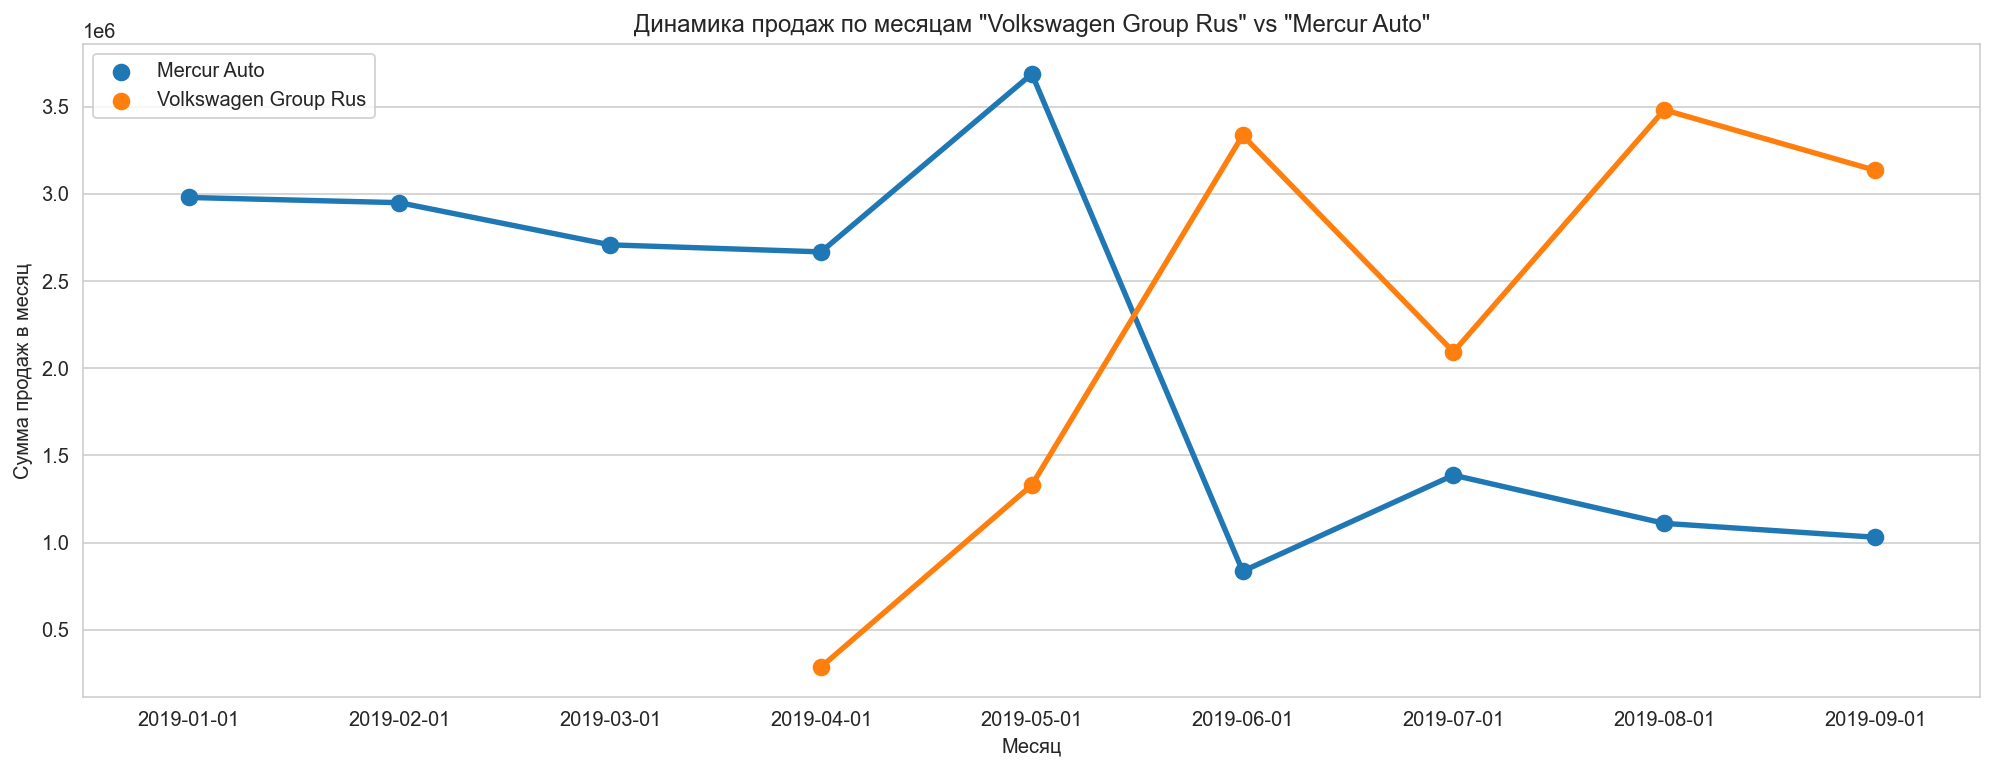

In [139]:
# посмотрим на общие продажи по месяцам
volk_month_vs = (df2.query('company == "Volkswagen Group Rus" | company == "Mercur Auto"')
              .groupby(['sale_date', 'company'])['sell_price_usd'].sum().reset_index())
plt.figure(figsize=(17, 6))
sns.pointplot(data=volk_month_vs,
             x='sale_date',
             y='sell_price_usd',
             hue='company'
            )
plt.title('Динамика продаж по месяцам "Volkswagen Group Rus" vs "Mercur Auto"')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж в месяц')
plt.legend()
plt.show()

Подтверждает предыдущий вывод.

In [140]:
# где можно купить еще Audi, Porsche давайте посмотрим
# посмотрим на продажи по месяцам
audi_por = (df2.query('brand == "Audi" | brand == "Porsche"')
              .groupby(['sale_date', 'company'])['sell_price_usd'].sum().reset_index())
audi_por

sale_date      company  sell_price_usd
0  2019-01-01  Mercur Auto       266770.80
1  2019-02-01  Mercur Auto       646168.73
2  2019-03-01  Mercur Auto      1369919.67
3  2019-04-01  Mercur Auto      1194529.88
4  2019-05-01  Mercur Auto      1331817.00
5  2019-06-01  Mercur Auto       835751.00
6  2019-07-01  Mercur Auto      1386826.00
7  2019-08-01  Mercur Auto      1110374.04
8  2019-09-01  Mercur Auto      1030846.00

"Mercur Auto" является эксклюзивным поставщиком премиум сегмента Audi, Porsche.

Volkswagen Polo занимал долю 43% продаж за 5 месяцев, Volkswagen Tiguan -17% продаж. Давайте посмотрим альтернативы подобных характеристик этих моделей

In [141]:
# отберем поло, посмотрим тех. характетистики этой модели, занесем в фильтр наиболее популярные
polo = df2.query('brand == "Volkswagen" & model == "Polo"')

columns = ['fuel_type', 'engine_volume', 'engine_volume_cat', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013']
for column in columns:
    display(polo[column].value_counts().reset_index().T)

0
index      Бензин
fuel_type     544

0    1    2
index           1.60 2.00 8.70
engine_volume 512.00 3.00 1.00

0     1            2
index              2_(>1.5:<=2.0)  #Н/Д  6_(>4:<=10)
engine_volume_cat             515    28            1

0   1
index               АТ  МТ
transmission_type  426  90

0       1    2    3
index       #Н/Д  FF_FWD  2WD  4WD
drive_type   361     103   77    3

0
index         Легковые автомобили
segment_2013                  544

0
index       B класс
class_2013      544

In [142]:
# отберем тигуан, посмотрим тех. характетистики этой модели, занесем в фильтр наиболее популярные
tiguan = df2.query('brand == "Volkswagen" & model == "Tiguan"')

columns = ['fuel_type', 'engine_volume', 'engine_volume_cat', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013']
for column in columns:
    display(tiguan[column].value_counts().reset_index().T)

0
index      Бензин
fuel_type     130

0     1    2
index          2.00  1.40 1.60
engine_volume 77.00 25.00 2.00

0     1          2
index              2_(>1.5:<=2.0)  #Н/Д  1_(<=1.5)
engine_volume_cat              79    26         25

0
index               АТ
transmission_type  104

0    1
index       4WD  2WD
drive_type  129    1

0
index         Внедорожники
segment_2013           130

0
index       Компактные SUV
class_2013             130

In [143]:
df2.segment_2013.value_counts()

Внедорожники               17925
Легковые автомобили        16330
Коммерческие автомобили     4328
Пикапы                       974
Минивэны                     402
Name: segment_2013, dtype: int64

In [144]:
# посмотрим модели похожих на поло
like_polo = df2.query('fuel_type == "Бензин" &\
                      (engine_volume >= 1.5) & (engine_volume <= 1.7) &\
                      transmission_type == "АТ" &\
                      segment_2013 == "Легковые автомобили" &\
                      (class_2013 == "B класс" | class_2013 == "C класс") \
                      ')
like_polo.groupby(['brand', 'model'])['class_2013'].value_counts().sort_values(ascending=False).reset_index

<bound method Series.reset_index of brand       model     class_2013
Hyundai     Accent    B класс       2178
            Elantra   C класс       1564
Ravon       Nexia R3  B класс        858
Volkswagen  Polo      B класс        423
Lada        Granta    B класс        233
Kia         Rio       B класс        182
Toyota      Corolla   C класс        124
Kia         Cerato    C класс         99
Lada        Vesta     B класс         95
Skoda       Octavia   C класс         73
Ravon       R4        B класс         68
Skoda       Rapid     B класс         44
Nissan      Almera    C класс         17
Chevrolet   Aveo      B класс          4
Peugeot     301       B класс          3
Lada        Kalina    B класс          3
Volkswagen  Jetta     C класс          2
Mini        Hatch     B класс          2
Ford        Fiesta    B класс          1
Name: class_2013, dtype: int64>

* В случае если "Mercur Auto" будет заключать договора с новым поставщиками, то подобную нишу Polo могут заменить: Hyundai Accent, Hyundai Elantra, Ravon Nexia R3.

In [145]:
# посмотрим на модели Audi, Porsche которые близки к Polo / Tiguan

# функция для вычисления моды
def mode_f(x):
    return x.mode().iloc[0] if not x.empty else None

audi_porsche = df2.query('brand == "Audi" | brand == "Porsche"')
columns = ['fuel_type', 'engine_volume', 'engine_volume_cat', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013']
# сгруппируем по моделям и посмотрим тех. характетистики каждой модели по моде
audi_porsche_model = (audi_porsche.groupby(['brand', 'model'])
                      .agg(count_sum = ('quantity', 'sum'),
                           price_usd_last = ('price_usd', 'last'),
                           sell_price_usd_sum = ('sell_price_usd', 'sum'),
                           fuel_type_mode = ('fuel_type', mode_f),
                           engine_volume_mode = ('engine_volume', mode_f),
                           engine_volume_cat_mode = ('engine_volume_cat', mode_f),
                           transmission_type_mode = ('transmission_type', mode_f),
                           drive_type_mode = ('drive_type', mode_f),
                           segment_2013_mode = ('segment_2013', mode_f),
                           class_2013_mode = ('class_2013', mode_f)
                          )
                     ).sort_values(by='sell_price_usd_sum', ascending=False)
audi_porsche_model

count_sum  price_usd_last  sell_price_usd_sum  \
brand   model                                                          
Porsche Cayenne               28       100277.00          2856255.46   
Audi    Q8                    20        81500.00          1793118.33   
Porsche Panamera               8       126037.00          1079061.59   
        Macan                 15        66938.00          1015619.57   
Audi    A6                     8        88028.63           607692.51   
        A8                     5       124300.00           557799.21   
        Q5                     8        58723.47           433237.39   
        Q7                     3        72215.00           233073.00   
        A7                     2        79500.00           171100.00   
Porsche 911 Carrera S          1       162576.08           162576.08   
Audi    RS5                    1       107250.00           107250.00   
        A4                     3        31929.00            95858.00   
        A3                     2        32246.99            60361.99   

                      fuel_type_mode  engine_volume_mode  \
brand   model                                              
Porsche Cayenne               Бензин                3.00   
Audi    Q8                    Бензин                3.00   
Porsche Panamera              Бензин                3.00   
        Macan                 Бензин                2.00   
Audi    A6                    Бензин                3.00   
        A8                    Бензин                3.00   
        Q5                    Бензин                2.00   
        Q7                    Бензин                3.00   
        A7                    Бензин                3.00   
Porsche 911 Carrera S         Бензин                3.00   
Audi    RS5                   Бензин                2.90   
        A4                    Бензин                1.40   
        A3                    Бензин                1.40   

                      engine_volume_cat_mode transmission_type_mode  \
brand   model                                                         
Porsche Cayenne               4_(>2.5:<=3.0)                     АТ   
Audi    Q8                    4_(>2.5:<=3.0)                     АТ   
Porsche Panamera              4_(>2.5:<=3.0)                     АТ   
        Macan                 2_(>1.5:<=2.0)                     АТ   
Audi    A6                    4_(>2.5:<=3.0)                     АТ   
        A8                    4_(>2.5:<=3.0)                     АТ   
        Q5                    2_(>1.5:<=2.0)                     АТ   
        Q7                    4_(>2.5:<=3.0)                     АТ   
        A7                    4_(>2.5:<=3.0)                     АТ   
Porsche 911 Carrera S         4_(>2.5:<=3.0)                     АТ   
Audi    RS5                   4_(>2.5:<=3.0)                     АТ   
        A4                         1_(<=1.5)                     АТ   
        A3                         1_(<=1.5)                     АТ   

                      drive_type_mode    segment_2013_mode  \
brand   model                                                
Porsche Cayenne                   4WD         Внедорожники   
Audi    Q8                        4WD         Внедорожники   
Porsche Panamera                  4WD  Легковые автомобили   
        Macan                     4WD         Внедорожники   
Audi    A6                        4WD  Легковые автомобили   
        A8                        4WD  Легковые автомобили   
        Q5                        4WD         Внедорожники   
        Q7                        4WD         Внедорожники   
        A7                        4WD  Легковые автомобили   
Porsche 911 Carrera S             4WD  Легковые автомобили   
Audi    RS5                       4WD  Легковые автомобили   
        A4                     FF_FWD  Легковые автомобили   
        A3                     FF_FWD  Легковые автомобили   

                             class_2013_mode

* Премиум сегменте Audi Porsche немного другая расстановка, больше всего популярны Внедорожники: Audi Q8 Q5 Q7, Porsche Cayenne/Macan, среди легковых популярны: Porsche Panamera, Audi A6 A8. Среди легковых авто у Audi Porsche почти нет похожих на Polo 1.6 потому что все в топе это 3.0л и все полный привод 4WD. На Tiguan 2.0 Компактные SUV больше всего похожи: Audi Q5 2.0 по хорошей цене и Macan 2.0.

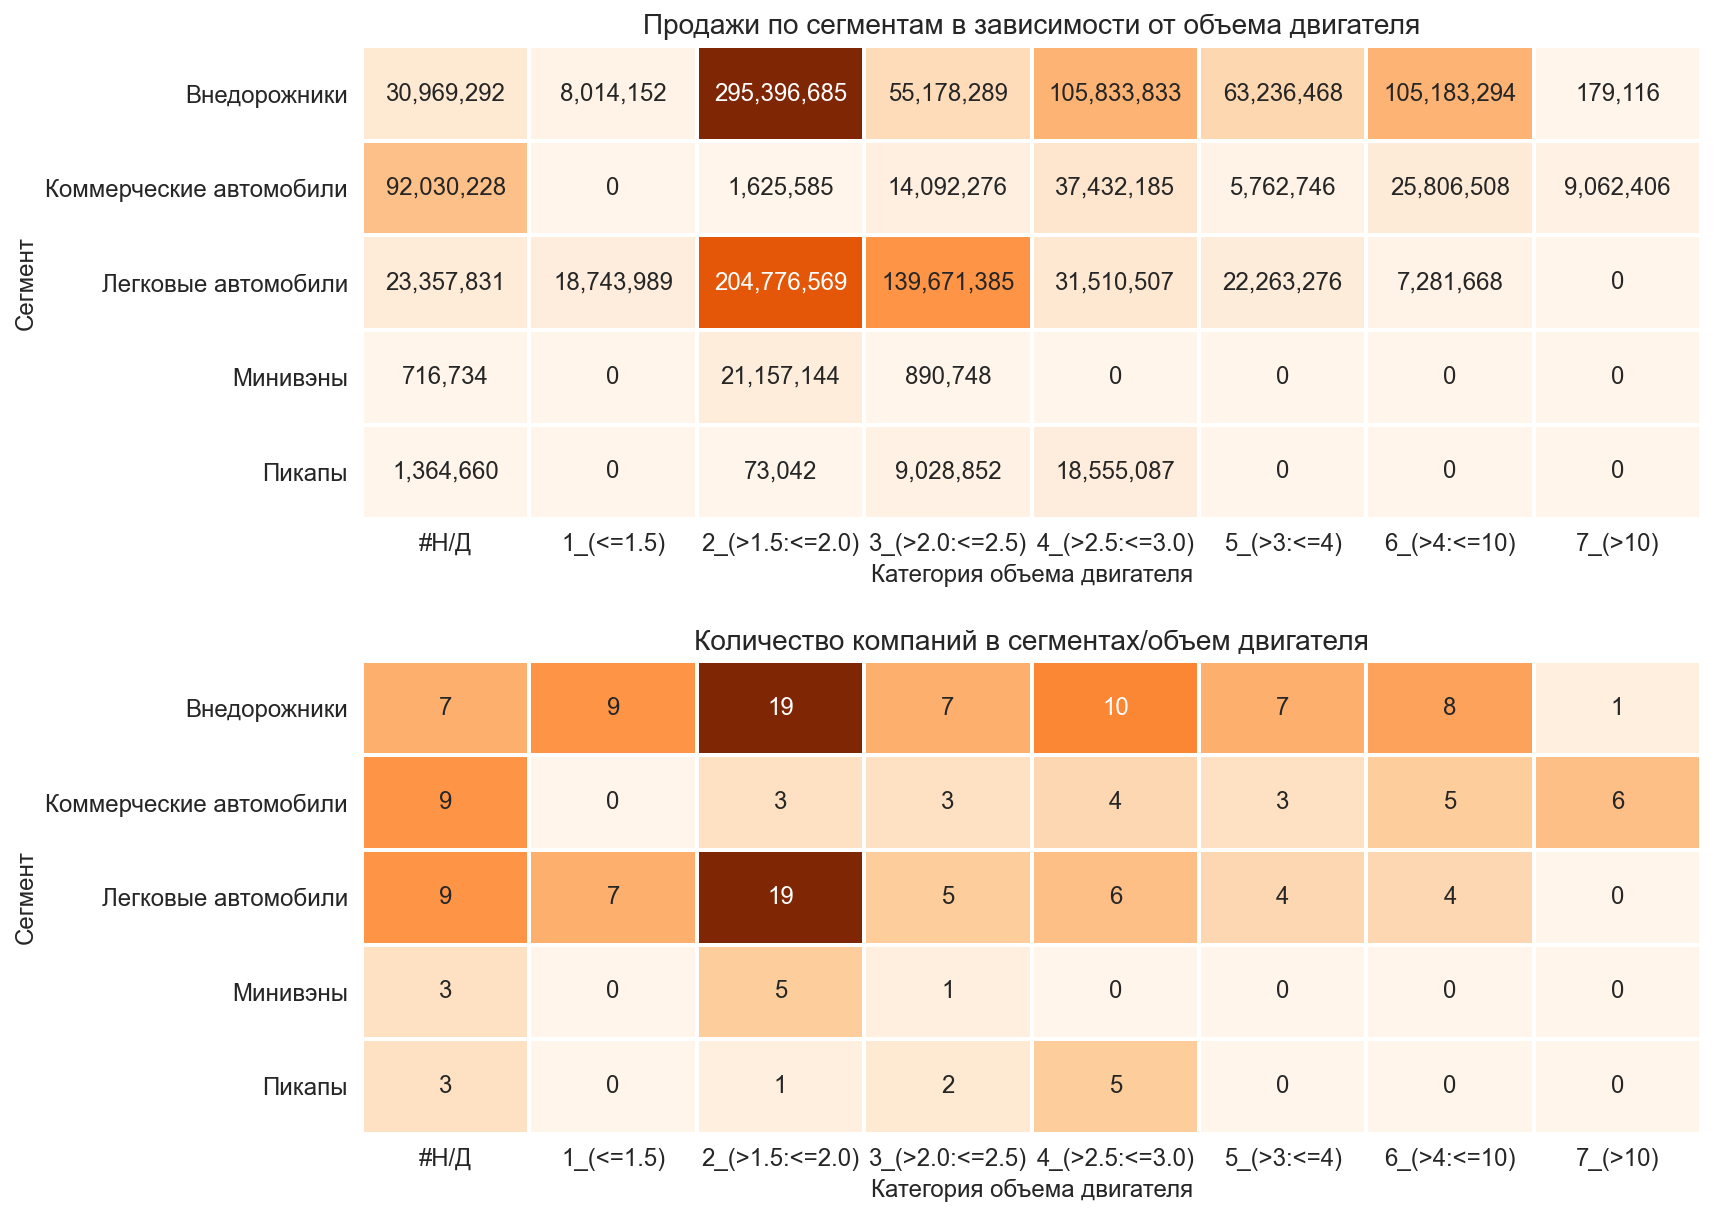

In [146]:
# давайте посмотрим еще раз (из п.4.3) как в на общие продажи по тех.хар-кам и на кол-во конкурентов

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
# продажи
sns.heatmap(seg_vol_e, annot=True, cmap='Oranges', fmt=',.0f', linewidths=2, cbar=False, annot_kws={"fontsize":12}, ax=axes[0])
axes[0].set_title('Продажи по сегментам в зависимости от объема двигателя', fontsize=14)
axes[0].set_xlabel('Категория объема двигателя', fontsize=12)
axes[0].set_ylabel('Сегмент', fontsize=12)
axes[0].tick_params(axis='both', labelsize=12)

plt.subplots_adjust(hspace=0.3)

# кол-во конкурентов
sns.heatmap(seg_vol_n, annot=True, cmap='Oranges', fmt=',.0f', linewidths=2, cbar=False, annot_kws={"fontsize":12}, ax=axes[1])
axes[1].set_title('Количество компаний в сегментах/объем двигателя', fontsize=14)
axes[1].set_xlabel('Категория объема двигателя', fontsize=12)
axes[1].set_ylabel('Сегмент', fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)
plt.show()

* В самых прибыльных сегментах высокая конкуренция. Наши имеющиеся сегменты: Легковые 4_(>2.5:<=3л) но тут малый объем, и Внедорожники 2_(>1,5:<=2.0), 4_(>2.5:<=3л). По внедорожниками можно побороться за большой объем, по легковым скорее всего меньше объем будет.

### 5.4 BCG анализ (анализ продаж по моделям)

In [147]:
# посмотрим на топовые продажи моделей
ma_model_sell = (ma.groupby(['brand', 'model'])
                 .agg(count_sum = ('quantity', 'sum'),
                      sell_price_usd_sum = ('sell_price_usd', 'sum'))
                 ).sort_values(by='sell_price_usd_sum', ascending=False)
ma_model_sell

count_sum  sell_price_usd_sum
brand      model                                            
Volkswagen Polo                      440          6418764.24
Porsche    Cayenne                    28          2856255.46
Volkswagen Tiguan                     81          2642563.72
Audi       Q8                         20          1793118.33
Porsche    Panamera                    8          1079061.59
           Macan                      15          1015619.57
Audi       A6                          8           607692.51
           A8                          5           557799.21
           Q5                          8           433237.39
Volkswagen Touareg                     3           242552.31
Audi       Q7                          3           233073.00
Volkswagen Teramont                    4           216315.33
           Transporter Kasten          7           214890.34
           Multivan                    3           211161.32
Audi       A7                          2           171100.00
Porsche    911 Carrera S               1           162576.08
Audi       RS5                         1           107250.00
           A4                          3            95858.00
Volkswagen Amarok                      2            73041.55
           Transporter                 2            73029.08
Audi       A3                          2            60361.99
Volkswagen Jetta                       3            53434.20
           Transporter Kombi           1            36520.77

In [148]:
# дф BSG
bcg_df = ma.groupby(['model', 'sale_date'])['sell_price_usd'].sum().reset_index()
# % продаж модели от всех продаж
bcg_df['perc_total'] = bcg_df.groupby('model')['sell_price_usd'].transform('sum') / bcg_df.sell_price_usd.sum() * 100
# прирост продаж/цены %, последняя сумма продажи / первую сумму продажи.
bcg_df['grow'] = bcg_df.groupby('model')['sell_price_usd'].transform('last') / bcg_df.sort_values(by='sale_date').groupby('model')['sell_price_usd'].transform('first') * 100
# сумма продаж по модели
bcg_df['total'] = bcg_df.groupby('model')['sell_price_usd'].transform('sum')

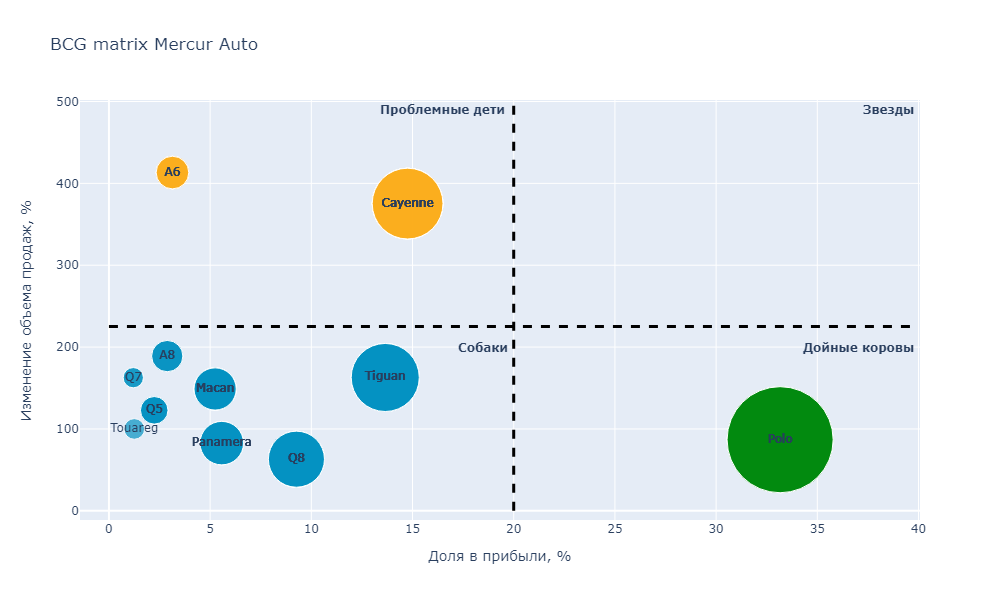

In [149]:
# цвет кругов в зависимости от квадранта
color_scheme = ["#0492C2"] * 11
color_scheme[5] = '#028A0F'
color_scheme[0], color_scheme[2] = '#FCAE1E', '#FCAE1E'

fig = px.scatter(bcg_df[bcg_df.perc_total > 1.2], # почистим от совсем слабых моделей
                 x="perc_total", y="grow",
                 size="total", color="model",
                 size_max=75,
                 text='model',
                 color_discrete_sequence=color_scheme,
                 title="BCG matrix Mercur Auto",
                 width=1000, height=600)

# добавим квадранты матрицы
fig.add_shape(type='line', x0=0, y0=225, x1=40, y1=225, line=dict(color='black', dash='dash', width=3))
fig.add_shape(type='line', x0=20, y0=0, x1=20, y1=500, line=dict(color='black', dash='dash', width=3))

# добавим подписи квадртантов
fig.add_annotation(x=18.5, y=200, text="<b>Собаки</b>", showarrow=False)
fig.add_annotation(x=16.5, y=490, text="<b>Проблемные дети</b>", showarrow=False)
fig.add_annotation(x=38.5, y=490, text="<b>Звезды</b>", showarrow=False)
fig.add_annotation(x=37, y=200, text="<b>Дойные коровы</b>", showarrow=False)

# уберем легенду
fig.update_layout(showlegend=False, xaxis_title="Доля в прибыли, %", yaxis_title="Изменение объема продаж, %")

fig.show()

* По матрице BSG выделены категории/рекомендации:
    1. Собаки (распродать, ликвидировать): все остальные модели.
    2. Дети(возможные будушие звезды, решить стоит ли инвестировать): Porsche Cayenne, Audi A6. Это вообще единственные модели на которые можно сделать ставку на будущее, надо вкладываться в их продвижение и пиар.
    3. Звезды (будущие коровы, вкладывать, развивать, отражать конкурентов): их нет.
    4. Коровы (минимизировать вложения, удерживать позиции, пожинать плоды): Volkswagen Polo. Корову украли.
    
* Итог: По матрице BSG надо инвестировать в продвижение и пиар моделей: Porsche Cayenne, Audi A6.

### 5.5 Выводы по анализу позиции Меркур Авто: внутренная и внешняя среда

1. Анализ автоцентра Меркур Авто:
    * У Меркур Авто за 9 месяцев сделали 643 заказа. Автоцентр специализируется на предложении доступных и премиум автомобилей (Volkswagen 539зак., Porsche 52зак, Audi 52зак;) Несмотря на низкое число заказов Audi/Porsche по сумме продаж занимают долю в ~40-50% за счет стоимости выше в 4-5раза чем Volkswagen. В заказе обычно 1 авто и практически все некоммерческие;
    * "Mercur Auto" является единственным эксклюзивным поставщиком авто премиум сегмента Audi, Porsche.
    * Меркур Авто продает немецкие марки, но страна производства в основном РФ(530 заказов) по большей части из за Volkswagen Polo (440шт), Германия (112зак.);
    * Несмотря на многообразие предложений, наиболее популярными остаются легковые автомобили класса B - Volkswagen Polo (занимал долю 43% продаж за 5 месяцев), а также компактные и полноразмерные внедорожники (Volkswagen Tiguan -17% продаж);
    * Популярен объем двигателя 1,6л и вид трансмиссии -АТ;
    * По регионам с большим отрывом Алматы 478зак 15млн, Нур-Султан 1,6млн.
    * Цена Авто, USD: MIN 11_711, AVG: 29_758.3, MAX: 193_600;
    * Цена заказа, USD:  MIN 11_711, AVG: 30_101.5, MAX: 214_890;
    * По общей выручки Меркур Авто на 10 месте - 19млн.дол. c долей 1.43% от общего рынка, ближайшие конкуренты по обьему продаж:  'Автоцентр-Бавария' 29млн., 'Renault Россия' 24млн, 'Автокапитал' 18млн.;
    * Все Volkswagen Polo, Tiguan произведены в РФ. В основном в Германии произведены редкие марки или премиум марки.
    * По динамине продаж в июне идет сильный спад с 3млн до 1млн и затем не восстанавливается. Совсем ушли продажи из областей: Костанайская обл., Атырауская обл., Западно-Казахстанская, Карагандинская. Причиной этому компания Volkswagen Group Rus (официальный производитель завод из России) у неё 53% рынка продаж Volkswagen в Казахстане (за счет последних месяцев), у Mercur Auto 40% рынка Volkswagen (за счет начальных месяцев). Завод производитель "Volkswagen Group Rus" решил забрать у всех диллеров поставки и продавать всё самостоятельно. У "Mercur Auto" и других закончились совсем продажи Volkswagen, а у "Volkswagen Group Rus" возросли многократно почти с 0.
    * В самых прибыльных сегментах по тех.хар-кам высокая конкуренция. Наши имеющиеся сегменты: Легковые 4_(>2.5:<=3л) - тут малый объем денег нишевый сегмент, и Внедорожники 2_(>1,5:<=2.0), 4_(>2.5:<=3л) - и вот тут большой объем денег и по внедорожниками можно побороться.



3. По матрице BSG надо инвестировать в продвижение и пиар моделей: Porsche Cayenne, Audi A6.

4. Рекомендации над чем можно порабоать Меркур Авто для увеличения прибыли:
    * Расширить количество брендов-производителей, самые прибыльные бренды[модели] по Казахстану: Hyundai [Tucson, Creta, Elantra], Toyota [LC Prado, LC200, Camry, RAV4]. Нишу Polo могут заменить: Hyundai Accent, Hyundai Elantra, Ravon Nexia R3.
    * Надо развивать г.Нур-Султан там могут быть продажи практически такие же как в г.Алматы в соответствии с общим топом продаж.
    * По Сегменту надо расширять ассортимент Внедорожников, они очень популярны в Казахстане а также имеющиеся у Audi/Porsche сегменты Внедорожники 2_(>1,5:<=2.0), 4_(>2.5:<=3л) достаточно прибыльные.
    * По матрице BSG надо инвестировать в продвижение и пиар растущих моделей: Porsche Cayenne, Audi A6.
    * Развивать свои самые популярные модели в премиум сегменте Audi/Porsche. Больше всего у Меркур популярны Внедорожники: Audi Q8 Q5 Q7, Porsche Cayenne/Macan; среди легковых популярны: Porsche Panamera, Audi A6 A8. Пхожих на Polo 1.6 среди легковых авто у Audi/Porsche почти нет, потому что все в топе это 3.0л и все полный привод 4WD. На Tiguan 2.0 Компактные SUV больше всего похожи: Audi Q5 2.0 по хорошей цене и Macan 2.0 в них нужно инвестировать.

## **6. Общие выводы**

**1. Общие анализ EDA:**

* Количество уникальных компаний(название автоцентра): 33. Количество уникальных Брендов (название продаваемой марки автомобиля): 46
* Всего автоцентров 33шт., из них моно-брендовых 18шт., мульти-брендовых 15шт. Основная масса автоцентров моно-брендовые. Максимальное кол-во брендов 7шт. у Allur Auto.
* Количество уникальных моделей в датасете: 273
* Обычно у бренда 5 моделей. Больше всего моделей у бренда KAMAZ-24шт. с отрывом почти в 2 раза, затем идут BMW-14, Mercedes-Benz-14, Volkswagen-13. Количество уникальных моделей в датасете за 2019 год: 273.
* Топ-3 стран-производителей авто: Казахстан -19,4тыс., РФ-12,8тыс., Япония-4,6тыс.
* Бензин популярнее в 20 раз всех видов топлива вместе взятых 35тыс. Дизель на втором месте 1,8тыс. Есть достаточное кол-во пропусков 3тыс., возможно часть из них на электричестве или гибриде, но на известных данных их мизерно мало.
* Основная масса значений(50%) объемов двигателя лежит в диапазоне от 1.6 до 2.5л. Подавляющее большинство 1.6:2л -18тыс, дальше идут 2:2,5л -6тыс, 2,5:3-5.5тыс. Авто с объемом > 10л можно по пальцам пересчитать -46шт. это в основном это большой автобус или грузовик.(как мы выясняли из предобработки).
* Среди новых авто доминирует тип коробки - Автоматическая в 3раза над механической.
* Лидеры по продажам авто регионам города: г.Алматы 11тыс, г.Нур-Султан -8тыс., остальные менее 3тыс.
* Подавляющее большинство машин по Году производства это конечно 2019, и 1/4 2018 остатки видимо.
* Топ по типам привода: Полный привод (4WD) -21тыс., 2WD(задний или передний) - 12тыс, остальная часть неизвестна, очень мало заднего привода.
* Подавляющее большинство в заказе кол-во авто -1шт, среднее 1.35шт. Компании у которых есть очень крупные заказы от 50шт машин: 'Allur Auto', 'БИПЭК АВТО', 'Volkswagen Group Rus'
* Распределение цены автомобиля USD похоже на затухающий синус, имеет 2 пика ~16тыс. и 28тыс. и хвост. Распределение Цен заказов похоже на распределение цены 1 автомобиля.
* Самые дорогие авто это большие автобусы ANKAI, Mercedes-Benz Trucks.
* В топе Сегментов автомобилей: Внедорожники 18тыс, Легковые авто 16тыс., Коммерческие авто 4тыс.
* В топе по продажам классы: B класс 7тыс, Компактные SUV 6.5тыс, D класс и Субкомпактные SUV по 5.3тыс.
* У нас в датасете продажи с 1-9 месяц 2019 года, пик по количеству заказов: июль, сентрябрь.

**2. Анализ рынка автомобилей Казахстана (коммерческий и некоммерческий транспорт):**

* Емкость рынка авто в Казахстане за 9мес: 39959 заказов и 53 875 автомобилей.
* Прогнозная емкость рынка авто за 2019год: 53145 заказов и 71 654 автомобилей.
* Средняя стоимость прожажи - 33764 USD за 1 автомобиль.
* Емкость рынка Коммерческих авто за 9мес: 4 328 заказов, 5 246 автомобилей, 185млн. USD.
* Емкость рынка Некоммерческих авто за 9мес: 35 631 заказов, 48 629 автомобилей, 1.16млрд. USD.
* Коммерческих автомобилей заказывают меньше их доля по заказам 11%, по количеству их еще немногим  меньше 10%, но по стоимости их 14%. (оно и понятно, автобус или грузовая машина дороже любого среднего авто).
* Некоммерческие авто, топ марок: Toyota 35%, Hyndai 20%, Lada 9%. Японские марки занимают ~48% рынка.
* Коммерческие авто, топ марок: KAMAZ 25%, GAZ 17%, ANKAI 16%. Российские марки занимают ~50% рынка (KAMAZ, GAZ, UAZ).
* В январе и феврале почти нет продаж, и затем планомерно растут продажи и пик достигается в июле. Основную долю продаж составляют некоммерческие авто, продажи идут примерно синхронно с пиком в июле причем пик и у коммерческих и у некоммерческих складывается.
* По типу топлива конечно лидер Бензин, в июле есть пик у Дизеля -это из за Коммерческого транспорта (автобусы, грузовики).
* Лидер по авто- Бензиновый внедорожник.
* Топ бензиновых внедорожников по кол-ву: Hyundai Tucson -3270шт, Hyundai Creta -1775шт, Toyota LC Prado -1711шт, Toyota RAV4 -1213шт.
* Топ бензиновых внедорожников по стоимости: Hyundai Tucson - 87млн.дол., Toyota LC Prado - 83млн.дол.
* Самые прибыльные Внедорожники с объемом двигателя 1.5:2л - 295млн.дол., далее идут Легковые автомобили 1.5:2л рядом 204млн.дол.
* В самых прибыльных сегментах высокая конкуренция, возможно недостаточно конкуренции и надо обратить внимание на сегменты: у Легковых >2:2.5л и у Внедорожников >4:10л.
* Наиболее представленные Бренды: Hyundai, Toyota. Наиболее интересные (часто покупают за высокую цену) Hyundai: [Elantra, Tucson], Toyota [Camry]
* Наиболее популярные у брендов классы у Toyota: D класс, Среднеразмерные SUV, Полноразмерные SUV; у Hyundai: Компактные SUV, C класс, В класс.
* Хоть Внедорожники самые популярные по продажам, лидирующий сегмент у бренда Toyota - Легковые автомобили 189млн (из них Toyota Camry-155млн!) немного обгоняет Toyota Внедорожники 187млн.
*  В общем топ10 марок по продажам нет коммерческих авто. Топ Некоммерческих авто по продажам: Toyota Camry 155млн, Hyundai Tucson 87млн., Toyota Prado 83млн. Топ Коммерческих авто по продажам: ANKAI HFF6850G 20млн., GAZ 3302 16млн, KAMAZ 65115 12млн.
* И по городам и по областям примерно одинаково, лидеры по продажам г.Алматы 426млн, г.Нур-Султан 292млн., далее идет Костанайская область 88млн., Южно-казахстанская область 81млн. Среди коммерческих авто есть различие в топе: г.Алматы 49млн, Костанайская обл.28млн., г.Нур-Султан 27млн. Скорее всего в Костанае развиты точки со стороны российских производителей, т.к. больше половины доли коммерческих авто занимают российские марки.
* Топ3 автоцентров по продаже: с большим отрывом Toyota Motor Kazakhstan 480млн., Astana Motors 229млн, БИПЭК АВТО 186млн. Топ3 автоцентров по продаже Некоммерческих авто такой же как и основной топ даже столько же по объему. Топ3 автоцентров по продаже Коммерческих авто: ТК КАМАЗ 46млн, Allur Auto 38млн, Вираж 36млн.
* Нет корелляций между стоимостью автомобиля и уровнем развития региона/области (средней ЗП), у коммерческий автомобилей она чуть больше но все равно она очень слабая.

**3. Анализ позиции Меркур Авто: внутренная и внешняя среда:**

1. Анализ автоцентра Меркур Авто:
    * У Меркур Авто за 9 месяцев сделали 643 заказа. Автоцентр специализируется на предложении доступных и премиум автомобилей (Volkswagen 539зак., Porsche 52зак, Audi 52зак;) Несмотря на низкое число заказов Audi/Porsche по сумме продаж занимают долю в ~40-50% за счет стоимости выше в 4-5раза чем Volkswagen. В заказе обычно 1 авто и практически все некоммерческие;
    * "Mercur Auto" является единственным эксклюзивным поставщиком авто премиум сегмента Audi, Porsche.
    * Меркур Авто продает немецкие марки, но страна производства в основном РФ(530 заказов) по большей части из за Volkswagen Polo (440шт), Германия (112зак.);
    * Несмотря на многообразие предложений, наиболее популярными остаются легковые автомобили класса B - Volkswagen Polo (занимал долю 43% продаж за 5 месяцев), а также компактные и полноразмерные внедорожники (Volkswagen Tiguan -17% продаж);
    * Популярен объем двигателя 1,6л и вид трансмиссии -АТ;
    * По регионам с большим отрывом Алматы 478зак 15млн, Нур-Султан 1,6млн.
    * Цена Авто, USD: MIN 11_711, AVG: 29_758.3, MAX: 193_600;
    * Цена заказа, USD:  MIN 11_711, AVG: 30_101.5, MAX: 214_890;
    * По общей выручки Меркур Авто на 10 месте - 19млн.дол. c долей 1.43% от общего рынка, ближайшие конкуренты по обьему продаж:  'Автоцентр-Бавария' 29млн., 'Renault Россия' 24млн, 'Автокапитал' 18млн.;
    * Все Volkswagen Polo, Tiguan произведены в РФ. В основном в Германии произведены редкие марки или премиум марки.
    * По динамине продаж в июне идет сильный спад с 3млн до 1млн и затем не восстанавливается. Совсем ушли продажи из областей: Костанайская обл., Атырауская обл., Западно-Казахстанская, Карагандинская. Причиной этому компания Volkswagen Group Rus (официальный производитель завод из России) у неё 53% рынка продаж Volkswagen в Казахстане (за счет последних месяцев), у Mercur Auto 40% рынка Volkswagen (за счет начальных месяцев). Завод производитель "Volkswagen Group Rus" решил забрать у всех диллеров поставки и продавать всё самостоятельно. У "Mercur Auto" и других закончились совсем продажи Volkswagen, а у "Volkswagen Group Rus" возросли многократно почти с 0.
    * В самых прибыльных сегментах по тех.хар-кам высокая конкуренция. Наши имеющиеся сегменты: Легковые 4_(>2.5:<=3л) - тут малый объем денег нишевый сегмент, и Внедорожники 2_(>1,5:<=2.0), 4_(>2.5:<=3л) - и вот тут большой объем денег и по внедорожниками можно побороться.



3. По матрице BSG надо инвестировать в продвижение и пиар моделей: Porsche Cayenne, Audi A6.

4. **Рекомендации для развития Меркур Авто для увеличения прибыли:**
    * Расширить количество брендов-производителей, самые прибыльные бренды[модели] по Казахстану: Hyundai [Tucson, Creta, Elantra], Toyota [LC Prado, LC200, Camry, RAV4]. Нишу Polo могут заменить: Hyundai Accent, Hyundai Elantra, Ravon Nexia R3.
    * Надо развивать г.Нур-Султан там могут быть продажи практически такие же как в г.Алматы в соответствии с общим топом продаж.
    * По Сегменту надо расширять ассортимент Внедорожников, они очень популярны в Казахстане а также имеющиеся у Audi/Porsche сегменты Внедорожники 2_(>1,5:<=2.0), 4_(>2.5:<=3л) достаточно прибыльные.
    * По матрице BSG надо инвестировать в продвижение и пиар растущих моделей: Porsche Cayenne, Audi A6.
    * Развивать свои самые популярные модели в премиум сегменте Audi/Porsche. Больше всего у Меркур популярны Внедорожники: Audi Q8 Q5 Q7, Porsche Cayenne/Macan; среди легковых популярны: Porsche Panamera, Audi A6 A8. Пхожих на Polo 1.6 среди легковых авто у Audi/Porsche почти нет, потому что все в топе это 3.0л и все полный привод 4WD. На Tiguan 2.0 Компактные SUV больше всего похожи: Audi Q5 2.0 по хорошей цене и Macan 2.0 в них нужно инвестировать.

In [150]:
# экспорт очищенных данных для дашборда:

# полный очищенный дф
#df2.to_csv('df2_auto_kz.csv', index = False)